# World Data League 2023

## Notebook Submission Template

This notebook is one of the mandatory deliverables when you submit your solution. Its structure follows the WDL evaluation criteria and it has dedicated cells where you should add information. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work. Make sure to list all the datasets used besides the ones provided.

Instructions:
1. 🧱 Create a separate copy of this template and **do not change** the predefined structure
2. 👥 Fill in the Authors section with the name of each team member
3. 💻 Develop your code - make sure to add comments and save all the output you want the jury to see. Your code **must be** runnable!
4. 📄 Fill in all the text sections
5. 🗑️ Remove this section (‘Notebook Submission Template’) and any instructions inside other sections
6. 📥 Export as HTML and make sure all the visualisations are visible.
7. ⬆️ Upload the .ipynb file to the submission platform and make sure that all the visualisations are visible and everything (text, images, ..) in all deliverables renders correctly.


## 🎯 Challenge
Avencas Marine Protected Area: Predict the future of the local ecosystem and its species


## Team: Data Warriors
## 👥 Authors
* Clara Pedroso
* Gonçalo Ferreira
* João Anacleto
* Madalena Diniz

## 💻 Development
Start coding here! 🐱‍🏍

Create the necessary subsections (e.g. EDA, different experiments, etc..) and markdown cells to include descriptions of your work where you see fit. Comment your code. 

All new subsections must start with three hash characters. More specifically, don't forget to explore the following:
1. Assess the data quality
2. Make sure you have a good EDA where you enlist all the insights
3. Explain the process for feature engineering and cleaning
4. Discuss the model / technique(s) selection
5. Don't forget to explore model interpretability and fairness or justify why it is not needed

Pro-tip 1: Don't forget to make the jury's life easier. Remove any unnecessary prints before submitting the work. Hide any long output cells (from training a model for example). For each subsection, have a quick introduction (justifying what you are about to do) and conclusion (results you got from what you did). 

Pro-tip 2: Have many similiar graphs which all tell the same story? Add them to the appendix and show only a couple of examples, with the mention that all the others are in the appendix.

Pro-tip 3: Don't forget to have a motivate all of your choices, these can be: Data-driven, constraints-driven, literature-driven or a combination of any. For example, why did you choose to test certain algorithms or why only one.

### Introduction

The Avencas Marine Protected Area (AMPA) in Cascais, Portugal, has been classified as a Marine Protected Area since 2018, and the municipality of Cascais has been managing it since then. The Avencas Biophysical Interest Zone was classified in 1998 and was reclassified as an MPA after several actions were taken between 2010 and 2018. In order to ensure the sustainable use of coastal marine protected areas and increase public participation, the municipality of Cascais implemented a bottom-up approach that involved public participation assemblies and visual census and interviews. The short-term evaluation methodology was successful in detecting changes in usage patterns from users when the bottom-up approach was applied. However, a long-term analysis is needed to identify the most important variable or variables impacting the local marine ecosystem. The objective of this challenge is to predict the future of the local ecosystem and its species with a special focus on endangered and invasive species. The outcome of this challenge will be a predictive model that provides insights into future developments of endangered and invasive species in the AMPA. The model will take into consideration the developments in species during the observation period and will identify potential factors leading to the slower than expected recovery of the ecosystem using publicly available data.



---


For this, we will follow these steps:

0. Data Importation: import all libraries needed and datasets for this challenge;
1. Pre Processing: check if there are any inconsistencies in the datasets and treat them;
2. Datasets Merge: merge all datasets into one that will be used for the model;
3. Feature Selection: check which variables are influencing the model and which ones are not;
4. Model Training: train a model to predict the target variable.

#### Variables Dictionary


We decided to add a little explanation of all the variables we took to the feature selection part:

**Weather**:
- **Temperature**, the mean temperature at 2m elevation during that day (ºC)
- **Precipitation**, the total prpecipitation of the day (mm)
- **Cloud Cover**, is the daily total percentage of the sky that is covered by clouds (%)
- **Longwave radiation**, the daily radiation emitted by the Earth's surface and atmosphere (W/m2)
-**UV radiation**, the daily solar radiation that can penetrate into the water column and affect the physiology of marine organisms  (W/m2)

**Ocean Conditions**
- **Avg fCO2**, the average fCO2 (partial pressure of carbon dioxide) across all observations, indicating the overall carbon dioxide concentration in the studied area, which directly affects the pH of seawater and overall health of marine ecosystems, measured in microatmospheres (uatm)
-**Avg SST**, the average sea surface temperature across all observations, provides an indication of the typical temperature conditions experienced at the ocean's surface (ºC)
-**Avg Salinity**, the average salinity across all observations, indicating the typical salt concentration in the study area, which helps assess the suitability of the environment for different marine species, measured in practical salinity units (PSU)

**Disposals in Water**
- **Index of Coastal Eutrophication**, associated with the SDG14.1, this measures the level of excessive nutrient enrichment in coastal waters, which is an indicator of the ecological health and potential degradation of coastal areas
- **Air Pollutant Compliance**, the degree to which the concentration of the worst air pollutant in Cascais complies with the legal limits. it provides an assessment of air quality and the extent of adherence to regulatory standards (%)
- **Pollutants in Water**, cumulative amount of pollutants discharged into the water per year, includes various contaminants such as chemicals, toxins, and other harmful substances (kg/year)
- **Waste in Water**, the overall quantity of waste disposed into the water per year, includes solid waste, sewage, and other forms of waste that are released into aquatic environments (t/year)

###0. Data Importation

####0.1 Importing Libraries and packages

In [ ]:
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
!pip install pandas scikit-learn
!pip install shap
!pip install pmdarima

import os
import re
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import xgboost as xgb
from rtree import Index
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from shapely.geometry import Point
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import f_classif, SelectKBest,f_regression, RFE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pmdarima import auto_arima
#import shapely as shap
import shap


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


####0.2 Importing Datasets

Definition of a working directory and opening the datasets related with smartphones tracked in Lisbon from October to November

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In the original dataset, everything was in the same file. We decided to divide it into 3:

- Mobil (nº individuals): Number of mobile species in samples taken between 2011 - 2020 in AMPA
- Sessil (% Coverage): % coverage with sessile species in samples taken between 2011 - 2020 in AMPA
- Invasive_conservat species list: A reference list which species are considered invasive and which are considered
endangered according to the IUCN

In [ ]:
data_m = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/Mobil (nº individuals).xlsx')
data_s = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/Sessil (% Coverage).xlsx')
data_ie = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/Invasive_conservat species list.xlsx')

There's also a shapefile for the Bathymetry information and then read the shapefile using GeoPandas

In [ ]:
path_to_shapefile = "/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/bathymetry"

geodata = gpd.read_file(path_to_shapefile)

And another shapefile with the sampling areas

In [ ]:
path_to_sampling = "/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/all zones/Areas de amostragem"

areas = gpd.read_file(path_to_sampling)

And some external datasets: 
- Years endangered: Year since a species has been endangered
- Weather: Informartion regarding the daily weather conditions
- Ocean Conditions: Information regarding the average CO2, temperature and salt contents in the ocean
- Extra: Other informations regarding the disposals of waste, pollutants in the air and index of coastal eutrophication


In [ ]:
years_endangered = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/Years Endangered.xlsx')
meteo = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/meteo.xlsx')
ocean = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/salinity.xlsx')
extra = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WDL Semi-Finals/data/ExtraVariables.xlsx')

Workbook contains no default style, apply openpyxl's default


#### 0.3 Overview

In this overview, we intend to get a first look of the dataset and answer questions like: 
- What are the dimensions of our dataset?
- What do the first rows of the dataset look like?
- What are the data types?
And others

#####Dataset "data_m"

In [ ]:
data_m.shape

(2114, 71)

In [ ]:
data_m.head()

Date      Hour Tide Weather Condition  \
0  2011-11-28 00:00:00  12:20:00  0.6         Clear sky   
1  2011-11-28 00:00:00  12:35:00  0.6         Clear sky   
2  2011-11-28 00:00:00  10:10:00  0.6         Clear sky   
3  2011-11-28 00:00:00  10:25:00  0.6         Clear sky   
4  2011-11-28 00:00:00  10:40:00  0.6         Clear sky   

  Water temperature (ºC) Sampler Zone Supratidal/Middle Intertidal  \
0                     16   AF SF    D                        Supra   
1                     16   AF SF    D                        Supra   
2                     16   AF SF    D                       Medium   
3                     16   AF SF    D                       Medium   
4                     16   AF SF    D                       Medium   

     Substrate Caboz N.I.  ... Doriopsilla areolata (nudibrânquio)  \
0  Puddle/Rock          0  ...                                 0.0   
1  Sand/Pebble          0  ...                                 0.0   
2  Puddle/Rock          0  ...                                 0.0   
3  Puddle/Rock          0  ...                                 0.0   
4  Puddle/Rock          0  ...                                 0.0   

  Scorpaena sp. (Rascasso) Lipophrys pholis (ad.)  Diplodus cervinus  \
0                      0.0                    0.0                0.0   
1                      0.0                    0.0                0.0   
2                      0.0                    0.0                0.0   
3                      0.0                    0.0                0.0   
4                      0.0                    0.0                0.0   

   Gobiusculus flavescens  TOTAL  Abundance (ind/m2)  Column1  Column2  \
0                     0.0    1.0                0.05        0      NaN   
1                     0.0    0.0                0.00        0      NaN   
2                     0.0    4.0                0.20        0      NaN   
3                     0.0    2.0                0.10        0      NaN   
4                     0.0    1.0                0.05        0      NaN   

   Column3  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 71 columns]

In [ ]:
data_m.dtypes

Date                       object
Hour                       object
Tide                       object
Weather Condition          object
Water temperature (ºC)     object
                           ...   
TOTAL                     float64
Abundance (ind/m2)        float64
Column1                    object
Column2                   float64
Column3                   float64
Length: 71, dtype: object

In [ ]:
data_m.skew()

# Almost all variables are a skewed, especially "Maja sp.", "Polybius henslowii", "Chromodoris purpurea" and others

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


Marthasterias glacialis                                9.081750
Asterina gibbosa                                      19.918137
Eulalia viridis (poliqueta)                           11.370812
Sabellaria alveolata                                  23.802872
Octopus vulgaris                                      12.377449
Sepia officinallis                                     0.000000
Alloteuthis subulata                                   0.000000
Loligo vulgaris                                        0.000000
Parablennius gattorugine                              39.603787
Diplodus sp.                                          27.262793
Diplodus sargus                                       36.657998
Maja sp.                                              44.966654
Polybius henslowii                                    44.966654
Necora puber                                          13.956415
Aplysia punctata                                      44.603033
Podarcis carbonelli                     

In [ ]:
# Descriptive statistics only for numerical variables:
data_m.describe()

# max in Eulalia viridis (poliqueta), Parablennius gattorugine,	Diplodus sp.  weird 

Marthasterias glacialis  Asterina gibbosa  Eulalia viridis (poliqueta)  \
count              2022.000000       2022.000000                  2022.000000   
mean                  0.033136          0.006429                     0.536103   
std                   0.236229          0.106485                     2.483878   
min                   0.000000          0.000000                     0.000000   
25%                   0.000000          0.000000                     0.000000   
50%                   0.000000          0.000000                     0.000000   
75%                   0.000000          0.000000                     0.000000   
max                   4.000000          3.000000                    57.000000   

       Sabellaria alveolata  Octopus vulgaris  Sepia officinallis  \
count           2022.000000       2022.000000              2022.0   
mean               0.002967          0.008408                 0.0   
std                0.062846          0.096595                 0.0   
min                0.000000          0.000000                 0.0   
25%                0.000000          0.000000                 0.0   
50%                0.000000          0.000000                 0.0   
75%                0.000000          0.000000                 0.0   
max                2.000000          2.000000                 0.0   

       Alloteuthis subulata  Loligo vulgaris  Parablennius gattorugine  \
count                2022.0           2022.0               2022.000000   
mean                    0.0              0.0                  0.041543   
std                     0.0              0.0                  1.025771   
min                     0.0              0.0                  0.000000   
25%                     0.0              0.0                  0.000000   
50%                     0.0              0.0                  0.000000   
75%                     0.0              0.0                  0.000000   
max                     0.0              0.0                 44.000000   

       Diplodus sp.  ...  Oncidiella celtica  \
count   2022.000000  ...         2022.000000   
mean       0.068249  ...            0.009397   
std        1.555597  ...            0.252471   
min        0.000000  ...            0.000000   
25%        0.000000  ...            0.000000   
50%        0.000000  ...            0.000000   
75%        0.000000  ...            0.000000   
max       51.000000  ...           10.000000   

       Doriopsilla areolata (nudibrânquio)  Scorpaena sp. (Rascasso)  \
count                          2022.000000               2022.000000   
mean                              0.002967                  0.000495   
std                               0.062846                  0.022239   
min                               0.000000                  0.000000   
25%                               0.000000                  0.000000   
50%                               0.000000                  0.000000   
75%                               0.000000                  0.000000   
max                               2.000000                  1.000000   

       Lipophrys pholis (ad.)  Diplodus cervinus  Gobiusculus flavescens  \
count             2022.000000        2022.000000             2022.000000   
mean                 0.002473           0.000495                0.000495   
std                  0.080164           0.022239                0.022239   
min                  0.000000           0.000000                0.000000   
25%                  0.000000           0.000000                0.000000   
50%                  0.000000           0.000000                0.000000   
75%                  0.000000           0.000000                0.000000   
max                  3.000000           1.000000                1.000000   

             TOTAL  Abundance (ind/m2)  Column2  Column3  
count  2111.000000         2114.000000      0.0      0.0  
mean      3.807200            0.190090      NaN      NaN  
std      15.420743            0.770523      

In [ ]:
# Descriptive statistics only for categorical variables:
data_m.describe(include = ['O'])

# tide has a lower count, missing values

Date      Hour    Tide Weather Condition  \
count                  2021      2021  2016.0              2022   
unique                  195        64    54.0                 7   
top     2020-07-06 00:00:00  09:30:00     0.9         Clear sky   
freq                     12       263   332.0              1484   

        Water temperature (ºC) Sampler  Zone Supratidal/Middle Intertidal  \
count                     2021    2021  2021                         2021   
unique                      37      17     6                            6   
top                         15   AF SF     A                       Medium   
freq                       368    1120   623                         1282   

          Substrate  Caboz N.I.  Palaemon serratus  Nasariidae (búzio)  \
count          2021        2022               2022                2022   
unique           43          26                 49                  17   
top     Puddle/Rock           0                  0                   0   
freq            717        1715               1715                1912   

        Diogenes pugilator  Eriphia verrucosa  Column1  
count                 2022               2022     1825  
unique                   8                  7        5  
top                      0                  0        0  
freq                  1990               1998     1821

In [ ]:
data_m[data_m.duplicated(keep = False)]

# many duplicated rows, remove

Date      Hour Tide Weather Condition  \
1211  2015-11-12 00:00:00  08:00:00  0.9         Clear sky   
1213  2015-11-12 00:00:00  08:00:00  0.9         Clear sky   
1226  2015-11-26 00:00:00  08:00:00  0.5         Clear sky   
1227  2015-11-26 00:00:00  08:00:00  0.5         Clear sky   
1229  2015-11-26 00:00:00  08:00:00  0.5         Clear sky   
...                   ...       ...  ...               ...   
2108                  NaN       NaN  NaN               NaN   
2109                  NaN       NaN  NaN               NaN   
2110                  NaN       NaN  NaN               NaN   
2112                  NaN       NaN  NaN               NaN   
2113                  NaN       NaN  NaN               NaN   

     Water temperature (ºC) Sampler Zone Supratidal/Middle Intertidal  \
1211                     19   AF SF    A                       Medium   
1213                     19   AF SF    A                       Medium   
1226                     16   AC SF    E                       Medium   
1227                     16   AC SF    E                       Medium   
1229                     16   AC SF    E                       Medium   
...                     ...     ...  ...                          ...   
2108                    NaN     NaN  NaN                          NaN   
2109                    NaN     NaN  NaN                          NaN   
2110                    NaN     NaN  NaN                          NaN   
2112                    NaN     NaN  NaN                          NaN   
2113                    NaN     NaN  NaN                          NaN   

             Substrate Caboz N.I.  ... Doriopsilla areolata (nudibrânquio)  \
1211  Rock/Sand/Pebble          0  ...                                 0.0   
1213  Rock/Sand/Pebble          0  ...                                 0.0   
1226         Rock/Sand          0  ...                                 0.0   
1227         Rock/Sand          0  ...                                 0.0   
1229         Rock/Sand          0  ...                                 0.0   
...                ...        ...  ...                                 ...   
2108               NaN        NaN  ...                                 NaN   
2109               NaN        NaN  ...                                 NaN   
2110               NaN        NaN  ...                                 NaN   
2112               NaN        NaN  ...                                 NaN   
2113               NaN        NaN  ...                                 NaN   

     Scorpaena sp. (Rascasso) Lipophrys pholis (ad.)  Diplodus cervinus  \
1211                      0.0                    0.0                0.0   
1213                      0.0                    0.0                0.0   
1226                      0.0                    0.0                0.0   
1227                      0.0                    0.0                0.0   
1229                      0.0                    0.0                0.0   
...                       ...                    ...                ...   
2108                      NaN                    NaN                NaN   
2109                      NaN                    NaN                NaN   
2110                      NaN                    NaN                NaN   
2112                      NaN                    NaN                NaN   
2113                      NaN                    NaN                NaN   

      Gobiusculus flavescens  TOTAL  Abundance (ind/m2)  Column1  Column2  \
1211                     0.0    0.0                 0.0        0      NaN   
1213                     0.0    0.0                 0.0        0      NaN   
1226                     0.0    0.0                 0.0        0      NaN   
1227                     0.0    0.0                 0.0        0      NaN   
1229                     0.0    0.0                 0.0        0      NaN   
...                      ...    ...                 ...      ...      ...   
2108                  

In [ ]:
data_m.isna().sum()

# variables column2 and column3 have too many missing values, not relevant, better remove

Date                        93
Hour                        93
Tide                        98
Weather Condition           92
Water temperature (ºC)      93
                          ... 
TOTAL                        3
Abundance (ind/m2)           0
Column1                    289
Column2                   2114
Column3                   2114
Length: 71, dtype: int64

In [ ]:
(data_m.isna().sum() / len(data_m)) * 100

# confirmed the previous hypothesis, 100% missing, remove

Date                        4.399243
Hour                        4.399243
Tide                        4.635762
Weather Condition           4.351939
Water temperature (ºC)      4.399243
                             ...    
TOTAL                       0.141911
Abundance (ind/m2)          0.000000
Column1                    13.670766
Column2                   100.000000
Column3                   100.000000
Length: 71, dtype: float64

#####Dataset "data_s"

In [ ]:
data_s.shape

(2011, 105)

In [ ]:
data_s.head()

Date      Hour  Tide Weather Condition Water temperature (ºC) Sampler  \
0 2011-11-28  12:20:00   0.6         Clear sky                     16   AF SF   
1 2011-11-28  12:35:00   0.6         Clear sky                     16   AF SF   
2 2011-11-28  10:10:00   0.6         Clear sky                     16   AF SF   
3 2011-11-28  10:25:00   0.6         Clear sky                     16   AF SF   
4 2011-11-28  10:40:00   0.6         Clear sky                     16   AF SF   

  Zone Supratidal/Middle Intertidal Substrate Chthamalus sp.  ...  \
0    D                        Supra      Rock              7  ...   
1    D                        Supra      Rock              0  ...   
2    D                       Medium    Puddle              0  ...   
3    D                       Medium      Rock              8  ...   
4    D                       Medium      Rock             25  ...   

  Alga castanha carnuda Alga castanha tufosa  Alga verde/azul - lavanda  \
0                   0.0                  0.0                        0.0   
1                   0.0                  0.0                        0.0   
2                   0.0                  0.0                        0.0   
3                   0.0                  0.0                        0.0   
4                   0.0                  0.0                        0.0   

   Sphacelaria rigidula (pompons castanhos)  Cystoseira sp.  Laminaria sp.  \
0                                       0.0               0            0.0   
1                                       0.0               0            0.0   
2                                       0.0               0            0.0   
3                                       0.0               0            0.0   
4                                       0.0               0            0.0   

   TOTAL2  observações  Coluna1  Coluna2  
0    93.3            0        0      0.0  
1     0.1                     0      0.0  
2     100            0        0      0.0  
3    99.5                     0      0.0  
4   66.45            0        0      0.0  

[5 rows x 105 columns]

In [ ]:
data_s.dtypes

Date                      datetime64[ns]
Hour                              object
Tide                             float64
Weather Condition                 object
Water temperature (ºC)            object
                               ...      
Laminaria sp.                    float64
TOTAL2                            object
observações                       object
Coluna1                           object
Coluna2                          float64
Length: 105, dtype: object

In [ ]:
data_s.skew()

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


Tide                                         0.397225
Siphonaria algesirae                        10.428072
Gibbula sp.                                  6.950435
Monodonta lineata                           11.048037
Littorina neritoides                        14.518308
                                              ...    
Alga castanha tufosa                        27.498123
Alga verde/azul - lavanda                   36.075506
Sphacelaria rigidula (pompons castanhos)     8.518627
Laminaria sp.                               39.689225
Coluna2                                      0.000000
Length: 88, dtype: float64

In [ ]:
# Descriptive statistics only for numerical variables:
data_s.describe()

# weird max Sphacelaria rigidula (pompons castanhos) STD, Alga castanha filamentosa, Mytillus sp. (STD)

Tide  Siphonaria algesirae  Gibbula sp.  Monodonta lineata  \
count  2010.000000           2010.000000  2010.000000        2010.000000   
mean      0.729035              0.237736     0.290647           0.128532   
std       0.184047              0.914012     0.882766           0.687898   
min       0.300000              0.000000     0.000000           0.000000   
25%       0.600000              0.000000     0.000000           0.000000   
50%       0.700000              0.000000     0.000000           0.000000   
75%       0.900000              0.000000     0.200000           0.000000   
max       2.400000             18.600000    13.000000          15.200000   

       Littorina neritoides  Mytillus sp.  Nassariidae (búzio)   Chiton sp.  \
count           2010.000000   2010.000000          2010.000000  2010.000000   
mean               0.165035      1.030075             0.008905     0.001741   
std                0.746313      3.628247             0.080598     0.067243   
min                0.000000      0.000000             0.000000     0.000000   
25%                0.000000      0.000000             0.000000     0.000000   
50%                0.000000      0.000000             0.000000     0.000000   
75%                0.000000      0.100000             0.000000     0.000000   
max               21.000000     66.000000             2.400000     3.000000   

       Pollicipes pollicipes  Actinia equina   ...  Alga castanha sp.  \
count                 2010.0      2010.000000  ...        2010.000000   
mean                     0.0         0.175597  ...           0.000498   
std                      0.0         0.755401  ...           0.015768   
min                      0.0         0.000000  ...           0.000000   
25%                      0.0         0.000000  ...           0.000000   
50%                      0.0         0.000000  ...           0.000000   
75%                      0.0         0.000000  ...           0.000000   
max                      0.0        10.000000  ...           0.500000   

       Alga castanha laminada  Alga castanha filamentosa  \
count             2010.000000                2010.000000   
mean                 0.006965                   0.114179   
std                  0.137933                   1.986779   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000                   0.000000   
75%                  0.000000                   0.000000   
max                  4.000000                  75.000000   

       Alga castanha incrustante  Alga castanha carnuda  Alga castanha tufosa  \
count                2010.000000            2010.000000           2010.000000   
mean                    0.004229               0.000348              0.031393   
std                     0.088441               0.009719              0.785327   
min                     0.000000               0.000000              0.000000   
25%                     0.000000               0.000000              0.000000   
50%                     0.000000               0.000000              0.000000   
75%                     0.000000               0.000000              0.000000   
max                     3.000000               0.300000             26.000000   

       Alga verde/azul - lavanda  Sphacelaria rigidula (pompons castanhos)  \
count                2010.000000                               2010.000000   
mean                    0.001493                                  0.874527   
std                     0.049866                                  4.862588   
min                     0.000000                                  0.000000   
25%                     0.000000                                  0.000000   
50%                     0.000000                                  0.000000   
75%                     0.000000                                  0.000000   
max                     2.000000                                

In [ ]:
# Descriptive statistics only for categorical variables:
data_s.describe(include = ['O'])

# lower count on temp, substract

Hour Weather Condition  Water temperature (ºC) Sampler  Zone  \
count       2010              2010                    2002    2010  2010   
unique        43                 6                      35      15     5   
top     09:30:00         Clear sky                      15   AF SF     A   
freq         290              1437                     357    1108   627   

       Supratidal/Middle Intertidal Substrate  Chthamalus sp.  \
count                          2010      2000            2009   
unique                            5        25             100   
top                          Medium      Rock               0   
freq                           1276       860            1213   

        Balanus perforatus  Patella sp.  Gymnangium montagui  \
count                 2009         2010                 2010   
unique                  27          107                    3   
top                      0            0                    0   
freq                  1784         1261                 2007   

        Alga vermelha filamentosa  Cystoseira sp.  TOTAL2  observações  \
count                        2010            2010    2011          475   
unique                         19              11    1022           66   
top                             0               0       0            0   
freq                         1938            1991     213          353   

        Coluna1  
count       363  
unique        2  
top           0  
freq        362

In [ ]:
data_s[data_s.duplicated(keep = False)]

# some duplicates, remove 

Date      Hour  Tide Weather Condition Water temperature (ºC)  \
1226 2015-12-15  09:00:00  0.80         Clear sky                     16   
1227 2015-12-15  09:00:00  0.80         Clear sky                     16   
1258 2016-01-13  09:15:00  0.64         Clear sky                     15   
1260 2016-01-13  09:15:00  0.64         Clear sky                     15   
1295 2016-03-09  08:00:00  0.38         Clear sky                     13   
1297 2016-03-09  08:00:00  0.38         Clear sky                     13   
1301 2016-03-22  08:00:00  0.83         Clear sky                     14   
1302 2016-03-22  08:00:00  0.83         Clear sky                     14   
1325 2016-04-20  09:30:00  0.90         Clear sky                     15   
1326 2016-04-20  09:30:00  0.90         Clear sky                     15   
1327 2016-04-20  09:30:00  0.90         Clear sky                     15   
1328 2016-04-20  09:30:00  0.90         Clear sky                     15   
1367 2016-06-22  08:30:00  0.90         Clear sky                     17   
1368 2016-06-22  08:30:00  0.90         Clear sky                     17   
1395 2016-07-20  09:00:00  0.85         Clear sky                     19   
1396 2016-07-20  09:00:00  0.85         Clear sky                     19   
1406 2016-08-31  09:30:00  0.86         Clear sky                     19   
1407 2016-08-31  09:30:00  0.86         Clear sky                     19   
1428 2016-11-02  08:00:00  0.90         Clear sky                   19.2   
1429 2016-11-02  08:00:00  0.90         Clear sky                   19.2   
1472 2016-12-16  09:40:00  0.50              Rain                     15   
1473 2016-12-16  09:40:00  0.50              Rain                     15   
1588 2017-06-26  09:30:00  0.65            Cloudy                     19   
1589 2017-06-26  09:30:00  0.65            Cloudy                     19   
1590 2017-06-26  09:30:00  0.65            Cloudy                     19   
1604 2017-06-27  09:30:00  0.78         Clear sky                     20   
1605 2017-06-27  09:30:00  0.78         Clear sky                     20   
1655 2017-09-07  09:30:00  0.69         Clear sky                   18.3   
1656 2017-09-07  09:30:00  0.69         Clear sky                   18.3   
1664 2017-09-08  09:00:00  0.66         Clear sky                   17.9   
1665 2017-09-08  09:00:00  0.66         Clear sky                   17.9   
1811 2018-04-17  09:00:00  0.56         Clear sky                     17   
1812 2018-04-17  09:00:00  0.56         Clear sky                     17   
1833 2018-07-12  09:00:00  0.50            Cloudy                     18   
1834 2018-07-12  09:00:00  0.50            Cloudy                     18   
1910 2019-10-21  10:30:00  1.40             Sunny                     16   
1911 2019-10-21  10:30:00  1.40             Sunny                     16   
1912 2019-10-21  10:30:00  1.40             Sunny                     16   
1915 2019-10-21  11:00:00  1.40             Sunny                     16   
1916 2019-10-21  11:00:00  1.40             Sunny                     16   
1917 2019-10-21  11:00:00  1.40             Sunny                     16   
1918 2019-10-21  11:00:00  1.40             Sunny                     16   

       Sampler Zone Supratidal/Middle Intertidal    Substrate  \
1226     AF SF    A                        Supra       Pebble   
1227     AF SF    A                        Supra       Pebble   
1258  AC AF SF    A                        Supra    Rock/Sand   
1260  AC AF SF    A                        Supra    Rock/Sand   
1295  AC AF SF    A                        Supra         Rock   
1297  AC AF SF    A                        Supra         Rock   
1301  AC AF SF    D                        Supra         Rock   
1302  AC AF SF    D                        Supra         Rock   
1325     AF SF    E                       Medium          NaN   
1326     AF SF    E                       Medium          NaN   
1327     AF SF    E        

In [ ]:
data_s.isna().sum()

# variables observações, coluna1 and coluna2 have too many missing values, not relevant, better remove

Date                         1
Hour                         1
Tide                         1
Weather Condition            1
Water temperature (ºC)       9
                          ... 
Laminaria sp.                1
TOTAL2                       0
observações               1536
Coluna1                   1648
Coluna2                   1649
Length: 105, dtype: int64

In [ ]:
(data_s.isna().sum() / len(data_s)) * 100

# confirmed the previous hypothesis, over 75% missing, better to remove

Date                       0.049727
Hour                       0.049727
Tide                       0.049727
Weather Condition          0.049727
Water temperature (ºC)     0.447539
                            ...    
Laminaria sp.              0.049727
TOTAL2                     0.000000
observações               76.379910
Coluna1                   81.949279
Coluna2                   81.999005
Length: 105, dtype: float64

#####Dataset "data_ie"

In [ ]:
data_ie.shape

(114, 4)

In [ ]:
data_ie.head()

Species Is Sessil specie Invasive (Yes/No)  \
0        Chthamalus sp.              Yes                No   
1    Balanus perforatus              Yes                No   
2           Patella sp.              Yes                No   
3  Siphonaria algesirae              Yes                No   
4           Gibbula sp.              Yes                No   

              Conservation Status (IUCN)  
0  no conservation status for this taxon  
1  no conservation status for this taxon  
2  no conservation status for this taxon  
3  no conservation status for this taxon  
4  no conservation status for this taxon

In [ ]:
data_ie.dtypes

Species                       object
Is Sessil specie              object
Invasive (Yes/No)             object
Conservation Status (IUCN)    object
dtype: object

In [ ]:
data_ie.skew()

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


Series([], dtype: float64)

In [ ]:
# Descriptive statistics for all variables:
data_ie.describe()

# there are two variables with just Yes and No values, those are easily conviertible to dummy variables

Species Is Sessil specie Invasive (Yes/No)  \
count                  114              114               114   
unique                 113                2                 2   
top     Oncidiella celtica              Yes                No   
freq                     2               66               109   

                   Conservation Status (IUCN)  
count                                     114  
unique                                      6  
top     no conservation status for this taxon  
freq                                       96

In [ ]:
data_ie[data_ie.duplicated(keep = False)]

# no duplicated rows

Empty DataFrame
Columns: [Species, Is Sessil specie, Invasive (Yes/No), Conservation Status (IUCN)]
Index: []

In [ ]:
data_ie.isna().sum()

# no missing values

Species                       0
Is Sessil specie              0
Invasive (Yes/No)             0
Conservation Status (IUCN)    0
dtype: int64

#####Dataset "geodata"

In [ ]:
geodata.shape

(156, 8)

In [ ]:
geodata.head()

OBJECTID        Layer  Color  Elevation Text_  Cota   Shape_Leng  \
0         1  Batimétrica    253      -2.08    Nm -2.08   817.475353   
1         3  Batimétrica    253      -2.08    Nm -2.08  1273.857339   
2         5  Batimétrica    253      -2.08    Nm -2.08   540.255327   
3         7  Batimétrica    253      -2.08    Nm -2.08   356.953051   
4         9  Batimétrica    253      -2.08    Nm -2.08   143.034819   

                                            geometry  
0  LINESTRING Z (-113786.504 -107221.018 -2.080, ...  
1  LINESTRING Z (-117611.698 -105170.752 -2.080, ...  
2  LINESTRING Z (-116325.596 -106670.428 -2.080, ...  
3  LINESTRING Z (-117208.248 -106080.916 -2.080, ...  
4  LINESTRING Z (-117563.211 -105801.097 -2.080, ...

In [ ]:
geodata.dtypes

OBJECTID         int64
Layer           object
Color            int64
Elevation      float64
Text_           object
Cota           float64
Shape_Leng     float64
geometry      geometry
dtype: object

In [ ]:
# Descriptive statistics only for numerical variables:
geodata.describe()

# Shape_Leng has a very high std so we should pay attention to that

OBJECTID       Color   Elevation        Cota    Shape_Leng
count  156.000000  156.000000  156.000000  156.000000    156.000000
mean   107.730769  192.198718    1.131795    1.131795   1408.600339
std     57.327733   78.012854    6.526633    6.526633   5170.962295
min      1.000000   42.000000   -2.080000   -2.080000      0.001432
25%     57.750000  120.000000   -2.080000   -2.080000     68.250837
50%    114.500000  253.000000   -2.080000   -2.080000    177.533874
75%    157.250000  253.000000    5.000000    5.000000    405.093084
max    196.000000  253.000000   50.000000   50.000000  36476.464115

In [ ]:
# Descriptive statistics only for categorical variables:
geodata.describe(include = ['O'])

# layer is an irrelevant column, we can remove

Layer Text_
count           156   156
unique            1     8
top     Batimétrica    Nm
freq            156    93

In [ ]:
geodata[geodata.duplicated(keep = False)]

# no duplicate rows

Empty GeoDataFrame
Columns: [OBJECTID, Layer, Color, Elevation, Text_, Cota, Shape_Leng, geometry]
Index: []

In [ ]:
geodata.isna().sum()

# no missing values

OBJECTID      0
Layer         0
Color         0
Elevation     0
Text_         0
Cota          0
Shape_Leng    0
geometry      0
dtype: int64

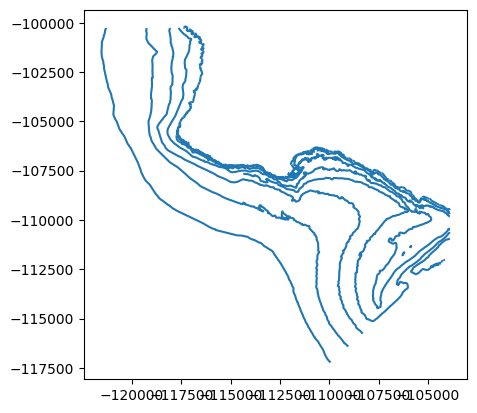

In [ ]:
geodata.plot()

# Show the plot
plt.show()

#####Dataset "areas"

In [ ]:
areas.shape

(1, 2)

In [ ]:
areas

Id                                           geometry
0   0  POLYGON ((-107232.293 -107725.880, -107229.332...

In [ ]:
areas.dtypes

Id             int64
geometry    geometry
dtype: object

In [ ]:
areas[areas.duplicated(keep = False)]

# no duplicate rows

Empty GeoDataFrame
Columns: [Id, geometry]
Index: []

In [ ]:
areas.isna().sum()

# no missing values

Id          0
geometry    0
dtype: int64

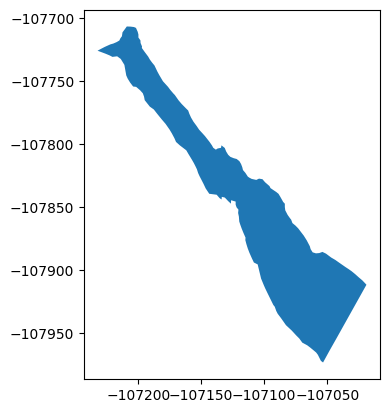

In [ ]:
areas.plot()

# Show the plot
plt.show()

#####Dataset "meteo"

In [ ]:
meteo.shape

(3327, 11)

In [ ]:
meteo.head(10)

# as we can see, the first few rows have information about the column and the actual weather information begins in row 9

location                                        Basel  \
0                  lat                                        47.75   
1                  lon                                          7.5   
2                  asl                                    363.65314   
3             variable                                  Temperature   
4                 unit                                           °C   
5                level                      2 m elevation corrected   
6           resolution                                        daily   
7          aggregation                                      Maximum   
8            timestamp  Basel Temperature [2 m elevation corrected]   
9  2011-11-01 00:00:00                                    14.930245   

                                       Basel.1  \
0                                        47.75   
1                                          7.5   
2                                    363.65314   
3                                  Temperature   
4                                           °C   
5                      2 m elevation corrected   
6                                        daily   
7                                      Minimum   
8  Basel Temperature [2 m elevation corrected]   
9                                     7.190245   

                                       Basel.2                    Basel.3  \
0                                        47.75                      47.75   
1                                          7.5                        7.5   
2                                    363.65314                  363.65314   
3                                  Temperature        Precipitation Total   
4                                           °C                         mm   
5                      2 m elevation corrected                        sfc   
6                                        daily                      daily   
7                                         Mean                  Summation   
8  Basel Temperature [2 m elevation corrected]  Basel Precipitation Total   
9                                    10.098162                        0.7   

                   Basel.4                                Basel.5  \
0                    47.75                                  47.75   
1                      7.5                                    7.5   
2                363.65314                              363.65314   
3        Cloud Cover Total                       Cloud Cover High   
4                        %                                      %   
5                      sfc                           high cld lay   
6                    daily                                  daily   
7                     Mean                                   Mean   
8  Basel Cloud Cover Total  Basel Cloud Cover High [high cld lay]   
9                48.495834                              32.041668   

                                  Basel.6  \
0                                   47.75   
1                                     7.5   
2                               363.65314   
3                      Cloud Cover Medium   
4                                       %   
5                             mid cld lay   
6                                   daily   
7                                    Mean   
8  Basel Cloud Cover Medium [mid cld lay]   
9                               18.708334   

                               Basel.7                   Basel.8  \
0                                47.75                     47.75   
1                                  7.5                       7.5   
2                            363.65314                 363.65314   
3                      Cloud Cover Low        Longwave Radiation   
4                                    %                      W/m²   
5                          low cld lay                       sfc   
6                                daily                     daily   
7                                

In [ ]:
meteo.dtypes

location    object
Basel       object
Basel.1     object
Basel.2     object
Basel.3     object
Basel.4     object
Basel.5     object
Basel.6     object
Basel.7     object
Basel.8     object
Basel.9     object
dtype: object

In [ ]:
# Descriptive statistics:
meteo.describe()

location        Basel      Basel.1      Basel.2  Basel.3  Basel.4  \
count      3327  3327.000000  3327.000000  3327.000000     3327     3327   
unique     3327  2100.000000  1802.000000  3288.000000      457     2681   
top         lat    23.580246     6.010245    15.839412        0        0   
freq          1     6.000000     7.000000     3.000000     1496       32   

        Basel.5  Basel.6  Basel.7  Basel.8  Basel.9  
count      3327     3327     3327     3327  3327.00  
unique     1663     1621     1544     2131  3299.00  
top           0        0        0     8479   559.21  
freq        240      192      220        7     2.00

In [ ]:
meteo[meteo.duplicated(keep = False)]

# no duplicated values

Empty DataFrame
Columns: [location, Basel, Basel.1, Basel.2, Basel.3, Basel.4, Basel.5, Basel.6, Basel.7, Basel.8, Basel.9]
Index: []

In [ ]:
meteo.isna().sum()

# no missing values

location    0
Basel       0
Basel.1     0
Basel.2     0
Basel.3     0
Basel.4     0
Basel.5     0
Basel.6     0
Basel.7     0
Basel.8     0
Basel.9     0
dtype: int64

#####Dataset "ocean"

In [ ]:
ocean.shape

(109, 5)

In [ ]:
ocean.head(10)

Year  Month  Avg fCO2    Avg SST  Avg Salinity
0  2011     11  361.7050  17.865100     36.279600
1  2011     12  361.7050  17.865100     36.279600
2  2012      1  345.7975  15.292425     35.818625
3  2012      2  345.7975  15.292425     35.818625
4  2012      3  345.7975  15.292425     35.818625
5  2012      4  345.7975  15.292425     35.818625
6  2012      5  345.7975  15.292425     35.818625
7  2012      6  345.7975  15.292425     35.818625
8  2012      7  345.7975  15.292425     35.818625
9  2012      8  345.7975  15.292425     35.818625

In [ ]:
ocean.dtypes

Year              int64
Month             int64
Avg fCO2        float64
Avg SST         float64
Avg Salinity    float64
dtype: object

In [ ]:
# Descriptive statistics:
ocean.describe()

Year       Month    Avg fCO2     Avg SST  Avg Salinity
count   109.000000  109.000000  109.000000  109.000000    109.000000
mean   2015.871560    6.541284  374.907898   17.691995     35.892058
std       2.639097    3.478857   16.772063    1.805048      0.095762
min    2011.000000    1.000000  345.797500   15.230200     35.720325
25%    2014.000000    4.000000  365.504857   15.292425     35.842200
50%    2016.000000    7.000000  376.466429   18.408400     35.891970
75%    2018.000000   10.000000  388.434600   19.030771     35.945160
max    2020.000000   12.000000  402.035000   19.994033     36.279600

In [ ]:
ocean[ocean.duplicated(keep = False)]

# no duplicated values

Empty DataFrame
Columns: [Year, Month, Avg fCO2, Avg SST, Avg Salinity]
Index: []

In [ ]:
ocean.isna().sum()

# no missing values

Year            0
Month           0
Avg fCO2        0
Avg SST         0
Avg Salinity    0
dtype: int64

#####Dataset "extra"

In [ ]:
extra.shape

(109, 6)

In [ ]:
extra.head(10)

# as we can see, the first few rows have information about the column and the actual weather information begins in row 9

Year  Month  Index Coastal Eutrophication  Air Pollutant Compliance  \
0  2011     11                           0.1                      0.95   
1  2011     12                           0.6                      0.95   
2  2012      1                           0.4                      0.87   
3  2012      2                           0.2                      0.87   
4  2012      3                           6.1                      0.87   
5  2012      4                           1.3                      0.87   
6  2012      5                           0.1                      0.87   
7  2012      6                           0.1                      0.87   
8  2012      7                           0.0                      0.87   
9  2012      8                           0.1                      0.87   

   Pollutants in Water  Waste in Water  
0         3.997700e+08    2.683034e+06  
1         3.997700e+08    2.683034e+06  
2         3.736819e+08    3.227377e+06  
3         3.736819e+08    3.227377e+06  
4         3.736819e+08    3.227377e+06  
5         3.736819e+08    3.227377e+06  
6         3.736819e+08    3.227377e+06  
7         3.736819e+08    3.227377e+06  
8         3.736819e+08    3.227377e+06  
9         3.736819e+08    3.227377e+06

In [ ]:
extra.dtypes

Year                              int64
Month                             int64
Index Coastal Eutrophication    float64
Air Pollutant Compliance        float64
Pollutants in Water             float64
Waste in Water                  float64
dtype: object

In [ ]:
# Descriptive statistics:
extra.describe()

Year       Month  Index Coastal Eutrophication  \
count   109.000000  109.000000                    109.000000   
mean   2015.871560    6.541284                      1.600000   
std       2.639097    3.478857                      3.146544   
min    2011.000000    1.000000                      0.000000   
25%    2014.000000    4.000000                      0.100000   
50%    2016.000000    7.000000                      0.500000   
75%    2018.000000   10.000000                      1.300000   
max    2020.000000   12.000000                     18.300000   

       Air Pollutant Compliance  Pollutants in Water  Waste in Water  
count                109.000000         1.090000e+02    1.090000e+02  
mean                   0.659450         2.504890e+08    5.854123e+06  
std                    0.302027         7.587745e+07    6.076706e+06  
min                    0.120000         1.759763e+08    2.543810e+06  
25%                    0.400000         1.919272e+08    2.896287e+06  
50%                    0.780000         2.185905e+08    3.216790e+06  
75%                    0.870000         2.496709e+08    6.642609e+06  
max                    0.970000         3.997700e+08    2.318965e+07

In [ ]:
extra[extra.duplicated(keep = False)]

# no duplicated values

Empty DataFrame
Columns: [Year, Month, Index Coastal Eutrophication, Air Pollutant Compliance, Pollutants in Water, Waste in Water]
Index: []

In [ ]:
extra.isna().sum()

# no missing values

Year                            0
Month                           0
Index Coastal Eutrophication    0
Air Pollutant Compliance        0
Pollutants in Water             0
Waste in Water                  0
dtype: int64

###1. Pre Processing

**Preprocessing** plays a crucial role not just in preparing datasets to suit our specific needs, but also in addressing any inconsistencies that may be present, such as missing values or outliers

####1.1 Dataset "data_mobil"

In [ ]:
# before starting the preprocessing, we will create a copy of the dataset so that we can make some changes
data_mobil = data_m.copy()

##### Duplicates

In [ ]:
data_mobil.duplicated().sum()

232

In [ ]:
# removing the duplicated rows
data_mobil = data_mobil.drop_duplicates(keep='first')

##### Incoherences

**Incoherence 1**: There is a row in the column "Zone" with tha value " B" instead of "B"

In [ ]:
counts = data_mobil['Zone'].value_counts()
counts

A     581
E     472
D     405
B     354
F      66
 B      1
Name: Zone, dtype: int64

In [ ]:
data_mobil['Zone'] = data_mobil['Zone'].replace(" B", "B")
print(data_mobil['Zone'].value_counts())

A    581
E    472
D    405
B    355
F     66
Name: Zone, dtype: int64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Incoherence 2**: There are some rows with the values misspelled



In [ ]:
counts = data_mobil['Supratidal/Middle Intertidal'].value_counts()
counts

Medium     1203
Supra       671
Supra         2
supra         1
Super         1
Medium        1
Name: Supratidal/Middle Intertidal, dtype: int64

In [ ]:
data_mobil['Supratidal/Middle Intertidal'] = data_mobil['Supratidal/Middle Intertidal'].str.strip()
data_mobil['Supratidal/Middle Intertidal'] = data_mobil['Supratidal/Middle Intertidal'].replace("supra", "Supra")
data_mobil['Supratidal/Middle Intertidal'] = data_mobil['Supratidal/Middle Intertidal'].replace("Super", "Supra")
print(data_mobil['Supratidal/Middle Intertidal'].value_counts())

Medium    1204
Supra      675
Name: Supratidal/Middle Intertidal, dtype: int64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Incoherence 3**: Some rows have the value 0 and some rows have " Rock" instead of "Rock"

In [ ]:
counts = data_mobil['Substrate'].value_counts()
counts

Puddle/Rock                692
Rock                       374
Rock/Sand                  187
Puddle/Rock/Sand           168
Rock/Canal                  88
Rock/Sea                    54
Rock/Pebble                 36
Rock/Sand/Canal             34
Rock/Sand/Sea               29
Pebble                      27
Canal                       18
Puddle/Rock/Canal           18
Puddle                      18
Rock/Sand/Pebble            15
Rock/Sand                   14
Sand                        12
Sand/Pebble                 11
Puddle/Rock/Pebble          10
Puddle/Rock/Sea              9
Sea                          7
Sand                         7
Puddle/Rock/Sand/Canal       5
0                            5
Puddle/Sand                  5
Rock/ Canal                  4
Sand/Canal                   3
Puddle/Rock/Sand/Sea         3
Rock/Sand/Puddle             3
Sand/Sea                     3
High Tide                    3
 Rock                        3
Puddle/Rock/Sand/Pebble      2
Rock/Pud

In [ ]:
data_mobil['Substrate'] = data_mobil['Substrate'].replace(" Rock", "Rock")
data_mobil = data_mobil.loc[data_mobil['Substrate'] != 0]
print(data_mobil['Substrate'].value_counts())

Puddle/Rock                692
Rock                       377
Rock/Sand                  187
Puddle/Rock/Sand           168
Rock/Canal                  88
Rock/Sea                    54
Rock/Pebble                 36
Rock/Sand/Canal             34
Rock/Sand/Sea               29
Pebble                      27
Puddle/Rock/Canal           18
Puddle                      18
Canal                       18
Rock/Sand/Pebble            15
Rock/Sand                   14
Sand                        12
Sand/Pebble                 11
Puddle/Rock/Pebble          10
Puddle/Rock/Sea              9
Sea                          7
Sand                         7
Puddle/Sand                  5
Puddle/Rock/Sand/Canal       5
Rock/ Canal                  4
Rock/Sand/Puddle             3
Sand/Sea                     3
High Tide                    3
Sand/Canal                   3
Puddle/Rock/Sand/Sea         3
Puddle/Rock/Sand/Pebble      2
Rock/Puddle                  2
Pebble/Sand                  1
Puddle/S

**Incoherence 4**: Some rows have a total percentage bigger than 100

In [ ]:
selected_rows = data_mobil.loc[(data_mobil['TOTAL'] > 100) | (data_mobil['TOTAL'] < 0)]
counts = selected_rows['TOTAL'].value_counts()
counts

107.0    1
254.0    1
200.0    1
116.0    1
201.0    1
407.0    1
Name: TOTAL, dtype: int64

In [ ]:
data_mobil.loc[data_mobil['TOTAL']>100,'TOTAL']=100 

selected_rows = data_mobil.loc[(data_mobil['TOTAL'] > 100) | (data_mobil['TOTAL'] < 0)]
print(selected_rows['TOTAL'].value_counts())

Series([], Name: TOTAL, dtype: int64)


**Incoherence 5**: Some rows had values non numeric like " " and "-"

In [ ]:
data_mobil = data_mobil.loc[data_mobil['Water temperature (ºC)'] != ' ']
data_mobil = data_mobil.loc[data_mobil['Water temperature (ºC)'] != '-']
data_mobil['Water temperature (ºC)'] = data_mobil['Water temperature (ºC)'].astype(float)

# also we decided to rename the column to Water Temp so it's easier to read
data_mobil = data_mobil.rename(columns={'Water temperature (ºC)': 'Water Temp'})

**Incoherence 6**: In the variables 'Tide', there are some rows with ";" or "," and also some value are huge

In [ ]:
# replace semicolon and comma with period
data_mobil['Tide'] = data_mobil['Tide'].apply(lambda x: re.sub(r';', r'.', str(x)))
data_mobil['Tide'] = data_mobil['Tide'].apply(lambda x: re.sub(r',', r'.', str(x)))

# convert to float
data_mobil['Tide'] = data_mobil['Tide'].astype(float)

selected_rows = data_mobil.loc[(data_mobil['Tide'] > 5)]
print(selected_rows['Tide'].value_counts())

87.00     1
173.13    1
259.26    1
345.39    1
431.52    1
517.65    1
603.78    1
689.91    1
776.04    1
862.17    1
Name: Tide, dtype: int64


In [ ]:
data_mobil.loc[data_mobil['Tide']>5,'Tide'] = data_mobil['Tide'].mean()

selected_rows = data_mobil.loc[(data_mobil['Tide'] > 5)]
print(selected_rows['Tide'].value_counts())

Series([], Name: Tide, dtype: int64)


**Incoherence 7**: We detected a date that had 2001 as the year

In [ ]:
# converting 'Date' into a datetime type
data_mobil['Date'] = pd.to_datetime(data_mobil['Date'])

# and checking all the rows before november 2011, that is when the records begin
data_mobil.loc[(data_mobil['Date'] < '2011-11-01')]

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


Date      Hour  Tide Weather Condition  Water Temp  \
1964 2001-04-23 20:20:00  09:30:00   0.7            Cloudy        16.0   

     Sampler Zone Supratidal/Middle Intertidal Substrate Caboz N.I.  ...  \
1964   AF SF    F                       Medium      Rock          0  ...   

     Doriopsilla areolata (nudibrânquio) Scorpaena sp. (Rascasso)  \
1964                                 0.0                      0.0   

     Lipophrys pholis (ad.)  Diplodus cervinus  Gobiusculus flavescens  TOTAL  \
1964                    0.0                0.0                     0.0    1.0   

      Abundance (ind/m2)  Column1  Column2  Column3  
1964                0.05      NaN      NaN      NaN  

[1 rows x 71 columns]

In [ ]:
data_mobil.loc[1962:1966]
# looking at the rows surrounding the incoherence, we can see that the year is 2020, so we will replace 2001 with 2020
# the hour is also incorrect, it says 20:20 (the year) instead of 00:00 like the others

Date      Hour  Tide Weather Condition  Water Temp  \
1962 2020-04-23 00:00:00  09:00:00   0.7            Cloudy        16.0   
1963 2020-04-23 00:00:00  10:00:00   0.7            Cloudy        16.0   
1964 2001-04-23 20:20:00  09:30:00   0.7            Cloudy        16.0   
1965 2020-01-23 00:00:00  09:30:00   0.7            Cloudy        16.0   
1966 2020-01-23 00:00:00  09:30:00   0.7            Cloudy        16.0   

     Sampler Zone Supratidal/Middle Intertidal         Substrate Caboz N.I.  \
1962   AF AR    B                       Medium        Rock/Canal          0   
1963   AF AR    B                        Supra              Rock          0   
1964   AF SF    F                       Medium              Rock          0   
1965   AF SF    F                       Medium              Rock          0   
1966   AF SF    F                       Medium  Puddle/Rock/Sand          0   

      ... Doriopsilla areolata (nudibrânquio) Scorpaena sp. (Rascasso)  \
1962  ...                                 0.0                      0.0   
1963  ...                                 0.0                      0.0   
1964  ...                                 0.0                      0.0   
1965  ...                                 0.0                      0.0   
1966  ...                                 0.0                      0.0   

     Lipophrys pholis (ad.)  Diplodus cervinus  Gobiusculus flavescens  TOTAL  \
1962                    0.0                0.0                     0.0    5.0   
1963                    0.0                0.0                     0.0    0.0   
1964                    0.0                0.0                     0.0    1.0   
1965                    0.0                0.0                     0.0    0.0   
1966                    0.0                0.0                     0.0    0.0   

      Abundance (ind/m2)  Column1  Column2  Column3  
1962                0.25      NaN      NaN      NaN  
1963                0.00      NaN      NaN      NaN  
1964                0.05      NaN      NaN      NaN  
1965                0.00      NaN      NaN      NaN  
1966                0.00      NaN      NaN      NaN  

[5 rows x 71 columns]

In [ ]:
data_mobil['Date'] = data_mobil['Date'].replace('2001-04-23 20:20:00', '2020-04-23 00:00:00')

**Incoherence 8**: Some rows had spaces (' ') instead of a value

In [ ]:
# to know how many column have blank spaces
datasettemp = data_mobil.copy()
num_rows_with_black_space = (datasettemp.astype(str) == ' ').any(axis=1).sum()

print(f"{num_rows_with_black_space} rows have at least one column containing only a black space.")

17 rows have at least one column containing only a black space.


In [ ]:
# and now which columns
num_black_spaces_per_column = (data_mobil == ' ').sum()
columns_with_black_spaces = num_black_spaces_per_column[num_black_spaces_per_column > 0].index.tolist()

print(f"The following columns have at least one black space:\n{columns_with_black_spaces}")

The following columns have at least one black space:
['Weather Condition', 'Caboz N.I.', 'Palaemon serratus', 'Nasariidae (búzio)', 'Diogenes pugilator', 'Eriphia verrucosa']


In [ ]:
# treating these incoherences
# For Weather Condition we will replace the blank space with unk for unknown, it's not too relevant since we will replace this column later
data_mobil['Weather Condition'] = data_mobil['Weather Condition'].replace(' ','unk')

# For species will replace the blank spaces with 0, since there is no evidence of presence of the species
data_mobil['Caboz N.I.'] = data_mobil['Caboz N.I.'].replace(' ','0')
data_mobil['Palaemon serratus'] = data_mobil['Palaemon serratus'].replace(' ','0')
data_mobil['Nasariidae (búzio)'] = data_mobil['Nasariidae (búzio)'].replace(' ','0')
data_mobil['Diogenes pugilator'] = data_mobil['Diogenes pugilator'].replace(' ','0')
data_mobil['Eriphia verrucosa'] = data_mobil['Eriphia verrucosa'].replace(' ','0')

#####Missing Values

In [ ]:
# missing values detection

#pd.set_option('display.max_columns', None)
#data_mobil.isna().sum()

#data_mobil.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

# checking the rows with more than 0 missing values, since the dataset has so many columns, it is easier to visualise this way
missing_values = data_mobil.isna().sum()

# Select only the columns with missing values
missing_cols = missing_values[missing_values > 0]

# Print the names of columns with missing values and the count of missing values
print("Columns with missing values:")
for col_name, num_missing in missing_cols.items():
    print(f"{col_name}: {num_missing}")

Columns with missing values:
Date: 3
Hour: 3
Tide: 6
Weather Condition: 2
Water Temp: 3
Sampler: 3
Zone: 3
Supratidal/Middle Intertidal: 3
Substrate: 3
Caboz N.I.: 2
Palaemon serratus: 2
Nasariidae (búzio): 2
Diogenes pugilator: 2
Marthasterias glacialis: 2
Asterina gibbosa: 2
Eulalia viridis (poliqueta): 2
Sabellaria alveolata: 2
Octopus vulgaris: 2
Sepia officinallis: 2
Alloteuthis subulata: 2
Loligo vulgaris: 2
Parablennius gattorugine: 2
Diplodus sp.: 2
Diplodus sargus: 2
Maja sp.: 2
Eriphia verrucosa: 2
Polybius henslowii: 2
Necora puber: 2
Aplysia punctata: 2
Podarcis carbonelli: 2
Acanthochitona fascicularis: 2
Sphaeroma sp. (bicho de conta): 2
Chromodoris purpurea (nudibrânquio): 2
Lipophrys pholis (juvenil/recruta): 2
Pomatoschistus pictus (caboz-de-areia): 2
Peixe juvenil N.I.: 2
Juvenis de lagosta/lavagante: 2
caranguejo N.I.: 2
Xantho sp.: 2
Carcinus maenas: 2
Atherina presbyter: 2
Diplodus vulgaris: 2
Syngnathus (Marinha): 2
Lepadogaster lepadogaster: 2
Poliqueta n.i.: 2
N

In [ ]:
# here we drop Column 1 and 2 since they have two many missing values and dont hold any info

data_mobil.drop(['Column1', 'Column2', 'Column3'], axis=1, inplace=True)

In [ ]:
# then we drop the rows with missing values in Date, Tide and TOTAL, 
# these rows probably are the rows where the other missing values are as well

data_mobil.dropna(subset=['Date'], inplace=True)
data_mobil.dropna(subset=['Tide'], inplace=True)
data_mobil.dropna(subset=['TOTAL'], inplace=True)

In [ ]:
# finally 

data_mobil.isna().sum()

Date                      0
Hour                      0
Tide                      0
Weather Condition         0
Water Temp                0
                         ..
Lipophrys pholis (ad.)    0
Diplodus cervinus         0
Gobiusculus flavescens    0
TOTAL                     0
Abundance (ind/m2)        0
Length: 68, dtype: int64

#####Outliers

In [ ]:
data_mobil_nocat= list(data_mobil[['Tide', 'TOTAL', 'Water Temp', 'Abundance (ind/m2)']])

In [ ]:
for col in data_mobil_nocat:
  
    upper_limit = round(data_mobil[col].mean() + 3*data_mobil[col].std(),2)
    lower_limit = round(data_mobil[col].mean() - 3*data_mobil[col].std(),2)

    print('Affected rows in '+col+': '+str( (data_mobil[col] > upper_limit).sum() + (data_mobil[col] < lower_limit).sum()))

    data_mobil[col] = np.where(data_mobil[col] > upper_limit, upper_limit,
         np.where(data_mobil[col] < lower_limit,lower_limit,data_mobil[col]))

Affected rows in Tide: 10
Affected rows in TOTAL: 46
Affected rows in Water Temp: 8
Affected rows in Abundance (ind/m2): 31


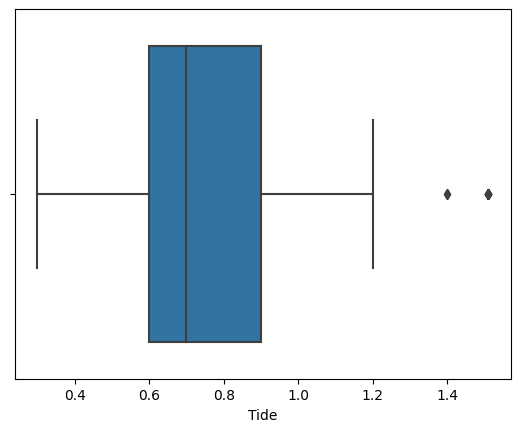

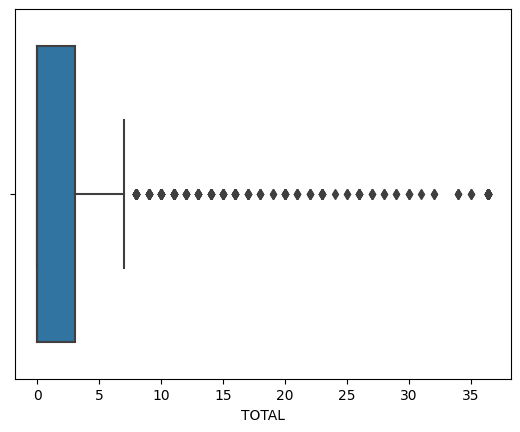

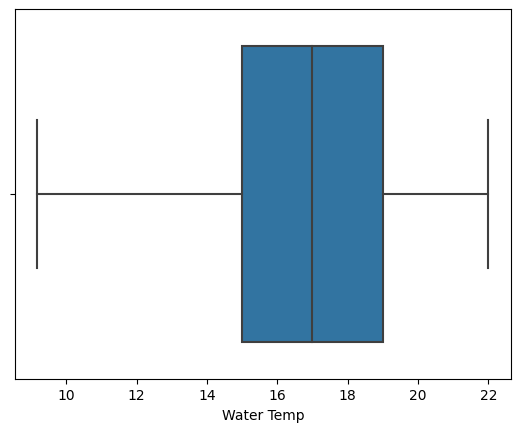

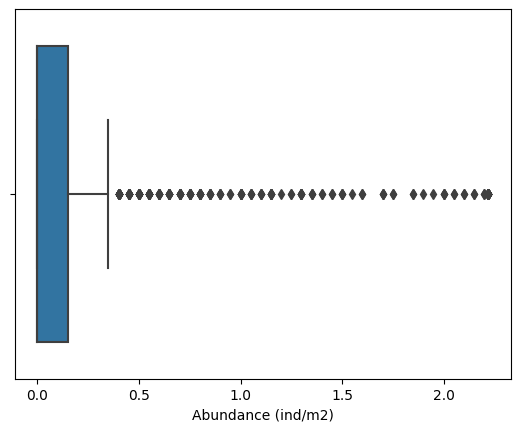

In [ ]:
for col in data_mobil_nocat:
    fig= sns.boxplot(x=col, data = data_mobil)
    plt.show()

#####Encoding and Binning Variables

In [ ]:
# we noticed that in the variable "Substrate", all of the values corresponded to a combination of these values "puddle, rock, sand, canal, sea, pebble, high tide"
# so we decided to add these columns as dummies in order for the components of the substrate to be easier to understand

# make a copy of the dataset data_mobil
df_mobil = data_mobil.copy()

# convert the values in the "Substrate" column to strings
df_mobil['Substrate'] = df_mobil['Substrate'].astype(str)

# the values in "Substrate" correspond both to the content of the sample and also the location it was taken, so we are separating them in two different dictionaries

# create a list of the unique substrates "samples" and location "locations"
samples = ['Pebble', 'Rock', 'Sand']
locations = ['Puddle', 'Canal', 'Sea'] # we removed the High Tide from the locations because it only had 2 values

# create dictionaries to store the new columns
newcolumns_samples = {}
newcolumns_locations = {}

for sample in samples:
    newcolumns_samples[sample] = []

for location in locations:
    newcolumns_locations[location] = []

# loop over the substrates and add a 1 or 0 to the corresponding column
for value in df_mobil['Substrate']:
    for sample in samples:
        if sample in value:
            newcolumns_samples[sample].append(1)
        else:
            newcolumns_samples[sample].append(0)
    
    for location in locations:
        if location in value:
            newcolumns_locations[location].append(1)
        else:
            newcolumns_locations[location].append(0)

# create new DataFrames with the new columns
newdata_samples = pd.DataFrame(newcolumns_samples)
newdata_locations = pd.DataFrame(newcolumns_locations)

# reset the index of the original DataFrame
df_mobil = df_mobil.reset_index(drop=True)

# concatenate the new DataFrames with the original DataFrame
df_mobil = pd.concat([df_mobil, newdata_samples, newdata_locations], axis=1)

# drop the original "Substrate" column
df_mobil = df_mobil.drop('Substrate', axis=1)

df_mobil.head()

Date      Hour  Tide Weather Condition  Water Temp Sampler Zone  \
0 2011-11-28  12:20:00   0.6         Clear sky        16.0   AF SF    D   
1 2011-11-28  12:35:00   0.6         Clear sky        16.0   AF SF    D   
2 2011-11-28  10:10:00   0.6         Clear sky        16.0   AF SF    D   
3 2011-11-28  10:25:00   0.6         Clear sky        16.0   AF SF    D   
4 2011-11-28  10:40:00   0.6         Clear sky        16.0   AF SF    D   

  Supratidal/Middle Intertidal Caboz N.I. Palaemon serratus  ...  \
0                        Supra          0                 0  ...   
1                        Supra          0                 0  ...   
2                       Medium          0                 0  ...   
3                       Medium          0                 1  ...   
4                       Medium          0                 0  ...   

  Diplodus cervinus Gobiusculus flavescens  TOTAL  Abundance (ind/m2)  Pebble  \
0               0.0                    0.0    1.0                0.05       0   
1               0.0                    0.0    0.0                0.00       1   
2               0.0                    0.0    4.0                0.20       0   
3               0.0                    0.0    2.0                0.10       0   
4               0.0                    0.0    1.0                0.05       0   

   Rock  Sand  Puddle  Canal  Sea  
0     1     0       1      0    0  
1     0     1       0      0    0  
2     1     0       1      0    0  
3     1     0       1      0    0  
4     1     0       1      0    0  

[5 rows x 73 columns]

In [ ]:
print(df_mobil.duplicated().sum())
df_mobil = df_mobil.drop_duplicates()

8


In [ ]:
# then we decided to convert the values in 'Supratidal/Middle Intertidal' to dummy variables,
# we will only keep one column 'Tide_Supra', where 1 representes supratidal and 0 middle intertidal

dummies = pd.get_dummies(df_mobil['Supratidal/Middle Intertidal'], prefix='Tide', drop_first=True)

# joining the dataset sessil with dataset dummies
df_mobil = pd.concat([df_mobil, dummies], axis=1)

# dropping the original column
df_mobil.drop('Supratidal/Middle Intertidal', axis=1, inplace=True)

# and renaming the remaining column
df_mobil.rename(columns={'Tide_Supra': 'Tide Supra'}, inplace=True)

In [ ]:
df_mobil.head()

Date      Hour  Tide Weather Condition  Water Temp Sampler Zone  \
0 2011-11-28  12:20:00   0.6         Clear sky        16.0   AF SF    D   
1 2011-11-28  12:35:00   0.6         Clear sky        16.0   AF SF    D   
2 2011-11-28  10:10:00   0.6         Clear sky        16.0   AF SF    D   
3 2011-11-28  10:25:00   0.6         Clear sky        16.0   AF SF    D   
4 2011-11-28  10:40:00   0.6         Clear sky        16.0   AF SF    D   

  Caboz N.I. Palaemon serratus Nasariidae (búzio)  ... Gobiusculus flavescens  \
0          0                 0                  0  ...                    0.0   
1          0                 0                  0  ...                    0.0   
2          0                 0                  0  ...                    0.0   
3          0                 1                  0  ...                    0.0   
4          0                 0                  0  ...                    0.0   

   TOTAL  Abundance (ind/m2)  Pebble  Rock  Sand  Puddle  Canal  Sea  \
0    1.0                0.05       0     1     0       1      0    0   
1    0.0                0.00       1     0     1       0      0    0   
2    4.0                0.20       0     1     0       1      0    0   
3    2.0                0.10       0     1     0       1      0    0   
4    1.0                0.05       0     1     0       1      0    0   

   Tide Supra  
0           1  
1           1  
2           0  
3           0  
4           0  

[5 rows x 73 columns]

#####Changing DataTypes

In [ ]:
df_mobil.dtypes

Date                 datetime64[ns]
Hour                         object
Tide                        float64
Weather Condition            object
Water Temp                  float64
                          ...      
Sand                          int64
Puddle                        int64
Canal                         int64
Sea                           int64
Tide Supra                    uint8
Length: 73, dtype: object

In [ ]:
df_mobil.columns

Index(['Date', 'Hour', 'Tide', 'Weather Condition', 'Water Temp', 'Sampler',
       'Zone', 'Caboz N.I.', 'Palaemon serratus', 'Nasariidae (búzio)',
       'Diogenes pugilator', 'Marthasterias glacialis', 'Asterina gibbosa',
       'Eulalia viridis (poliqueta)', 'Sabellaria alveolata',
       'Octopus vulgaris', 'Sepia officinallis', 'Alloteuthis subulata',
       'Loligo vulgaris', 'Parablennius gattorugine', 'Diplodus sp.',
       'Diplodus sargus', 'Maja sp.', 'Eriphia verrucosa',
       'Polybius henslowii', 'Necora puber', 'Aplysia punctata',
       'Podarcis carbonelli', 'Acanthochitona fascicularis',
       'Sphaeroma sp. (bicho de conta)', 'Chromodoris purpurea (nudibrânquio)',
       'Lipophrys pholis (juvenil/recruta)',
       'Pomatoschistus pictus (caboz-de-areia)', 'Peixe juvenil N.I.',
       'Juvenis de lagosta/lavagante', 'caranguejo N.I.', 'Xantho sp.',
       'Carcinus maenas', 'Atherina presbyter', 'Diplodus vulgaris',
       'Syngnathus (Marinha)', 'Lepadogaster lep

In [ ]:
# variables like all of the species and the total must be int, as it is not possible to have 0.3 fish of a certain species
# for the TOTAL its an easy conversion
df_mobil['TOTAL'] = df_mobil['TOTAL'].astype(int)

# now for the remaining species we will 
# create a list of variables you want to exclude from the type conversion
variables_to_exclude = ['Date', 'Hour', 'Tide', 'Weather Condition', 'Water Temp', 'Sampler',
                        'Zone', 'TOTAL', 'Abundance (ind/m2)','Pebble', 'Rock', 'Sand', 'Puddle', 
                        'Canal', 'Sea', 'Tide Supra']

# select variables to convert by excluding the ones in 'variables_to_exclude'
variables_to_convert = list(set(df_mobil.columns) - set(variables_to_exclude))

# change the data type of selected variables to int type
df_mobil[variables_to_convert] = df_mobil[variables_to_convert].astype(int)

#####Finalizing

**Incoherence 9**: We noticed that there were some totals that were weird, so we decided to recalculate the TOTAL to confirm if it was correct

(this incoherence is in the end of the pre-processing since the row needed to be fully treated in order to correct this error)

In [ ]:
# creating a new df that has all the species and the total
mobil_total = df_mobil[['Caboz N.I.',
       'Palaemon serratus', 'Nasariidae (búzio)', 'Diogenes pugilator',
       'Marthasterias glacialis', 'Asterina gibbosa',
       'Eulalia viridis (poliqueta)', 'Sabellaria alveolata',
       'Octopus vulgaris', 'Sepia officinallis', 'Alloteuthis subulata',
       'Loligo vulgaris', 'Parablennius gattorugine', 'Diplodus sp.',
       'Diplodus sargus', 'Maja sp.', 'Eriphia verrucosa',
       'Polybius henslowii', 'Necora puber', 'Aplysia punctata',
       'Podarcis carbonelli', 'Acanthochitona fascicularis',
       'Sphaeroma sp. (bicho de conta)', 'Chromodoris purpurea (nudibrânquio)',
       'Lipophrys pholis (juvenil/recruta)',
       'Pomatoschistus pictus (caboz-de-areia)', 'Peixe juvenil N.I.',
       'Juvenis de lagosta/lavagante', 'caranguejo N.I.', 'Xantho sp.',
       'Carcinus maenas', 'Atherina presbyter', 'Diplodus vulgaris',
       'Syngnathus (Marinha)', 'Lepadogaster lepadogaster', 'Poliqueta n.i.',
       'Nereis sp.', 'Ofiurídeo n.i.', 'Chiton sp. ',
       'Acanthochitona fascicularis (quíton com pêlos)',
       'Leptochiton cancellatus', 'Anémona n.i.',
       'Pagurus sp. (caranguejo eremita)',
       'Pachygrapsus marmoratus (caranguejo pequeno verde)',
       'Porcellana sp. (caranguejo pinças largas)', 'Palaemon sp.',
       'Gobius sp.', 'Parablennius sp. (marachomba)',
       'Parablennius pilicornis', 'Nudibranquio N.I.',
       'Callionymus lira (peixe-pau lira)', 'Oncidiella celtica',
       'Doriopsilla areolata (nudibrânquio)', 'Scorpaena sp. (Rascasso)',
       'Lipophrys pholis (ad.)', 'Diplodus cervinus', 'Gobiusculus flavescens', 'TOTAL']]

In [ ]:
# creating a list that just contains the species
df_mobil_species = ['Caboz N.I.',
       'Palaemon serratus', 'Nasariidae (búzio)', 'Diogenes pugilator',
       'Marthasterias glacialis', 'Asterina gibbosa',
       'Eulalia viridis (poliqueta)', 'Sabellaria alveolata',
       'Octopus vulgaris', 'Sepia officinallis', 'Alloteuthis subulata',
       'Loligo vulgaris', 'Parablennius gattorugine', 'Diplodus sp.',
       'Diplodus sargus', 'Maja sp.', 'Eriphia verrucosa',
       'Polybius henslowii', 'Necora puber', 'Aplysia punctata',
       'Podarcis carbonelli', 'Acanthochitona fascicularis',
       'Sphaeroma sp. (bicho de conta)', 'Chromodoris purpurea (nudibrânquio)',
       'Lipophrys pholis (juvenil/recruta)',
       'Pomatoschistus pictus (caboz-de-areia)', 'Peixe juvenil N.I.',
       'Juvenis de lagosta/lavagante', 'caranguejo N.I.', 'Xantho sp.',
       'Carcinus maenas', 'Atherina presbyter', 'Diplodus vulgaris',
       'Syngnathus (Marinha)', 'Lepadogaster lepadogaster', 'Poliqueta n.i.',
       'Nereis sp.', 'Ofiurídeo n.i.', 'Chiton sp. ',
       'Acanthochitona fascicularis (quíton com pêlos)',
       'Leptochiton cancellatus', 'Anémona n.i.',
       'Pagurus sp. (caranguejo eremita)',
       'Pachygrapsus marmoratus (caranguejo pequeno verde)',
       'Porcellana sp. (caranguejo pinças largas)', 'Palaemon sp.',
       'Gobius sp.', 'Parablennius sp. (marachomba)',
       'Parablennius pilicornis', 'Nudibranquio N.I.',
       'Callionymus lira (peixe-pau lira)', 'Oncidiella celtica',
       'Doriopsilla areolata (nudibrânquio)', 'Scorpaena sp. (Rascasso)',
       'Lipophrys pholis (ad.)', 'Diplodus cervinus', 'Gobiusculus flavescens']

In [ ]:
# change the datatype of the species columns to sum them afterwards
i = df_mobil_species

for element in i:
    if element in mobil_total.columns:
        mobil_total[element] = mobil_total[element].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# create new column SUM and initialize with zeros
mobil_total['SUM'] = 0

# sum the Number of species
for element in i:
    if element in mobil_total.columns:
        mobil_total['SUM'] = mobil_total['SUM'] + mobil_total[element]
        mobil_total = mobil_total.drop(columns=[element])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# here we can check that these rows had the same incorrect total, moving forward we will replace the column TOTAL with our new column 'SUM'
different = mobil_total[mobil_total['TOTAL'] != mobil_total['SUM']]
print(different)

      TOTAL  SUM
48       36   45
157      36   40
223      36   47
236      36   39
244      36  107
353      36   58
354      36   40
376      36   55
384      36  254
402      36   77
596      36   48
608      36   98
609      36   63
614      36   37
615      36  200
633      36   42
671      36   38
677      36   41
840      36   42
847      36   43
848      36   57
900      36   37
903      36   43
907      36   75
908      36   57
926      36   74
1070     36   47
1077     36   83
1078     36   44
1082     36   62
1100     36   49
1124     36   79
1130     36   84
1136     36   51
1146     36   72
1147     36   45
1163     36  116
1190     36   44
1191     36  201
1192     36   80
1193     36   50
1453     36   41
1673      0    7
1840     36   40
1846     36   68
1848     36   62
1849     36   71


In [ ]:
df_mobil['SUM'] = mobil_total['SUM']

In [ ]:
# dropping the original 'TOTAL2' column
df_mobil = df_mobil.drop('TOTAL', axis=1)

# and renaming the 'SUM' as 'TOTAL2'
df_mobil = df_mobil.rename(columns={'SUM': 'TOTAL'})

####1.2 Dataset 'data_sessil'





In [ ]:
# before starting the preprocessing, we will create a copy of the dataset so that we can make some changes
data_sessil = data_s.copy()

#####Duplicates

In [ ]:
# removing the duplicated rows
data_sessil = data_sessil.drop_duplicates(keep='first')

##### Incoherences

**Incoherence 1**: There are some rows with the values misspelled



In [ ]:
counts = data_sessil['Supratidal/Middle Intertidal'].value_counts()
counts

Medium     1268
Supra       714
Supra         2
Super         1
Medium        1
Name: Supratidal/Middle Intertidal, dtype: int64

In [ ]:
data_sessil['Supratidal/Middle Intertidal'] = data_sessil['Supratidal/Middle Intertidal'].str.strip()
data_sessil['Supratidal/Middle Intertidal'] = data_sessil['Supratidal/Middle Intertidal'].replace("supra", "Supra")
data_sessil['Supratidal/Middle Intertidal'] = data_sessil['Supratidal/Middle Intertidal'].replace("Super", "Supra")
data_sessil['Supratidal/Middle Intertidal'] = data_sessil['Supratidal/Middle Intertidal'].replace("Medium", "Medium")
print(data_sessil['Supratidal/Middle Intertidal'].value_counts())

Medium    1269
Supra      717
Name: Supratidal/Middle Intertidal, dtype: int64


**Incoherence 2**: Some rows have the value 0 and some rows have " Rock" instead of "Rock"

In [ ]:
counts = data_sessil['Substrate'].value_counts()
counts

Rock                       851
Rock/Sand                  519
Puddle/Rock                275
Puddle/Rock/Sand           101
Sand                        77
Pebble                      48
Puddle                      26
Rock/Sand/Sea               17
Rock/Sea                    11
Sand/Pebble                 11
Rock/Pebble                  8
Puddle/Sand                  7
Rock/Sand/Pebble             5
Rock/Sand/Canal              4
Rock/Canal                   4
Sand/Sea                     4
 Rock                        2
High Tide                    2
Puddle/Pebble                1
Sea                          1
Canal                        1
Puddle/Rock/Sand/Pebble      1
Sand/ Pebble/Canal           1
Rock/Sand/Canal/Sea          1
Sand/Canal                   1
Name: Substrate, dtype: int64

In [ ]:
data_sessil['Substrate'] = data_sessil['Substrate'].replace(" Rock", "Rock")
data_sessil = data_sessil.loc[data_sessil['Substrate'] != 0]
print(data_sessil['Substrate'].value_counts())

Rock                       853
Rock/Sand                  519
Puddle/Rock                275
Puddle/Rock/Sand           101
Sand                        77
Pebble                      48
Puddle                      26
Rock/Sand/Sea               17
Rock/Sea                    11
Sand/Pebble                 11
Rock/Pebble                  8
Puddle/Sand                  7
Rock/Sand/Pebble             5
Rock/Sand/Canal              4
Rock/Canal                   4
Sand/Sea                     4
High Tide                    2
Sea                          1
Canal                        1
Puddle/Rock/Sand/Pebble      1
Sand/ Pebble/Canal           1
Rock/Sand/Canal/Sea          1
Sand/Canal                   1
Puddle/Pebble                1
Name: Substrate, dtype: int64


**Incoherence 3**: Some rows have a total percentage bigger than 100

In [ ]:
# in there column there was a mix of datetime and int values, so first of all we neede to correct that
data_sessil['TOTAL2'] = pd.to_numeric(data_sessil['TOTAL2'], errors='coerce').fillna(0).astype(int)

In [ ]:
# now to check the percentages above 100 and below 0
selected_rows = data_sessil.loc[(data_sessil['TOTAL2'] > 100) | (data_sessil['TOTAL2'] < 0)]
counts = selected_rows['TOTAL2'].value_counts()
counts

101    1
116    1
107    1
123    1
106    1
104    1
105    1
109    1
Name: TOTAL2, dtype: int64

In [ ]:
# correcting the values
data_sessil.loc[data_sessil['TOTAL2'] > 100, 'TOTAL2'] = 100

selected_rows = data_sessil.loc[(data_sessil['TOTAL2'] > 100) | (data_sessil['TOTAL2'] < 0)]
print(selected_rows['TOTAL2'].value_counts())

Series([], Name: TOTAL2, dtype: int64)


**Incoherence 4**: Some rows had values non numeric like " " and "-"

In [ ]:
data_sessil = data_sessil.loc[data_sessil['Water temperature (ºC)'] != ' ']
data_sessil = data_sessil.loc[data_sessil['Water temperature (ºC)'] != '-']
data_sessil['Water temperature (ºC)'] = data_sessil['Water temperature (ºC)'].astype(float)

# also we decided to rename the column to Water Temp so it's easier to read
data_sessil = data_sessil.rename(columns={'Water temperature (ºC)': 'Water Temp'})

**Incoherence 5**: There is only one row with this value, it doesn't have information, lets remove

In [ ]:
result = data_sessil[data_sessil["Chthamalus sp."] == "NÃO FOI REALIZADO DEVIDO À MARÉ"]
result.head()

Date      Hour  Tide Weather Condition  Water Temp Sampler Zone  \
1325 2016-04-20  09:30:00   0.9         Clear sky        15.0   AF SF    E   

     Supratidal/Middle Intertidal Substrate                   Chthamalus sp.  \
1325                       Medium       NaN  NÃO FOI REALIZADO DEVIDO À MARÉ   

      ... Alga castanha carnuda Alga castanha tufosa  \
1325  ...                   0.0                  0.0   

      Alga verde/azul - lavanda  Sphacelaria rigidula (pompons castanhos)  \
1325                        0.0                                       0.0   

      Cystoseira sp.  Laminaria sp.  TOTAL2  observações  Coluna1  Coluna2  
1325               0            0.0       0          NaN      NaN      NaN  

[1 rows x 105 columns]

In [ ]:
# since there is only one row that fills this condition, we will remove it since the "NÃO FOI REALIZADO DEVIDO À MARÉ" implies that there is no information
result = data_sessil[data_sessil["Chthamalus sp."] == "NÃO FOI REALIZADO DEVIDO À MARÉ"].index
data_sessil.drop(result, inplace=True)

**Incoherence 6**: Some rows had spaces (' ') instead of a value

In [ ]:
# to know how many column have blank spaces
dataset_temp = data_sessil.copy()
num_rows_with_black_space = (dataset_temp.astype(str) == ' ').any(axis=1).sum()

print(f"{num_rows_with_black_space} rows have at least one column containing only a black space.")

27 rows have at least one column containing only a black space.


In [ ]:
# and now which columns
num_black_spaces_per_column = (data_sessil == ' ').sum()
columns_with_black_spaces = num_black_spaces_per_column[num_black_spaces_per_column > 0].index.tolist()

print(f"The following columns have at least one black space:\n{columns_with_black_spaces}")

The following columns have at least one black space:
['Chthamalus sp.', 'Balanus perforatus', 'Patella sp.', 'Gymnangium montagui', 'Alga vermelha filamentosa', 'Cystoseira sp.', 'observações', 'Coluna1']


In [ ]:
# treating these incoherences
# Water Temperature, since ther is no way to know the temperature, we will delete the rows with blank spaces
data_sessil['Water Temp'] = data_sessil['Water Temp'][~(data_sessil['Water Temp'] == ' ')]

# For the species columns we will replace the blank space with 0, since there is no evidence of presence of the species
data_sessil['Chthamalus sp.'] = data_sessil['Chthamalus sp.'].replace(' ','0')
data_sessil['Balanus perforatus'] = data_sessil['Balanus perforatus'].replace(' ','0')
data_sessil['Patella sp.'] = data_sessil['Patella sp.'].replace(' ','0')
data_sessil['Gymnangium montagui'] = data_sessil['Gymnangium montagui'].replace(' ','0')
data_sessil['Alga vermelha filamentosa'] = data_sessil['Alga vermelha filamentosa'].replace(' ','0')
data_sessil['Cystoseira sp.'] = data_sessil['Cystoseira sp.'].replace(' ','0')

# For observações and coluna1, we will delete them in the missing values section since they dont contain any information

#####Missing values

In [ ]:
# missing values detection

# checking the rows with more than 0 missing values, since the dataset has so many columns, it is easier to visualise this way
missing_values = data_sessil.isna().sum()

# Select only the columns with missing values
missing_cols = missing_values[missing_values > 0]

# Print the names of columns with missing values and the count of missing values
print("Columns with missing values:")
for col_name, num_missing in missing_cols.items():
    print(f"{col_name}: {num_missing}")

Columns with missing values:
Date: 1
Hour: 1
Tide: 1
Weather Condition: 1
Water Temp: 9
Sampler: 1
Zone: 1
Supratidal/Middle Intertidal: 1
Substrate: 7
Chthamalus sp.: 2
Balanus perforatus: 2
Patella sp.: 1
Siphonaria algesirae: 1
Gibbula sp.: 1
Monodonta lineata: 1
Littorina neritoides: 1
Mytillus sp.: 1
Nassariidae (búzio): 1
Chiton sp.: 1
Pollicipes pollicipes: 1
Actinia equina : 1
Anemonia sulcata : 1
Ophiothrix sp.: 1
Paracentrotus lividus: 1
Hymeniacidon sanguinea: 1
Aglaophenia pluma (hidrozoário branco ramificado): 1
Alga branca ramificada: 1
Sabellaria alveolata  (tubos): 1
Cerianthidae: 1
Anémona N.I.: 1
Actinia fragacea: 1
Gymnangium montagui: 1
Anémona branca com estrias (fam. Cerianthidae): 1
Actinothoe sphyrodeta (anémona branca e laranja): 1
Oncidiella celtica (lesma): 1
Calliostoma sp. (burrié bicudo): 1
Polysyncraton sp. (ascídias vermelhas): 1
Didemnum sp. (ascídeas brancas): 1
Burrié negro N.I.: 1
Búzio/burrié n.i.: 1
Watersipora subtorquata (Ascídea): 1628
Verrucari

In [ ]:
# first of all, we start by dropping Watersipora subtorquata (Ascídea), observações, Coluna 1 and 2 since they have too many missing values

data_sessil.drop(['Watersipora subtorquata (Ascídea)', 'observações','Coluna1', 'Coluna2'], axis=1, inplace=True)

In [ ]:
# then we are checking if the missing 1 row in date, hour, tide... is the same
data_sessil[data_sessil["Date"].isna()]

# as suspected is just one row with all of these missing values, we will delete it
data_sessil.dropna(subset=['Date'], inplace=True)

In [ ]:
# now to check only the remaining rows with more than 0 missing values, since the dataset has so many columns, it is easier to visualise this way
missing_values = data_sessil.isna().sum()

# Select only the columns with missing values
missing_cols = missing_values[missing_values > 0]

# Print the names of columns with missing values and the count of missing values
print("Columns with missing values:")
for col_name, num_missing in missing_cols.items():
    print(f"{col_name}: {num_missing}")

Columns with missing values:
Water Temp: 8
Substrate: 6
Chthamalus sp.: 1
Balanus perforatus: 1


In [ ]:
# for the remaining missing values, Substrate is categorical so it doesnt make sense to fill the missing values, 
# since there are only 6 rows, we will remove them
data_sessil.dropna(subset=['Substrate'], inplace=True)

In [ ]:
# for Chthamalus sp. and Balanus perforatus we will fill the missing value with 0, since there is no value, we can assume the species is not detected
data_sessil['Chthamalus sp.'] = data_sessil['Chthamalus sp.'].fillna(0)
data_sessil['Balanus perforatus'] = data_sessil['Balanus perforatus'].fillna(0)

In [ ]:
# for water temperature, since it is a numerical variable, we will use KNN to fill the missing values
# first select the column to impute
column_to_impute = 'Water Temp'

# initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# fit and transform the data to impute missing values
data_sessil[[column_to_impute]] = imputer.fit_transform(data_sessil[[column_to_impute]])

print(f"Number of missing values in {column_to_impute} column after imputation: {data_sessil[column_to_impute].isna().sum()}")

Number of missing values in Water Temp column after imputation: 0


In [ ]:
# finally

data_sessil.isna().sum()

Date                                        0
Hour                                        0
Tide                                        0
Weather Condition                           0
Water Temp                                  0
                                           ..
Alga verde/azul - lavanda                   0
Sphacelaria rigidula (pompons castanhos)    0
Cystoseira sp.                              0
Laminaria sp.                               0
TOTAL2                                      0
Length: 101, dtype: int64

#####Outliers

In [ ]:
# Select only my columns that have numeric values to search for outliers
numeric_cols = data_sessil.select_dtypes(include=['int', 'float'])

# Identify and count outliers for each column (the upper and lower limits)
outlier_counts = {}
for col in numeric_cols.columns:
    # Calculate upper and lower limits
    upper_limit = round(numeric_cols[col].mean() + 3*numeric_cols[col].std(), 2)
    lower_limit = round(numeric_cols[col].mean() - 3*numeric_cols[col].std(), 2)

    # Identify outliers based on their value when compared to the top and lower limits
    outliers = numeric_cols[(numeric_cols[col] < lower_limit) | (numeric_cols[col] > upper_limit)]
    
    # Replace outliers with the respective limit
    numeric_cols[col] = numeric_cols[col].clip(lower=lower_limit, upper=upper_limit)
    
    # Count outliers
    outlier_counts[col] = len(outliers)

# Calculate total number of outliers
total_outliers = sum(outlier_counts.values())

# Print the total number of outliers detected
print(f"Total number of outliers detected: {total_outliers}")

Total number of outliers detected: 1343


In [ ]:
for col in numeric_cols:

    upper_limit = round(numeric_cols[col].mean() + 3*numeric_cols[col].std(),2)
    lower_limit = round(numeric_cols[col].mean() - 3*numeric_cols[col].std(),2)

    print('Affected rows in '+col+': '+str( (numeric_cols[col] > upper_limit).sum() + (numeric_cols[col] < lower_limit).sum()))

    numeric_cols[col] = np.where(numeric_cols[col] > upper_limit, upper_limit,
         np.where(numeric_cols[col] < lower_limit,lower_limit,numeric_cols[col]))

Affected rows in Tide: 6
Affected rows in Water Temp: 0
Affected rows in Siphonaria algesirae: 68
Affected rows in Gibbula sp.: 73
Affected rows in Monodonta lineata: 60
Affected rows in Littorina neritoides: 69
Affected rows in Mytillus sp.: 73
Affected rows in Nassariidae (búzio): 39
Affected rows in Chiton sp.: 4
Affected rows in Pollicipes pollicipes: 0
Affected rows in Actinia equina : 67
Affected rows in Anemonia sulcata : 38
Affected rows in Ophiothrix sp.: 1
Affected rows in Paracentrotus lividus: 58
Affected rows in Hymeniacidon sanguinea: 59
Affected rows in Aglaophenia pluma (hidrozoário branco ramificado): 8
Affected rows in Alga branca ramificada: 2
Affected rows in Sabellaria alveolata  (tubos): 8
Affected rows in Cerianthidae: 1
Affected rows in Anémona N.I.: 1
Affected rows in Actinia fragacea: 5
Affected rows in Anémona branca com estrias (fam. Cerianthidae): 7
Affected rows in Actinothoe sphyrodeta (anémona branca e laranja): 2
Affected rows in Oncidiella celtica (les

#####Encoding and Binning Variables

In [ ]:
# in this dataset, there is the same situation as the previous one
# we noticed that in the variable "Substrate", all of the values corresponded to a combination of these values "puddle, rock, sand, canal, sea, pebble, high tide"
# so we decided to add these columns as dummies in order for the components of the substrate to be easier to understand

# make a copy of the dataset data_sessil
df_sessil = data_sessil.copy()

# convert the values in the "Substrate" column to strings
df_sessil['Substrate'] = df_sessil['Substrate'].astype(str)

# the values in "Substrate" correspond both to the content of the sample and also the location it was taken, so we are separating them in two different dictionaries

# create a list of the unique substrates "samples" and location "locations"
samples = ['Pebble', 'Rock', 'Sand']
locations = ['Puddle', 'Canal', 'Sea'] # we removed the High Tide from the locations because it only had 2 values

# create dictionaries to store the new columns
newcolumns_samples = {}
newcolumns_locations = {}

for sample in samples:
    newcolumns_samples[sample] = []

for location in locations:
    newcolumns_locations[location] = []

# loop over the substrates and add a 1 or 0 to the corresponding column
for value in df_sessil['Substrate']:
    for sample in samples:
        if sample in value:
            newcolumns_samples[sample].append(1)
        else:
            newcolumns_samples[sample].append(0)
    
    for location in locations:
        if location in value:
            newcolumns_locations[location].append(1)
        else:
            newcolumns_locations[location].append(0)

# create new DataFrames with the new columns
newdata_samples = pd.DataFrame(newcolumns_samples)
newdata_locations = pd.DataFrame(newcolumns_locations)

# reset the index of the original DataFrame
df_sessil = df_sessil.reset_index(drop=True)

# concatenate the new DataFrames with the original DataFrame
df_sessil = pd.concat([df_sessil, newdata_samples, newdata_locations], axis=1)

# drop the original "Substrate" column
df_sessil = df_sessil.drop('Substrate', axis=1)

df_sessil.head()

Date      Hour  Tide Weather Condition  Water Temp Sampler Zone  \
0 2011-11-28  12:20:00   0.6         Clear sky        16.0   AF SF    D   
1 2011-11-28  12:35:00   0.6         Clear sky        16.0   AF SF    D   
2 2011-11-28  10:10:00   0.6         Clear sky        16.0   AF SF    D   
3 2011-11-28  10:25:00   0.6         Clear sky        16.0   AF SF    D   
4 2011-11-28  10:40:00   0.6         Clear sky        16.0   AF SF    D   

  Supratidal/Middle Intertidal Chthamalus sp. Balanus perforatus  ...  \
0                        Supra              7                  0  ...   
1                        Supra              0                  0  ...   
2                       Medium              0                  0  ...   
3                       Medium              8                  0  ...   
4                       Medium             25                  0  ...   

  Sphacelaria rigidula (pompons castanhos)  Cystoseira sp.  Laminaria sp.  \
0                                      0.0               0            0.0   
1                                      0.0               0            0.0   
2                                      0.0               0            0.0   
3                                      0.0               0            0.0   
4                                      0.0               0            0.0   

   TOTAL2  Pebble  Rock  Sand  Puddle  Canal  Sea  
0      93       0     1     0       0      0    0  
1       0       0     1     0       0      0    0  
2     100       0     0     0       1      0    0  
3      99       0     1     0       0      0    0  
4      66       0     1     0       0      0    0  

[5 rows x 106 columns]

In [ ]:
# then we decided to convert the values in 'Supratidal/Middle Intertidal' to dummy variables,
# we will only keep one column 'Tide_Supra', where 1 representes supratidal and 0 middle intertidal

dummies = pd.get_dummies(df_sessil['Supratidal/Middle Intertidal'], prefix='Tide', drop_first=True)

# joining the dataset sessil with dataset dummies
df_sessil = pd.concat([df_sessil, dummies], axis=1)

# dropping the original column
df_sessil.drop('Supratidal/Middle Intertidal', axis=1, inplace=True)

# and renaming the remaining column
df_sessil.rename(columns={'Tide_Supra': 'Tide Supra'}, inplace=True)

#####Changing DataTypes

In [ ]:
df_sessil.dtypes

Date                 datetime64[ns]
Hour                         object
Tide                        float64
Weather Condition            object
Water Temp                  float64
                          ...      
Sand                          int64
Puddle                        int64
Canal                         int64
Sea                           int64
Tide Supra                    uint8
Length: 106, dtype: object

In [ ]:
df_sessil.columns

Index(['Date', 'Hour', 'Tide', 'Weather Condition', 'Water Temp', 'Sampler',
       'Zone', 'Chthamalus sp.', 'Balanus perforatus', 'Patella sp.',
       ...
       'Cystoseira sp.', 'Laminaria sp.', 'TOTAL2', 'Pebble', 'Rock', 'Sand',
       'Puddle', 'Canal', 'Sea', 'Tide Supra'],
      dtype='object', length=106)

In [ ]:
# as the previous dataframe, we consider that variables like all of the species and the total must be int,
# as it is not possible to have 0.3 fish of a certain species

# for the TOTAL, we need to guarantee all values are numeric in order to convert it to int
df_sessil['TOTAL2'] = df_sessil['TOTAL2'].astype(int)

# now for the remaining species we will 
# create a list of variables you want to exclude from the type conversion
variables_to_exclude = ['Date', 'Hour', 'Tide', 'Weather Condition', 'Water Temp', 'Sampler',
                        'Zone', 'TOTAL2', 'Abundance (ind/m2)', 'Pebble', 'Rock', 
                        'Sand', 'Puddle', 'Canal', 'Sea', 'Tide Supra']

# select variables to convert by excluding the ones in 'variables_to_exclude'
variables_to_convert = list(set(df_sessil.columns) - set(variables_to_exclude))

# replace blank spaces with NaN
df_sessil[variables_to_convert] = df_sessil[variables_to_convert].replace(r'^\s*$', np.nan, regex=True)

# convert selected variables to numeric type
df_sessil[variables_to_convert] = df_sessil[variables_to_convert].apply(pd.to_numeric, errors='coerce')

# convert NaN values to integers
df_sessil[variables_to_convert] = df_sessil[variables_to_convert].fillna(0).astype(int)

# change the data type of selected variables to int type
df_sessil[variables_to_convert] = df_sessil[variables_to_convert].astype(int)

#####Finalizing


**Incoherence 7**: We noticed that some values in total had decimal points which did not make sense, so we decided to redo the TOTAL2 to confirm

(this incoherence is in the end of the pre-processing since the row needed to be fully treated in order to correct this error)

In [ ]:
df_sessil.columns

Index(['Date', 'Hour', 'Tide', 'Weather Condition', 'Water Temp', 'Sampler',
       'Zone', 'Chthamalus sp.', 'Balanus perforatus', 'Patella sp.',
       ...
       'Cystoseira sp.', 'Laminaria sp.', 'TOTAL2', 'Pebble', 'Rock', 'Sand',
       'Puddle', 'Canal', 'Sea', 'Tide Supra'],
      dtype='object', length=106)

In [ ]:
# creating a new df that has all the species and the total
sessil_total = df_sessil[['Chthamalus sp.', 'Balanus perforatus', 'Patella sp.', 'Siphonaria algesirae', 'Gibbula sp.',
    'Monodonta lineata', 'Littorina neritoides', 'Mytillus sp.', 'Nassariidae (búzio)', 'Chiton sp.',
    'Pollicipes pollicipes', 'Ophiothrix sp.', 'Paracentrotus lividus',
    'Hymeniacidon sanguinea', 'Aglaophenia pluma (hidrozoário branco ramificado)', 'Alga branca ramificada', 
    'Cerianthidae', 'Anémona N.I.', 'Actinia fragacea', 'Gymnangium montagui','Anémona branca com estrias (fam. Cerianthidae)', 
    'Actinothoe sphyrodeta (anémona branca e laranja)', 'Oncidiella celtica (lesma)', 'Calliostoma sp. (burrié bicudo)', 
    'Polysyncraton sp. (ascídias vermelhas)', 'Didemnum sp. (ascídeas brancas)', 'Burrié negro N.I.', 'Búzio/burrié n.i.',
    'Lichina pygmaea (líquene folhoso)', 'Coralina elongata', 'Lithophillum incrustans', 'Litophylum lichenoides',
    'Litophylum tortuosum', 'Mesophylum lichenoides', 'Gelidium sp. (tipo raquete)', 'Asparagopsis armata (tufosa)',
    'Asparagopsis armata (adulta)', 'Porphyra sp.', 'Ceramium (forma taças)',
    'Mastocarpus sp. (alga preta só mediolitoral)', 'Gigartina sp. (língua do diabo)', 'Plocamium sp.',
    'Caulacanthus sp.', 'Condracanthus', 'Alga vermelha filamentosa', 'Alga vermelha vesicular',
    'Alga vermelha laminada', 'Alga vermelha carnuda', 'Hildenbrandia sp. (incrustante vermelha)',
    'Chondria coerulescens (alga verde/azul filamentosa)', 'Alga vermelha semelhante a Ulva rigida', 
    'Porphira', 'Osmundea pinnatifida', 'Alga vermelha ramificada (Polysiphonia?)', 'Ahnfeltiopsis devoniensis',
    'Stypocaulon scoparium (alga verde tufosa que parece pinheiro)', 'Ulva rigida', 'Cladophora sp. (limo)',
    'Limo N.I.', 'Ulva intestinalis', 'Codium sp. (alga verde carnuda)',
    'Alga verde carnuda ramificada', 'Nemoderma sp.(alga tipo musgo)', 'alga verde tufosa', 'alga verde (tipo couve flor)',
    'Alga verde incrustante', 'Alga verde n.i.', 'Alga verde filamentosa', 'Alga amarela tipo codium viscoso',
    'Cladostephus spongiosus (codium que parece que tem areia)', 'Codium adhaerens (tipo nenúfar)',
    'Colpomenia sinuosa (alga bolhas)', 'Dictyota dichotoma (alga azul laminada)',
    'Dictyota castanha', 'Alga castanha sp.', 'Alga castanha laminada', 'Alga castanha filamentosa',
    'Alga castanha incrustante', 'Alga castanha carnuda', 'Alga castanha tufosa', 'Alga verde/azul - lavanda',
    'Sphacelaria rigidula (pompons castanhos)', 'Cystoseira sp.', 'Laminaria sp.','TOTAL2']]

In [ ]:
# creating a list that just contains the species
df_sessil_species = ['Chthamalus sp.', 'Balanus perforatus', 'Patella sp.', 'Siphonaria algesirae', 'Gibbula sp.',
    'Monodonta lineata', 'Littorina neritoides', 'Mytillus sp.', 'Nassariidae (búzio)', 'Chiton sp.',
    'Pollicipes pollicipes', 'Ophiothrix sp.', 'Paracentrotus lividus',
    'Hymeniacidon sanguinea', 'Aglaophenia pluma (hidrozoário branco ramificado)', 'Alga branca ramificada', 
    'Cerianthidae', 'Anémona N.I.', 'Actinia fragacea', 'Gymnangium montagui','Anémona branca com estrias (fam. Cerianthidae)', 
    'Actinothoe sphyrodeta (anémona branca e laranja)', 'Oncidiella celtica (lesma)', 'Calliostoma sp. (burrié bicudo)', 
    'Polysyncraton sp. (ascídias vermelhas)', 'Didemnum sp. (ascídeas brancas)', 'Burrié negro N.I.', 'Búzio/burrié n.i.',
    'Lichina pygmaea (líquene folhoso)', 'Coralina elongata', 'Lithophillum incrustans', 'Litophylum lichenoides',
    'Litophylum tortuosum', 'Mesophylum lichenoides', 'Gelidium sp. (tipo raquete)', 'Asparagopsis armata (tufosa)',
    'Asparagopsis armata (adulta)', 'Porphyra sp.', 'Ceramium (forma taças)',
    'Mastocarpus sp. (alga preta só mediolitoral)', 'Gigartina sp. (língua do diabo)', 'Plocamium sp.',
    'Caulacanthus sp.', 'Condracanthus', 'Alga vermelha filamentosa', 'Alga vermelha vesicular',
    'Alga vermelha laminada', 'Alga vermelha carnuda', 'Hildenbrandia sp. (incrustante vermelha)',
    'Chondria coerulescens (alga verde/azul filamentosa)', 'Alga vermelha semelhante a Ulva rigida', 
    'Porphira', 'Osmundea pinnatifida', 'Alga vermelha ramificada (Polysiphonia?)', 'Ahnfeltiopsis devoniensis',
    'Stypocaulon scoparium (alga verde tufosa que parece pinheiro)', 'Ulva rigida', 'Cladophora sp. (limo)',
    'Limo N.I.', 'Ulva intestinalis', 'Codium sp. (alga verde carnuda)','Alga verde carnuda ramificada', 
    'Nemoderma sp.(alga tipo musgo)', 'alga verde tufosa', 'alga verde (tipo couve flor)',
    'Alga verde incrustante', 'Alga verde n.i.', 'Alga verde filamentosa', 'Alga amarela tipo codium viscoso',
    'Cladostephus spongiosus (codium que parece que tem areia)', 'Codium adhaerens (tipo nenúfar)',
    'Colpomenia sinuosa (alga bolhas)', 'Dictyota dichotoma (alga azul laminada)',
    'Dictyota castanha', 'Alga castanha sp.', 'Alga castanha laminada', 'Alga castanha filamentosa',
    'Alga castanha incrustante', 'Alga castanha carnuda', 'Alga castanha tufosa', 'Alga verde/azul - lavanda',
    'Sphacelaria rigidula (pompons castanhos)', 'Cystoseira sp.', 'Laminaria sp.']

In [ ]:
# change the datatype of the species columns to sum them afterwards
i = df_sessil_species

for element in i:
    if element in sessil_total.columns:
        sessil_total[element] = sessil_total[element].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# create new column SUM and initialize with zeros
sessil_total['SUM'] = 0

# sum the Number of species
for element in i:
    if element in sessil_total.columns:
        sessil_total['SUM'] = sessil_total['SUM'] + sessil_total[element]
        sessil_total = sessil_total.drop(columns=[element])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# here we can check that these rows had the same incorrect total, moving forward we will replace the column TOTAL with our new column 'SUM'
different = sessil_total[sessil_total['TOTAL2'] != sessil_total['SUM']]
print(different)

      TOTAL2  SUM
3         99   97
4         66   65
6         48   46
19        78   77
31        76   75
...      ...  ...
1951      54   52
1962      76   72
1963      96   95
1967      39   36
1968      16   14

[794 rows x 2 columns]


In [ ]:
# adding the column 'SUM' to the original df
df_sessil['SUM'] = sessil_total['SUM']

In [ ]:
# renaming the original 'TOTAL2' column to overage % so that the Totals are abslotue numbers
df_sessil = df_sessil.rename(columns={'TOTAL2': 'Coverage %'})

# and renaming the 'SUM' as 'TOTAL2'
df_sessil = df_sessil.rename(columns={'SUM': 'TOTAL2'})

####1.3 Dataset 'data_invasive_endangered'

In [ ]:
# before starting the preprocessing, we will create a copy of the dataset so that we can make some changes
data_invasive_endangered = data_ie.copy()

There were no issues or incoherences detected in the overview, we can proceed to transform this dataset. 

We want to divide it into 2:

* invasive_species: list of species considered invasive
* endangered_species: list of species that are endangered according to IUCN

For that, we first need to change the variable "Conservation Status (IUCN)" to endangered/not endangered. Then, we have to create the new datasets but just with the species that have a Yes/1 in that category.

In [ ]:
# Divide the Conservation Status (IUCN) column into 1/0 if that specie is endangered or not
# We considered that, at the minimum concern, we should consider the species as a endangered one
data_invasive_endangered['Conservation Status (IUCN)'] = data_invasive_endangered['Conservation Status (IUCN)'].replace({
                                                                                                  "no conservation status for this taxon": "0", 
                                                                                                  "least concern (LC)": "1",
                                                                                                  "commercially threatened (CT)*": "1",
                                                                                                  "insufficiently known (I)": "1",
                                                                                                  "-": "0",
                                                                                                  "insufficiently known (I)*": "1"})

# Rename the columns to "Invasive" and "Endangered"
data_invasive_endangered = data_invasive_endangered.rename(columns={"Conservation Status (IUCN)": "Endangered"})
data_invasive_endangered = data_invasive_endangered.rename(columns={"Invasive (Yes/No)": "Invasive"})

In [ ]:
# Threatened species dataset
data_endangered = data_invasive_endangered[data_invasive_endangered['Endangered'] == '1'][['Species']]

# Invasive species dataset
data_invasive = data_invasive_endangered[data_invasive_endangered['Invasive'] == 'Yes'][['Species']]

In [ ]:
data_endangered

Species
73            Octopus vulgaris
74    Parablennius gattorugine
75                Diplodus sp.
76             Diplodus sargus
83          Atherina presbyter
86           Lipophrys pholis 
87       Pomatoschistus pictus
92           Diplodus vulgaris
93              Syngnathus sp.
94   Lepadogaster lepadogaster
104                 Gobius sp.
105           Parablennius sp.
106    Parablennius pilicornis
108           Callionymus lira
111              Scorpaena sp.
112          Diplodus cervinus
113     Gobiusculus flavescens

In [ ]:
data_invasive

Species
33   Asparagopsis armata
44  Osmundea pinnatifida
49       Cladophora sp. 
53            Codium sp.
58   Colpomenia sinuosa

After separating the endangered species from the invasive, we will merge the "years_endangered" dataset, with "data_endangered" so that we can know how long each species has been endangered for

In [ ]:
# merge the two datasets based on the "Species" column
endangered_species = pd.merge(years_endangered, data_endangered, on='Species')

# and now replace the "Year Endangered" column with the number of years that it has been threatened for
endangered_species['Years Endangered'] = 2020 - endangered_species['Year Endangered']

# finally, dropping the "Year Endangered" column
endangered_species = endangered_species.drop('Year Endangered', axis=1)

endangered_species.head()

Unnamed: 0                   Species  Years Endangered
0          73          Octopus vulgaris                 4
1          74  Parablennius gattorugine                13
2          75              Diplodus sp.                11
3          76           Diplodus sargus                 9
4          83        Atherina presbyter                 6

####1.4 Dataset 'weather'

Since there were no issues detected in the overview regarding data quality, we can proceed with the following steps: spliting the dataset, removing and renaming columns

In [ ]:
# starting with copying the dataset so that we dont change the original
weather = meteo.copy()
weather.head(10)

location                                        Basel  \
0                  lat                                        47.75   
1                  lon                                          7.5   
2                  asl                                    363.65314   
3             variable                                  Temperature   
4                 unit                                           °C   
5                level                      2 m elevation corrected   
6           resolution                                        daily   
7          aggregation                                      Maximum   
8            timestamp  Basel Temperature [2 m elevation corrected]   
9  2011-11-01 00:00:00                                    14.930245   

                                       Basel.1  \
0                                        47.75   
1                                          7.5   
2                                    363.65314   
3                                  Temperature   
4                                           °C   
5                      2 m elevation corrected   
6                                        daily   
7                                      Minimum   
8  Basel Temperature [2 m elevation corrected]   
9                                     7.190245   

                                       Basel.2                    Basel.3  \
0                                        47.75                      47.75   
1                                          7.5                        7.5   
2                                    363.65314                  363.65314   
3                                  Temperature        Precipitation Total   
4                                           °C                         mm   
5                      2 m elevation corrected                        sfc   
6                                        daily                      daily   
7                                         Mean                  Summation   
8  Basel Temperature [2 m elevation corrected]  Basel Precipitation Total   
9                                    10.098162                        0.7   

                   Basel.4                                Basel.5  \
0                    47.75                                  47.75   
1                      7.5                                    7.5   
2                363.65314                              363.65314   
3        Cloud Cover Total                       Cloud Cover High   
4                        %                                      %   
5                      sfc                           high cld lay   
6                    daily                                  daily   
7                     Mean                                   Mean   
8  Basel Cloud Cover Total  Basel Cloud Cover High [high cld lay]   
9                48.495834                              32.041668   

                                  Basel.6  \
0                                   47.75   
1                                     7.5   
2                               363.65314   
3                      Cloud Cover Medium   
4                                       %   
5                             mid cld lay   
6                                   daily   
7                                    Mean   
8  Basel Cloud Cover Medium [mid cld lay]   
9                               18.708334   

                               Basel.7                   Basel.8  \
0                                47.75                     47.75   
1                                  7.5                       7.5   
2                            363.65314                 363.65314   
3                      Cloud Cover Low        Longwave Radiation   
4                                    %                      W/m²   
5                          low cld lay                       sfc   
6                                daily                     daily   
7                                

In [ ]:
# as we pointed out before, the actual data only starts in row 9
# so we're splitting this into the info regarding the columns and the actual data
weather_split1 = weather.iloc[:9]
weather_split2 = weather.iloc[9:]

In [ ]:
# renaming this back to weather since it's the official name
weather = weather_split2.copy()

In [ ]:
# dropping unnecessary columns, the columns that have max, min, mean, we will only keep the mean
weather.drop(['Basel', 'Basel.1', 'Basel.5', 'Basel.6', 'Basel.7'], axis=1, inplace=True)

In [ ]:
# renaming the other columns 
weather.rename(columns={'location': 'Date','Basel.2': 'Temperature', 'Basel.3': 'Precipitation', 'Basel.4': 'Cloud Cover', 'Basel.8': 'Longwave Rad', 'Basel.9': 'UV Rad'}, inplace=True)
weather.head()

Date Temperature Precipitation Cloud Cover Longwave Rad  \
9   2011-11-01 00:00:00   10.098162           0.7   48.495834         7228   
10  2011-11-02 00:00:00   10.986495           0.9     39.4375         7336   
11  2011-11-03 00:00:00    9.927745           0.2   77.583336         7594   
12  2011-11-04 00:00:00   11.167744           1.9   63.295834         7925   
13  2011-11-05 00:00:00   10.778996           0.3    41.62083         7652   

       UV Rad  
9       242.5  
10  235.42001  
11     131.52  
12  153.51999  
13     153.62

In [ ]:
# convert variables to float data type
weather['Temperature'] = weather['Temperature'].astype(float)
weather['Precipitation'] = weather['Precipitation'].astype(float)
weather['Cloud Cover'] = weather['Cloud Cover'].astype(float)
weather['Longwave Rad'] = weather['Longwave Rad'].astype(int)
weather['UV Rad'] = weather['UV Rad'].astype(float)

In [ ]:
# since we intend to do a monthly analysis with our data, we are going to extract the year and month of each row and calculate the monthly average for the final values
# extract Year and Month
weather['Date'] = pd.to_datetime(weather['Date'])

weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month

In [ ]:
# group the 'weather' dataframe by 'Year' and 'Month', and compute the mean of the remaining columns
weather = weather.groupby(['Year', 'Month']).mean()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [ ]:
# final result of this dataset
weather.head()

Temperature  Precipitation  Cloud Cover  Longwave Rad      UV Rad
Year Month                                                                   
2011 11        5.947481       0.276667    42.099444   6857.733333  164.369333
     12        5.334358       6.422580    71.916533   7155.548387   80.235162
2012 1         3.717020       3.432258    67.318145   6869.387097  104.846128
     2        -2.089496       0.734483    46.918103   5795.344828  242.778621
     3         8.573794       0.861290    25.741129   6622.451613  415.028389

###2. Datasets Preparation for Models

Since we want to predict the evolution of the species over the time, we want to build a **time-series model** based on the previous data.

The best would be to build a model for each species, however, due to time and complexity issues, we will only see the evolution of 2 groups:
* The total number of mobil species
* The total number of sessil species

####2.1 Preparing data_mobil

##### 2.1.1 Defining the granularity

**First**, we need to see which granularity to choose. In this case, we only have a few days with samples per month, so it makes sense to aggregate by month. For that, we added a 'Year' and 'Month' columns to the mobil dataset

In [ ]:
df_mobil['Date'].unique()

array(['2011-11-28T00:00:00.000000000', '2011-11-29T00:00:00.000000000',
       '2011-12-12T00:00:00.000000000', '2011-12-14T00:00:00.000000000',
       '2012-01-11T00:00:00.000000000', '2012-01-12T00:00:00.000000000',
       '2012-01-24T00:00:00.000000000', '2012-01-25T00:00:00.000000000',
       '2012-02-09T00:00:00.000000000', '2012-02-10T00:00:00.000000000',
       '2012-02-22T00:00:00.000000000', '2012-02-23T00:00:00.000000000',
       '2012-03-08T00:00:00.000000000', '2012-03-09T00:00:00.000000000',
       '2012-03-21T00:00:00.000000000', '2012-03-22T00:00:00.000000000',
       '2012-04-05T00:00:00.000000000', '2012-04-10T00:00:00.000000000',
       '2012-04-23T00:00:00.000000000', '2012-04-24T00:00:00.000000000',
       '2012-05-08T00:00:00.000000000', '2012-05-10T00:00:00.000000000',
       '2012-05-22T00:00:00.000000000', '2012-05-23T00:00:00.000000000',
       '2012-06-05T00:00:00.000000000', '2012-06-07T00:00:00.000000000',
       '2012-06-21T00:00:00.000000000', '2012-06-22

In [ ]:
# extract year and month and add as new columns
df_mobil['Year'] = df_mobil['Date'].dt.year
df_mobil['Month'] = df_mobil['Date'].dt.month

#####2.1.2 Calculating the Total number of species and endangered species

**Second**, we just wanted to keep the endangered species columns, as well as most of the other columns that are related to the conditions and the samples taken (ie not species columns). 
> We decided to exclude:
- Weather Conditions: this represented the state of the sky in categories, however we found an external dataset with the % of clouds in the sky, which is more exact
- Sampler: it was identifying the ID of who took the samples, which is irrelevant for this
- Species columns: for this dataset it was just relevant to keep the endagnered ones

We are also keeping the column 'TOTAL' and creating 'TOTAL Endangered', that correspond to the number of species in each sample and the number of endangered species in the sample, respectively. 

> For this, we created a list with the columns we want to keep, including the endangered species and then we added a new column corresponding to the sum of those columns



In [ ]:
data_endangered

Species
73            Octopus vulgaris
74    Parablennius gattorugine
75                Diplodus sp.
76             Diplodus sargus
83          Atherina presbyter
86           Lipophrys pholis 
87       Pomatoschistus pictus
92           Diplodus vulgaris
93              Syngnathus sp.
94   Lepadogaster lepadogaster
104                 Gobius sp.
105           Parablennius sp.
106    Parablennius pilicornis
108           Callionymus lira
111              Scorpaena sp.
112          Diplodus cervinus
113     Gobiusculus flavescens

In [ ]:
# extract the list of columns from the endangered species dataset
endangered_list = data_endangered['Species'].tolist()

# we added some extra species since these have different names in df_mobil and were being filtered out 
other_species_end = ['Lipophrys pholis (juvenil/recruta)', 'Lipophrys pholis (ad.)', 'Pomatoschistus pictus (caboz-de-areia)', 'Syngnathus (Marinha)', 'Parablennius sp. (marachomba)', 'Callionymus lira (peixe-pau lira)', 'Scorpaena sp. (Rascasso)']

# adding the other species to the endangered list
endangered_list.extend(other_species_end)

In [ ]:
# other columns besides the species that we also want to include in the final dataset 
other_columns_end = ['TOTAL', 'Year', 'Month', 'Tide', 'Water Temp', 'Zone', 'Tide Supra', 'Pebble', 'Rock', 'Sand', 'Puddle', 'Canal', 'Sea']

other_columns_end.extend(endangered_list)

# filter the columns in the first dataset
mobil_filtered = df_mobil.filter(other_columns_end, axis=1)

In [ ]:
mobil_filtered.columns

Index(['TOTAL', 'Year', 'Month', 'Tide', 'Water Temp', 'Zone', 'Tide Supra',
       'Pebble', 'Rock', 'Sand', 'Puddle', 'Canal', 'Sea', 'Octopus vulgaris',
       'Parablennius gattorugine', 'Diplodus sp.', 'Diplodus sargus',
       'Atherina presbyter', 'Diplodus vulgaris', 'Lepadogaster lepadogaster',
       'Gobius sp.', 'Parablennius pilicornis', 'Diplodus cervinus',
       'Gobiusculus flavescens', 'Lipophrys pholis (juvenil/recruta)',
       'Lipophrys pholis (ad.)', 'Pomatoschistus pictus (caboz-de-areia)',
       'Syngnathus (Marinha)', 'Parablennius sp. (marachomba)',
       'Callionymus lira (peixe-pau lira)', 'Scorpaena sp. (Rascasso)'],
      dtype='object')

Note that to sum the endangered species to see the total of them in each sample, we need to convert these columns into int

In [ ]:
i = endangered_list

# create new column and initialize with zeros
mobil_filtered['TOTAL Endangered'] = 0

# sum the number of endangered species
for element in i:
    if element in mobil_filtered.columns:
        mobil_filtered['TOTAL Endangered'] = mobil_filtered['TOTAL Endangered'] + mobil_filtered[element]
        mobil_filtered = mobil_filtered.drop(columns=[element])

In [ ]:
mobil_filtered

TOTAL  Year  Month  Tide  Water Temp Zone  Tide Supra  Pebble  Rock  \
0         1  2011     11   0.6        16.0    D           1       0     1   
1         0  2011     11   0.6        16.0    D           1       1     0   
2         4  2011     11   0.6        16.0    D           0       0     1   
3         2  2011     11   0.6        16.0    D           0       0     1   
4         1  2011     11   0.6        16.0    D           0       0     1   
...     ...   ...    ...   ...         ...  ...         ...     ...   ...   
1856      0  2020     11   0.4        18.0    D           1       0     1   
1857      5  2020     11   0.4        18.0    F           0       0     1   
1858      0  2020     11   0.4        18.0    F           0       0     1   
1859      2  2020     11   0.4        18.0    F           0       0     1   
1860      0  2020     11   0.4        18.0    F           1       0     1   

      Sand  Puddle  Canal  Sea  TOTAL Endangered  
0        0       1      0    0                 0  
1        1       0      0    0                 0  
2        0       1      0    0                 0  
3        0       1      0    0                 0  
4        0       1      0    0                 0  
...    ...     ...    ...  ...               ...  
1856     0       1      0    0                 0  
1857     0       1      0    0                 0  
1858     0       0      0    0                 0  
1859     0       1      0    0                 1  
1860     0       0      0    0                 0  

[1853 rows x 14 columns]

##### 2.1.3 Grouping the dataset

**Third**, we need to group the dataset by 'Year' and 'Month' and for each of the columns the method for grouping will be different. Note that for the months there were no results, an extrapolation based on the previous month was made

In [ ]:
# months that were missing 
# 2018 06 08 09 11 12
# 2019 02 03 04 06 08 12
# 2020 02 03 09 10 

In [ ]:
# we didnt have monthly info for every month and for a time-series model, that is required
# so we decided to interpolate those missing values

# create a copy of the dataset
mobil_int = mobil_filtered.copy()

# create a new dataframe with all months from 2011 to 2020
all_months = pd.date_range('2011-11', '2020-12', freq='MS')
all_months_df = pd.DataFrame({'Year': all_months.year, 'Month': all_months.month})

# merge with original dataframe to include missing months
mobil_int = pd.merge(all_months_df, mobil_filtered, on=['Year', 'Month'], how='left')

# perform linear interpolation to fill in missing values
mobil_int = mobil_int.interpolate(method='linear')

# fill missing values using the average of the nearest non-missing values and the corresponding month from the previous year
for i, row in mobil_int.iterrows():
    if pd.isnull(row['Month']):  
        prev_year = mobil_int[(mobil_int['Year'] == row['Year'] - 1) & (mobil_int['Month'] == row['Month'])]['Month'].values[0]
        next_year = mobil_int[(mobil_int['Year'] == row['Year'] + 1) & (mobil_int['Month'] == row['Month'])]['Month'].values[0]
        mobil_int.at[i, 'Month'] = (prev_year + next_year) / 2

# display the resulting dataframe
mobil_int

Year  Month  TOTAL  Tide  Water Temp Zone  Tide Supra  Pebble  Rock  \
0     2011     11    1.0   0.6        16.0    D         1.0     0.0   1.0   
1     2011     11    0.0   0.6        16.0    D         1.0     1.0   0.0   
2     2011     11    4.0   0.6        16.0    D         0.0     0.0   1.0   
3     2011     11    2.0   0.6        16.0    D         0.0     0.0   1.0   
4     2011     11    1.0   0.6        16.0    D         0.0     0.0   1.0   
...    ...    ...    ...   ...         ...  ...         ...     ...   ...   
1865  2020     11    5.0   0.4        18.0    F         0.0     0.0   1.0   
1866  2020     11    0.0   0.4        18.0    F         0.0     0.0   1.0   
1867  2020     11    2.0   0.4        18.0    F         0.0     0.0   1.0   
1868  2020     11    0.0   0.4        18.0    F         1.0     0.0   1.0   
1869  2020     12    0.0   0.4        18.0  NaN         1.0     0.0   1.0   

      Sand  Puddle  Canal  Sea  TOTAL Endangered  
0      0.0     1.0    0.0  0.0               0.0  
1      1.0     0.0    0.0  0.0               0.0  
2      0.0     1.0    0.0  0.0               0.0  
3      0.0     1.0    0.0  0.0               0.0  
4      0.0     1.0    0.0  0.0               0.0  
...    ...     ...    ...  ...               ...  
1865   0.0     1.0    0.0  0.0               0.0  
1866   0.0     0.0    0.0  0.0               0.0  
1867   0.0     1.0    0.0  0.0               1.0  
1868   0.0     0.0    0.0  0.0               0.0  
1869   0.0     0.0    0.0  0.0               0.0  

[1870 rows x 14 columns]

In [ ]:
# group the 'mobil_int' dataframe by 'Year' and 'Month' for all columns except 'TOTAL' and 'TOTAL Endangered'
grouped = mobil_int.groupby(['Year', 'Month']).agg({'Tide': 'mean',
                                                    'Water Temp': 'mean',
                                                    'Tide Supra': 'mean',
                                                    'Pebble': 'mean',
                                                    'Rock': 'mean',
                                                    'Sand': 'mean',
                                                    'Puddle': 'mean',
                                                    'Canal': 'mean',
                                                    'Sea': 'mean'})

# sum the 'TOTAL' and 'TOTAL Endangered' columns by 'Year' and 'Month'
summed = mobil_int.groupby(['Year', 'Month'])['TOTAL', 'TOTAL Endangered'].sum()

# merge the two dataframes on 'Year' and 'Month' columns
mobil_grouped = pd.merge(grouped, summed, on=['Year', 'Month'])

# display the resulting dataframe
mobil_grouped

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Tide  Water Temp  Tide Supra    Pebble      Rock      Sand  \
Year Month                                                                   
2011 11     0.700000       16.00    0.363636  0.045455  0.954545  0.090909   
     12     0.895455       16.00    0.363636  0.000000  0.772727  0.000000   
2012 1      0.650000       16.00    0.363636  0.022727  0.727273  0.045455   
     2      0.600000       14.50    0.363636  0.022727  0.909091  0.136364   
     3      0.625000       15.75    0.363636  0.000000  0.977273  0.045455   
...              ...         ...         ...       ...       ...       ...   
2020 8      0.900000       18.00    0.375000  0.000000  1.000000  0.750000   
     9      0.733333       18.00    0.666667  0.000000  1.000000  0.333333   
     10     0.566667       18.00    0.333333  0.000000  1.000000  0.666667   
     11     0.400000       18.00    0.333333  0.000000  1.000000  0.222222   
     12     0.400000       18.00    1.000000  0.000000  1.000000  0.000000   

              Puddle     Canal       Sea       TOTAL  TOTAL Endangered  
Year Month                                                              
2011 11     0.545455  0.000000  0.000000   62.000000               0.0  
     12     0.500000  0.181818  0.000000   20.000000               3.0  
2012 1      0.636364  0.113636  0.000000  152.000000               1.0  
     2      0.500000  0.000000  0.000000   45.000000               0.0  
     3      0.227273  0.090909  0.136364   63.000000               7.0  
...              ...       ...       ...         ...               ...  
2020 8      0.125000  0.125000  0.000000  202.000000             130.0  
     9      0.000000  0.000000  0.000000    0.666667               0.0  
     10     0.000000  0.000000  0.000000    1.333333               0.0  
     11     0.333333  0.000000  0.000000   38.000000               2.0  
     12     0.000000  0.000000  0.000000    0.000000               0.0  

[110 rows x 11 columns]

#####2.1.4 Joining datasets

**Fourth**, we need to join the weather dataset by year and month columns

In [ ]:
# to guarantee that the join works well, we will reset the index of both datasets
mobil_grouped = mobil_grouped.reset_index()
weather = weather.reset_index()
extra = extra.reset_index()
ocean = ocean.reset_index()

In [ ]:
# setting 'Date' as the index
mobil_grouped = mobil_grouped.set_index(['Year', 'Month'])
weather = weather.set_index(['Year', 'Month'])
extra = extra.set_index(['Year', 'Month'])
ocean = ocean.set_index(['Year', 'Month'])

In [ ]:
# adding the weather, ocean and extra datasets to mobil_group
mobil = pd.merge(mobil_grouped, weather, on=['Year', 'Month']).merge(extra, on=['Year', 'Month']).merge(ocean, on=['Year', 'Month'])

mobil.head()

Tide  Water Temp  Tide Supra    Pebble      Rock      Sand  \
Year Month                                                                   
2011 11     0.700000       16.00    0.363636  0.045455  0.954545  0.090909   
     12     0.895455       16.00    0.363636  0.000000  0.772727  0.000000   
2012 1      0.650000       16.00    0.363636  0.022727  0.727273  0.045455   
     2      0.600000       14.50    0.363636  0.022727  0.909091  0.136364   
     3      0.625000       15.75    0.363636  0.000000  0.977273  0.045455   

              Puddle     Canal       Sea  TOTAL  ...      UV Rad  index_x  \
Year Month                                       ...                        
2011 11     0.545455  0.000000  0.000000   62.0  ...  164.369333        0   
     12     0.500000  0.181818  0.000000   20.0  ...   80.235162        1   
2012 1      0.636364  0.113636  0.000000  152.0  ...  104.846128        2   
     2      0.500000  0.000000  0.000000   45.0  ...  242.778621        3   
     3      0.227273  0.090909  0.136364   63.0  ...  415.028389        4   

            Index Coastal Eutrophication  Air Pollutant Compliance  \
Year Month                                                           
2011 11                              0.1                      0.95   
     12                              0.6                      0.95   
2012 1                               0.4                      0.87   
     2                               0.2                      0.87   
     3                               6.1                      0.87   

            Pollutants in Water  Waste in Water  index_y  Avg fCO2    Avg SST  \
Year Month                                                                      
2011 11            3.997700e+08    2.683034e+06        0  361.7050  17.865100   
     12            3.997700e+08    2.683034e+06        1  361.7050  17.865100   
2012 1             3.736819e+08    3.227377e+06        2  345.7975  15.292425   
     2             3.736819e+08    3.227377e+06        3  345.7975  15.292425   
     3             3.736819e+08    3.227377e+06        4  345.7975  15.292425   

            Avg Salinity  
Year Month                
2011 11        36.279600  
     12        36.279600  
2012 1         35.818625  
     2         35.818625  
     3         35.818625  

[5 rows x 25 columns]

In [ ]:
# dropping the index columns
mobil = mobil.drop('index_x', axis = 1)
mobil = mobil.drop('index_y', axis = 1)

# after joining the datasets, we will set a new index
mobil = mobil.reset_index()
mobil.index = range(1, len(mobil)+1)

mobil

Year  Month      Tide  Water Temp  Tide Supra    Pebble      Rock  \
1    2011     11  0.700000       16.00    0.363636  0.045455  0.954545   
2    2011     12  0.895455       16.00    0.363636  0.000000  0.772727   
3    2012      1  0.650000       16.00    0.363636  0.022727  0.727273   
4    2012      2  0.600000       14.50    0.363636  0.022727  0.909091   
5    2012      3  0.625000       15.75    0.363636  0.000000  0.977273   
..    ...    ...       ...         ...         ...       ...       ...   
105  2020      7  0.900000       17.00    0.363636  0.000000  0.909091   
106  2020      8  0.900000       18.00    0.375000  0.000000  1.000000   
107  2020      9  0.733333       18.00    0.666667  0.000000  1.000000   
108  2020     10  0.566667       18.00    0.333333  0.000000  1.000000   
109  2020     11  0.400000       18.00    0.333333  0.000000  1.000000   

         Sand    Puddle     Canal  ...  Cloud Cover  Longwave Rad      UV Rad  \
1    0.090909  0.545455  0.000000  ...    42.099444   6857.733333  164.369333   
2    0.000000  0.500000  0.181818  ...    71.916533   7155.548387   80.235162   
3    0.045455  0.636364  0.113636  ...    67.318145   6869.387097  104.846128   
4    0.136364  0.500000  0.000000  ...    46.918103   5795.344828  242.778621   
5    0.045455  0.227273  0.090909  ...    25.741129   6622.451613  415.028389   
..        ...       ...       ...  ...          ...           ...         ...   
105  0.000000  0.727273  0.090909  ...    35.686290   8403.935484  676.492575   
106  0.750000  0.125000  0.125000  ...    35.977688   8582.612903  567.719039   
107  0.333333  0.000000  0.000000  ...    34.700278   8075.733333  432.139334   
108  0.666667  0.000000  0.000000  ...    66.438979   7574.870968  220.095161   
109  0.222222  0.333333  0.000000  ...    42.824028   6921.800000  155.031332   

     Index Coastal Eutrophication  Air Pollutant Compliance  \
1                             0.1                      0.95   
2                             0.6                      0.95   
3                             0.4                      0.87   
4                             0.2                      0.87   
5                             6.1                      0.87   
..                            ...                       ...   
105                           0.1                      0.94   
106                           0.2                      0.94   
107                           0.1                      0.94   
108                           0.7                      0.94   
109                           0.1                      0.94   

     Pollutants in Water  Waste in Water    Avg fCO2    Avg SST  Avg Salinity  
1           3.997700e+08    2.683034e+06  361.705000  17.865100     36.279600  
2           3.997700e+08    2.683034e+06  361.705000  17.865100     36.279600  
3           3.736819e+08    3.227377e+06  345.797500  15.292425     35.818625  
4           3.736819e+08    3.227377e+06  345.797500  15.292425     35.818625  
5           3.736819e+08    3.227377e+06  345.797500  15.292425     35.818625  
..                   ...             ...         ...        ...           ...  
105         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
106         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
107         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
108         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
109         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  

[109 rows x 25 columns]

##### 2.1.5 Normalizing the datasets

**Finally**, we just need to normalize data to continue with the model preparation:

In [ ]:
# create a subset of the DataFrame without the 'Month' and 'Year' columns
columns_to_exclude = ['Month', 'Year']
subset = mobil.drop(columns=columns_to_exclude)

# perform min-max scaling on the subset
scaler = MinMaxScaler()
scaled_subset = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns, index=subset.index)

# concatenate the scaled subset with the excluded columns
mobil_sca = pd.concat([mobil[columns_to_exclude], scaled_subset], axis=1)

# replace infinite values with 0 
mobil_sca.replace([np.inf, -np.inf], 0, inplace = True)

# display the resulting DataFrame
mobil_sca

Month  Year      Tide  Water Temp  Tide Supra    Pebble      Rock  \
1       11  2011  0.391753    0.473684    0.297521  0.090909  0.870130   
2       12  2011  0.646985    0.473684    0.297521  0.000000  0.350649   
3        1  2012  0.326460    0.473684    0.297521  0.045455  0.220779   
4        2  2012  0.261168    0.315789    0.297521  0.045455  0.740260   
5        3  2012  0.293814    0.447368    0.297521  0.000000  0.935065   
..     ...   ...       ...         ...         ...       ...       ...   
105      7  2020  0.652921    0.578947    0.297521  0.000000  0.740260   
106      8  2020  0.652921    0.684211    0.318182  0.000000  1.000000   
107      9  2020  0.435281    0.684211    0.848485  0.000000  1.000000   
108     10  2020  0.217640    0.684211    0.242424  0.000000  1.000000   
109     11  2020  0.000000    0.684211    0.242424  0.000000  1.000000   

         Sand    Puddle     Canal  ...  Cloud Cover  Longwave Rad    UV Rad  \
1    0.111111  0.545455  0.000000  ...     0.372122      0.365547  0.134359   
2    0.000000  0.500000  0.333333  ...     0.953899      0.468019  0.002693   
3    0.055556  0.636364  0.208333  ...     0.864177      0.369557  0.041208   
4    0.166667  0.500000  0.000000  ...     0.466142      0.000000  0.257065   
5    0.055556  0.227273  0.166667  ...     0.052947      0.284591  0.526627   
..        ...       ...       ...  ...          ...           ...       ...   
105  0.000000  0.727273  0.166667  ...     0.246992      0.897564  0.935804   
106  0.916667  0.125000  0.229167  ...     0.252678      0.959043  0.765579   
107  0.407407  0.000000  0.000000  ...     0.227754      0.784636  0.553404   
108  0.814815  0.000000  0.000000  ...     0.847023      0.612299  0.221567   
109  0.271605  0.333333  0.000000  ...     0.386260      0.387591  0.119745   

     Index Coastal Eutrophication  Air Pollutant Compliance  \
1                        0.005464                  0.976471   
2                        0.032787                  0.976471   
3                        0.021858                  0.882353   
4                        0.010929                  0.882353   
5                        0.333333                  0.882353   
..                            ...                       ...   
105                      0.005464                  0.964706   
106                      0.010929                  0.964706   
107                      0.005464                  0.964706   
108                      0.038251                  0.964706   
109                      0.005464                  0.964706   

     Pollutants in Water  Waste in Water  Avg fCO2   Avg SST  Avg Salinity  
1               1.000000        0.006743  0.282863  0.553105      1.000000  
2               1.000000        0.006743  0.282863  0.553105      1.000000  
3               0.883428        0.033109  0.000000  0.013062      0.175763  
4               0.883428        0.033109  0.000000  0.013062      0.175763  
5               0.883428        0.033109  0.000000  0.013062      0.175763  
..                   ...             ...       ...       ...           ...  
105             0.071275        1.000000  0.780579  0.722123      0.309923  
106             0.071275        1.000000  0.780579  0.722123      0.309923  
107             0.071275        1.000000  0.780579  0.722123      0.309923  
108             0.071275        1.000000  0.780579  0.722123      0.309923  
109             0.071275        1.000000  0.780579  0.722123      0.309923  

[109 rows x 25 columns]

In [ ]:
# round the values to the decimals
mobil_sca['Tide'] = mobil_sca['Tide'].round(2)
mobil_sca['Tide Supra'] = mobil_sca['Tide Supra'].round(2)
mobil_sca['Pebble'] = mobil_sca['Pebble'].round(0)
mobil_sca['Rock'] = mobil_sca['Rock'].round(0)
mobil_sca['Sand'] = mobil_sca['Sand'].round(0)
mobil_sca['Puddle'] = mobil_sca['Puddle'].round(0)
mobil_sca['Canal'] = mobil_sca['Canal'].round(0)
mobil_sca['Sea'] = mobil_sca['Sea'].round(0)
mobil_sca['TOTAL'] = mobil_sca['TOTAL'].round(2)
mobil_sca['TOTAL Endangered'] = mobil_sca['TOTAL Endangered'].round(2)
mobil_sca['Water Temp'] = mobil_sca['Water Temp'].round(1)
mobil_sca['Temperature'] = mobil_sca['Temperature'].round(1)
mobil_sca['Precipitation'] = mobil_sca['Precipitation'].round(1)
mobil_sca['Cloud Cover'] = mobil_sca['Cloud Cover'].round(1)
mobil_sca['Longwave Rad'] = mobil_sca['Longwave Rad'].round(1)
mobil_sca['UV Rad'] = mobil_sca['UV Rad'].round(1)
mobil_sca['Avg SST'] = mobil_sca['Avg SST'].round(2)
mobil_sca['Avg Salinity'] = mobil_sca['Avg Salinity'].round(2)
mobil_sca['Avg fCO2'] = mobil_sca['Avg fCO2'].round(2)
mobil_sca['Pollutants in Water'] = mobil_sca['Pollutants in Water'].round(2)
mobil_sca['Waste in Water'] = mobil_sca['Waste in Water'].round(2)
mobil_sca['Index Coastal Eutrophication'] = mobil_sca['Index Coastal Eutrophication'].round(2)
mobil_sca['Air Pollutant Compliance'] = mobil_sca['Air Pollutant Compliance'].round(2)

mobil_sca

Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1       11  2011  0.39         0.5        0.30     0.0   1.0   0.0     1.0   
2       12  2011  0.65         0.5        0.30     0.0   0.0   0.0     0.0   
3        1  2012  0.33         0.5        0.30     0.0   0.0   0.0     1.0   
4        2  2012  0.26         0.3        0.30     0.0   1.0   0.0     0.0   
5        3  2012  0.29         0.4        0.30     0.0   1.0   0.0     0.0   
..     ...   ...   ...         ...         ...     ...   ...   ...     ...   
105      7  2020  0.65         0.6        0.30     0.0   1.0   0.0     1.0   
106      8  2020  0.65         0.7        0.32     0.0   1.0   1.0     0.0   
107      9  2020  0.44         0.7        0.85     0.0   1.0   0.0     0.0   
108     10  2020  0.22         0.7        0.24     0.0   1.0   1.0     0.0   
109     11  2020  0.00         0.7        0.24     0.0   1.0   0.0     0.0   

     Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1      0.0  ...          0.4           0.4     0.1   
2      0.0  ...          1.0           0.5     0.0   
3      0.0  ...          0.9           0.4     0.0   
4      0.0  ...          0.5           0.0     0.3   
5      0.0  ...          0.1           0.3     0.5   
..     ...  ...          ...           ...     ...   
105    0.0  ...          0.2           0.9     0.9   
106    0.0  ...          0.3           1.0     0.8   
107    0.0  ...          0.2           0.8     0.6   
108    0.0  ...          0.8           0.6     0.2   
109    0.0  ...          0.4           0.4     0.1   

     Index Coastal Eutrophication  Air Pollutant Compliance  \
1                            0.01                      0.98   
2                            0.03                      0.98   
3                            0.02                      0.88   
4                            0.01                      0.88   
5                            0.33                      0.88   
..                            ...                       ...   
105                          0.01                      0.96   
106                          0.01                      0.96   
107                          0.01                      0.96   
108                          0.04                      0.96   
109                          0.01                      0.96   

     Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                   1.00            0.01      0.28     0.55          1.00  
2                   1.00            0.01      0.28     0.55          1.00  
3                   0.88            0.03      0.00     0.01          0.18  
4                   0.88            0.03      0.00     0.01          0.18  
5                   0.88            0.03      0.00     0.01          0.18  
..                   ...             ...       ...      ...           ...  
105                 0.07            1.00      0.78     0.72          0.31  
106                 0.07            1.00      0.78     0.72          0.31  
107                 0.07            1.00      0.78     0.72          0.31  
108                 0.07            1.00      0.78     0.72          0.31  
109                 0.07            1.00      0.78     0.72          0.31  

[109 rows x 25 columns]

##### 2.1.6 Correlations

<Axes: >

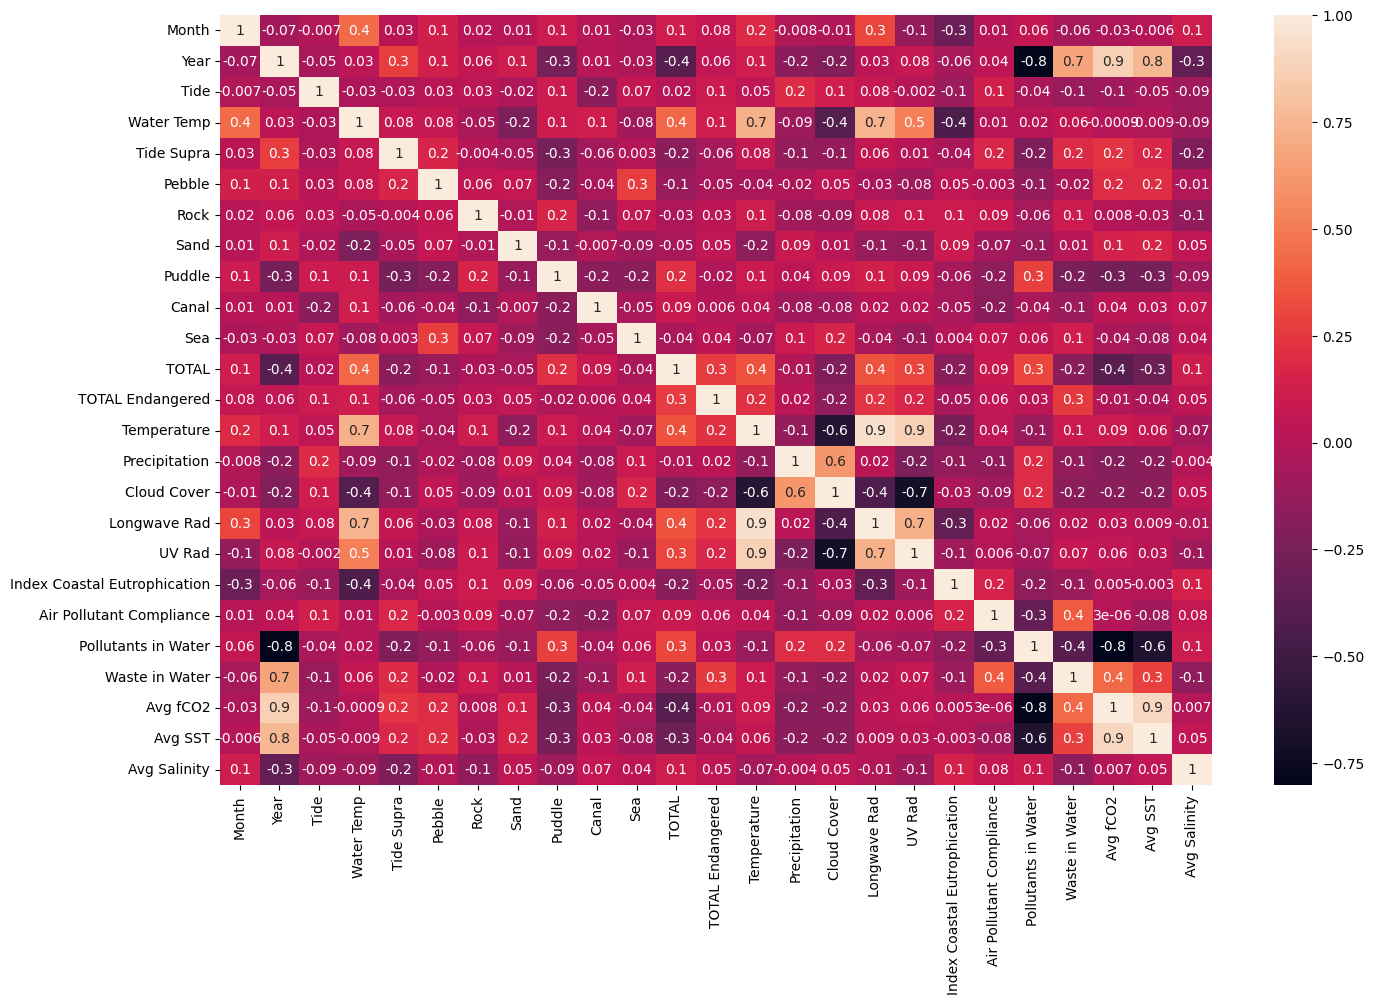

In [ ]:
mobil_sca_corr = mobil_sca.copy()
corr = mobil_sca_corr.corr()

figure = plt.figure(figsize=(16,10))
sns.heatmap(data = corr, annot=True, fmt = '.1g')

####2.2 Preparing data_sessil

##### 2.2.1 Defining the granularity

**First**, we need to see which granularity to choose. In this case, we only have a few days with samples per month, so it makes sense to aggregate by month. For that, we added a 'Year' and 'Month' columns to the sessil dataset

In [ ]:
df_sessil['Date'].unique()

array(['2011-11-28T00:00:00.000000000', '2011-11-29T00:00:00.000000000',
       '2011-12-12T00:00:00.000000000', '2011-12-14T00:00:00.000000000',
       '2012-01-11T00:00:00.000000000', '2012-01-12T00:00:00.000000000',
       '2012-01-24T00:00:00.000000000', '2012-01-25T00:00:00.000000000',
       '2012-02-09T00:00:00.000000000', '2012-02-10T00:00:00.000000000',
       '2012-02-22T00:00:00.000000000', '2012-02-23T00:00:00.000000000',
       '2012-03-08T00:00:00.000000000', '2012-03-09T00:00:00.000000000',
       '2012-03-21T00:00:00.000000000', '2012-03-22T00:00:00.000000000',
       '2012-04-05T00:00:00.000000000', '2012-04-10T00:00:00.000000000',
       '2012-04-23T00:00:00.000000000', '2012-04-24T00:00:00.000000000',
       '2012-05-08T00:00:00.000000000', '2012-05-10T00:00:00.000000000',
       '2012-05-22T00:00:00.000000000', '2012-05-23T00:00:00.000000000',
       '2012-06-05T00:00:00.000000000', '2012-06-07T00:00:00.000000000',
       '2012-06-21T00:00:00.000000000', '2012-06-22

In [ ]:
# Extract year and month and add as new columns
df_sessil['Year'] = df_sessil['Date'].dt.year
df_sessil['Month'] = df_sessil['Date'].dt.month

In [ ]:
df_sessil.head()

Date      Hour  Tide Weather Condition  Water Temp Sampler Zone  \
0 2011-11-28  12:20:00   0.6         Clear sky        16.0   AF SF    D   
1 2011-11-28  12:35:00   0.6         Clear sky        16.0   AF SF    D   
2 2011-11-28  10:10:00   0.6         Clear sky        16.0   AF SF    D   
3 2011-11-28  10:25:00   0.6         Clear sky        16.0   AF SF    D   
4 2011-11-28  10:40:00   0.6         Clear sky        16.0   AF SF    D   

   Chthamalus sp.  Balanus perforatus  Patella sp.  ...  Pebble  Rock  Sand  \
0               7                   0            6  ...       0     1     0   
1               0                   0            0  ...       0     1     0   
2               0                   0            0  ...       0     0     0   
3               8                   0            3  ...       0     1     0   
4              25                   0            5  ...       0     1     0   

   Puddle  Canal  Sea  Tide Supra  TOTAL2  Year  Month  
0       0      0    0           1      93  2011     11  
1       0      0    0           1       0  2011     11  
2       1      0    0           0     100  2011     11  
3       0      0    0           0      97  2011     11  
4       0      0    0           0      65  2011     11  

[5 rows x 109 columns]

#####2.2.2 Calculating the Total % of species and invasive species

**Second**, we just want to keep the columns that are not species, the 'TOTAL2' % covered of the sample with sessile species in each sample and add a column with 'TOTAL invasive' species. For that, we created a list with the columns we want to keep, including the invasive species (even if some of them didn't match the name in the dataset) and then we added a new column corresponding to the sum of those

In [ ]:
data_invasive

Species
33   Asparagopsis armata
44  Osmundea pinnatifida
49       Cladophora sp. 
53            Codium sp.
58   Colpomenia sinuosa

In [ ]:
# extract the list of columns from the endangered species dataset
invasive_list = data_invasive['Species'].tolist()

# we added some extra species since these have different names in df_mobil and were being filtered out 
other_species_inv = ['Asparagopsis armata (tufosa)', 'Asparagopsis armata (adulta)', 'Cladophora sp. (limo)', 'Codium sp. (alga verde carnuda)', 'Colpomenia sinuosa (alga bolhas)']

invasive_list.extend(other_species_inv)

In [ ]:
# other columns besides the species that we also want to include in the final dataset 
other_columns_inv = ['Year', 'Month', 'Tide', 'Water Temp', 'Zone', 'Tide Supra', 'Pebble', 'Rock', 'Sand', 'Puddle', 'Canal', 'Sea', 'Coverage %', 'TOTAL2']

other_columns_inv.extend(invasive_list)

# filter the columns in the first dataset
sessil_filtered = df_sessil.filter(other_columns_inv, axis = 1)

In [ ]:
sessil_filtered.columns

Index(['Year', 'Month', 'Tide', 'Water Temp', 'Zone', 'Tide Supra', 'Pebble',
       'Rock', 'Sand', 'Puddle', 'Canal', 'Sea', 'Coverage %', 'TOTAL2',
       'Osmundea pinnatifida', 'Asparagopsis armata (tufosa)',
       'Asparagopsis armata (adulta)', 'Cladophora sp. (limo)',
       'Codium sp. (alga verde carnuda)', 'Colpomenia sinuosa (alga bolhas)'],
      dtype='object')

Note that to sum the % of invasive species to see the total of them in each sample, we need to convert these columns into int

In [ ]:
i = invasive_list
# create new column and initialize with zeros
sessil_filtered['TOTAL Invasive'] = 0

# sum the number of invasiev species
for element in i:
    if element in sessil_filtered.columns:
        sessil_filtered['TOTAL Invasive'] = sessil_filtered['TOTAL Invasive'] + sessil_filtered[element]
        sessil_filtered = sessil_filtered.drop(columns=[element])

In [ ]:
sessil_filtered

Year  Month  Tide  Water Temp Zone  Tide Supra  Pebble  Rock  Sand  \
0     2011     11   0.6        16.0    D           1       0     1     0   
1     2011     11   0.6        16.0    D           1       0     1     0   
2     2011     11   0.6        16.0    D           0       0     0     0   
3     2011     11   0.6        16.0    D           0       0     1     0   
4     2011     11   0.6        16.0    D           0       0     1     0   
...    ...    ...   ...         ...  ...         ...     ...   ...   ...   
1966  2020     11   0.4        18.0    F           0       0     1     1   
1967  2020     11   0.4        18.0    F           0       0     1     1   
1968  2020     11   0.4        18.0    F           0       0     1     0   
1969  2020     11   0.4        18.0    F           1       0     1     0   
1970  2020     11   0.4        18.0    F           1       0     1     0   

      Puddle  Canal  Sea  Coverage %  TOTAL2  TOTAL Invasive  
0          0      0    0          93      93              80  
1          0      0    0           0       0               0  
2          1      0    0         100     100               0  
3          0      0    0          99      97               0  
4          0      0    0          66      65               0  
...      ...    ...  ...         ...     ...             ...  
1966       0      0    0          52      52               2  
1967       0      0    0          39      36               0  
1968       0      0    0          16      14               0  
1969       0      0    0           3       3               0  
1970       0      0    0           9       9               0  

[1971 rows x 15 columns]

##### 2.2.3 Grouping the dataset

**Third**, we need to group the dataset by 'Year' and 'Month' and for each of the columns the method for grouping will be different. Note that for the months there were no results, an extrapolation based on the previous month was made

In [ ]:
# months that were missing 
# 2018 06 08 09 11 12
# 2019 02 03 04 06 08 12
# 2020 02 03 09 10 

In [ ]:
# we didnt have monthly info for every month and for a time-series model, that is required
# so we decided to interpolate those missing values

# create a copy of the dataset
sessil_int = sessil_filtered.copy()

# create a new dataframe with all months from 2011 to 2020
all_months = pd.date_range('2011-11', '2020-12', freq='MS')
all_months_df = pd.DataFrame({'Year': all_months.year, 'Month': all_months.month})

# merge with original dataframe to include missing months
sessil_int = pd.merge(all_months_df, sessil_filtered, on=['Year', 'Month'], how='left')

# perform linear interpolation to fill in missing values
sessil_int = sessil_int.interpolate(method='linear')

# fill missing values using the average of the nearest non-missing values and the corresponding month from the previous year
for i, row in sessil_int.iterrows():
    if pd.isnull(row['Month']):  
        prev_year = sessil_int[(sessil_int['Year'] == row['Year'] - 1) & (sessil_int['Month'] == row['Month'])]['Month'].values[0]
        next_year = sessil_int[(sessil_int['Year'] == row['Year'] + 1) & (sessil_int['Month'] == row['Month'])]['Month'].values[0]
        sessil_int.at[i, 'Month'] = (prev_year + next_year) / 2

# display the resulting dataframe
sessil_int

Year  Month  Tide  Water Temp Zone  Tide Supra  Pebble  Rock  Sand  \
0     2011     11   0.6        16.0    D         1.0     0.0   1.0   0.0   
1     2011     11   0.6        16.0    D         1.0     0.0   1.0   0.0   
2     2011     11   0.6        16.0    D         0.0     0.0   0.0   0.0   
3     2011     11   0.6        16.0    D         0.0     0.0   1.0   0.0   
4     2011     11   0.6        16.0    D         0.0     0.0   1.0   0.0   
...    ...    ...   ...         ...  ...         ...     ...   ...   ...   
1983  2020     11   0.4        18.0    F         0.0     0.0   1.0   1.0   
1984  2020     11   0.4        18.0    F         0.0     0.0   1.0   0.0   
1985  2020     11   0.4        18.0    F         1.0     0.0   1.0   0.0   
1986  2020     11   0.4        18.0    F         1.0     0.0   1.0   0.0   
1987  2020     12   0.4        18.0  NaN         1.0     0.0   1.0   0.0   

      Puddle  Canal  Sea  Coverage %  TOTAL2  TOTAL Invasive  
0        0.0    0.0  0.0        93.0    93.0            80.0  
1        0.0    0.0  0.0         0.0     0.0             0.0  
2        1.0    0.0  0.0       100.0   100.0             0.0  
3        0.0    0.0  0.0        99.0    97.0             0.0  
4        0.0    0.0  0.0        66.0    65.0             0.0  
...      ...    ...  ...         ...     ...             ...  
1983     0.0    0.0  0.0        39.0    36.0             0.0  
1984     0.0    0.0  0.0        16.0    14.0             0.0  
1985     0.0    0.0  0.0         3.0     3.0             0.0  
1986     0.0    0.0  0.0         9.0     9.0             0.0  
1987     0.0    0.0  0.0         9.0     9.0             0.0  

[1988 rows x 15 columns]

In [ ]:
# group the 'sessil_int' dataframe by 'Year' and 'Month' for all columns except 'TOTAL' and 'TOTAL Endangered'
grouped = sessil_int.groupby(['Year', 'Month']).agg({'Tide': 'mean',
                                                    'Water Temp': 'mean',
                                                    'Tide Supra': 'mean',
                                                    'Pebble': 'mean',
                                                    'Rock': 'mean',
                                                    'Sand': 'mean',
                                                    'Puddle': 'mean',
                                                    'Canal': 'mean',
                                                    'Sea': 'mean',
                                                    'Coverage %': 'mean'})

# sum the 'TOTAL' and 'TOTAL Endangered' columns by 'Year' and 'Month'
summed = sessil_int.groupby(['Year', 'Month'])['TOTAL2', 'TOTAL Invasive'].sum()

# merge the two dataframes on 'Year' and 'Month' columns
sessil_grouped = pd.merge(grouped, summed, on=['Year', 'Month'])

# display the resulting dataframe
sessil_grouped

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Tide  Water Temp  Tide Supra    Pebble      Rock      Sand  \
Year Month                                                                   
2011 11     0.700000       16.00    0.363636  0.000000  0.909091  0.000000   
     12     0.900000       16.00    0.363636  0.136364  0.636364  0.045455   
2012 1      0.650000       16.00    0.363636  0.022727  0.818182  0.250000   
     2      0.600000       14.50    0.363636  0.022727  0.840909  0.159091   
     3      0.625000       15.75    0.363636  0.000000  1.000000  0.272727   
...              ...         ...         ...       ...       ...       ...   
2020 8      0.900000       18.00    0.333333  0.000000  1.000000  0.777778   
     9      0.733333       18.00    0.666667  0.000000  1.000000  0.333333   
     10     0.566667       18.00    0.333333  0.000000  1.000000  0.666667   
     11     0.400000       18.00    0.400000  0.000000  1.000000  0.400000   
     12     0.400000       18.00    1.000000  0.000000  1.000000  0.000000   

              Puddle     Canal       Sea  Coverage %       TOTAL2  \
Year Month                                                          
2011 11     0.136364  0.000000  0.000000   65.136364  1427.000000   
     12     0.181818  0.045455  0.000000   49.272727  1068.000000   
2012 1      0.227273  0.000000  0.000000   56.636364  2459.000000   
     2      0.204545  0.000000  0.000000   48.977273  2127.000000   
     3      0.204545  0.022727  0.022727   35.818182  1501.000000   
...              ...       ...       ...         ...          ...   
2020 8      0.000000  0.000000  0.000000   39.444444   355.000000   
     9      0.000000  0.000000  0.000000   50.333333    50.333333   
     10     0.000000  0.000000  0.000000   74.666667    74.666667   
     11     0.100000  0.000000  0.000000   52.600000   516.000000   
     12     0.000000  0.000000  0.000000    9.000000     9.000000   

            TOTAL Invasive  
Year Month                  
2011 11              213.0  
     12              225.0  
2012 1               288.0  
     2               462.0  
     3               169.0  
...                    ...  
2020 8               164.0  
     9                 0.0  
     10                0.0  
     11                2.0  
     12                0.0  

[110 rows x 12 columns]

#####2.2.4 Joining datasets

**Fourth**, we need to join the weather dataset by year and month columns

In [ ]:
# to guarantee that the join works well, we will reset the index of both datasets
sessil_grouped = sessil_grouped.reset_index()
weather = weather.reset_index()
extra = extra.reset_index()
ocean = ocean.reset_index()

In [ ]:
# setting 'Date' as the index
sessil_grouped = sessil_grouped.set_index(['Year', 'Month'])
weather = weather.set_index(['Year', 'Month'])
extra = extra.set_index(['Year', 'Month'])
ocean = ocean.set_index(['Year', 'Month'])

In [ ]:
# adding the weather, ocean and extra datasets to mobil_group
sessil = pd.merge(sessil_grouped, weather, on=['Year', 'Month']).merge(extra, on=['Year', 'Month']).merge(ocean, on=['Year', 'Month'])

sessil

Tide  Water Temp  Tide Supra    Pebble      Rock      Sand  \
Year Month                                                                   
2011 11     0.700000       16.00    0.363636  0.000000  0.909091  0.000000   
     12     0.900000       16.00    0.363636  0.136364  0.636364  0.045455   
2012 1      0.650000       16.00    0.363636  0.022727  0.818182  0.250000   
     2      0.600000       14.50    0.363636  0.022727  0.840909  0.159091   
     3      0.625000       15.75    0.363636  0.000000  1.000000  0.272727   
...              ...         ...         ...       ...       ...       ...   
2020 7      0.900000       17.00    0.416667  0.000000  1.000000  0.166667   
     8      0.900000       18.00    0.333333  0.000000  1.000000  0.777778   
     9      0.733333       18.00    0.666667  0.000000  1.000000  0.333333   
     10     0.566667       18.00    0.333333  0.000000  1.000000  0.666667   
     11     0.400000       18.00    0.400000  0.000000  1.000000  0.400000   

              Puddle     Canal       Sea  Coverage %  ...      UV Rad  \
Year Month                                            ...               
2011 11     0.136364  0.000000  0.000000   65.136364  ...  164.369333   
     12     0.181818  0.045455  0.000000   49.272727  ...   80.235162   
2012 1      0.227273  0.000000  0.000000   56.636364  ...  104.846128   
     2      0.204545  0.000000  0.000000   48.977273  ...  242.778621   
     3      0.204545  0.022727  0.022727   35.818182  ...  415.028389   
...              ...       ...       ...         ...  ...         ...   
2020 7      0.250000  0.000000  0.000000   80.083333  ...  676.492575   
     8      0.000000  0.000000  0.000000   39.444444  ...  567.719039   
     9      0.000000  0.000000  0.000000   50.333333  ...  432.139334   
     10     0.000000  0.000000  0.000000   74.666667  ...  220.095161   
     11     0.100000  0.000000  0.000000   52.600000  ...  155.031332   

            index_x  Index Coastal Eutrophication  Air Pollutant Compliance  \
Year Month                                                                    
2011 11           0                           0.1                      0.95   
     12           1                           0.6                      0.95   
2012 1            2                           0.4                      0.87   
     2            3                           0.2                      0.87   
     3            4                           6.1                      0.87   
...             ...                           ...                       ...   
2020 7          104                           0.1                      0.94   
     8          105                           0.2                      0.94   
     9          106                           0.1                      0.94   
     10         107                           0.7                      0.94   
     11         108                           0.1                      0.94   

            Pollutants in Water  Waste in Water  index_y    Avg fCO2  \
Year Month                                                             
2011 11            3.997700e+08    2.683034e+06        0  361.705000   
     12            3.997700e+08    2.683034e+06        1  361.705000   
2012 1             3.736819e+08    3.227377e+06        2  345.797500   
     2             3.736819e+08    3.227377e+06        3  345.797500   
     3             3.736819e+08    3.227377e+06        4  345.797500   
...                         ...             ...      ...         ...   
2020 7             1.919272e+08    2.318965e+07      104  389.695286   
     8             1.919272e+08    2.318965e+07      105  389.695286   
     9             1.919272e+08    2.318965e+07      106  389.695286   
     10            1.919272e+08    2.318965e+07      107  389.695286   
     11            1.919272e+08    2.318965e+07      108  389.695286   

              Avg SST  Avg Salinity  
Year Month                           
2011 11   

In [ ]:
# dropping the index columns
sessil = sessil.drop('index_x', axis = 1)
sessil = sessil.drop('index_y', axis = 1)

# after joining the datasets, we will set a new index
sessil = sessil.reset_index()
sessil.index = range(1, len(sessil)+1)

sessil

Year  Month      Tide  Water Temp  Tide Supra    Pebble      Rock  \
1    2011     11  0.700000       16.00    0.363636  0.000000  0.909091   
2    2011     12  0.900000       16.00    0.363636  0.136364  0.636364   
3    2012      1  0.650000       16.00    0.363636  0.022727  0.818182   
4    2012      2  0.600000       14.50    0.363636  0.022727  0.840909   
5    2012      3  0.625000       15.75    0.363636  0.000000  1.000000   
..    ...    ...       ...         ...         ...       ...       ...   
105  2020      7  0.900000       17.00    0.416667  0.000000  1.000000   
106  2020      8  0.900000       18.00    0.333333  0.000000  1.000000   
107  2020      9  0.733333       18.00    0.666667  0.000000  1.000000   
108  2020     10  0.566667       18.00    0.333333  0.000000  1.000000   
109  2020     11  0.400000       18.00    0.400000  0.000000  1.000000   

         Sand    Puddle     Canal  ...  Cloud Cover  Longwave Rad      UV Rad  \
1    0.000000  0.136364  0.000000  ...    42.099444   6857.733333  164.369333   
2    0.045455  0.181818  0.045455  ...    71.916533   7155.548387   80.235162   
3    0.250000  0.227273  0.000000  ...    67.318145   6869.387097  104.846128   
4    0.159091  0.204545  0.000000  ...    46.918103   5795.344828  242.778621   
5    0.272727  0.204545  0.022727  ...    25.741129   6622.451613  415.028389   
..        ...       ...       ...  ...          ...           ...         ...   
105  0.166667  0.250000  0.000000  ...    35.686290   8403.935484  676.492575   
106  0.777778  0.000000  0.000000  ...    35.977688   8582.612903  567.719039   
107  0.333333  0.000000  0.000000  ...    34.700278   8075.733333  432.139334   
108  0.666667  0.000000  0.000000  ...    66.438979   7574.870968  220.095161   
109  0.400000  0.100000  0.000000  ...    42.824028   6921.800000  155.031332   

     Index Coastal Eutrophication  Air Pollutant Compliance  \
1                             0.1                      0.95   
2                             0.6                      0.95   
3                             0.4                      0.87   
4                             0.2                      0.87   
5                             6.1                      0.87   
..                            ...                       ...   
105                           0.1                      0.94   
106                           0.2                      0.94   
107                           0.1                      0.94   
108                           0.7                      0.94   
109                           0.1                      0.94   

     Pollutants in Water  Waste in Water    Avg fCO2    Avg SST  Avg Salinity  
1           3.997700e+08    2.683034e+06  361.705000  17.865100     36.279600  
2           3.997700e+08    2.683034e+06  361.705000  17.865100     36.279600  
3           3.736819e+08    3.227377e+06  345.797500  15.292425     35.818625  
4           3.736819e+08    3.227377e+06  345.797500  15.292425     35.818625  
5           3.736819e+08    3.227377e+06  345.797500  15.292425     35.818625  
..                   ...             ...         ...        ...           ...  
105         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
106         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
107         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
108         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  
109         1.919272e+08    2.318965e+07  389.695286  18.670271     35.893657  

[109 rows x 26 columns]

##### 2.2.5 Normalizing the dataset

**Finally**, we just need to normalize data to continue with the model preparation:

In [ ]:
# create a subset of the DataFrame without the 'Month' and 'Year' columns
columns_to_exclude = ['Month', 'Year']
subset = sessil.drop(columns=columns_to_exclude)

# perform min-max scaling on the subset
scaler = MinMaxScaler()
scaled_subset = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns, index=subset.index)

# concatenate the scaled subset with the excluded columns
sessil_sca = pd.concat([sessil[columns_to_exclude], scaled_subset], axis=1)

# replace infinite values with 0 
sessil_sca.replace([np.inf, -np.inf], 0, inplace = True)

# display the resulting DataFrame
sessil_sca

Month  Year      Tide  Water Temp  Tide Supra    Pebble      Rock  \
1       11  2011  0.347368    0.473684    0.227273  0.000000  0.818182   
2       12  2011  0.578947    0.473684    0.227273  0.272727  0.272727   
3        1  2012  0.289474    0.473684    0.227273  0.045455  0.636364   
4        2  2012  0.231579    0.315789    0.227273  0.045455  0.681818   
5        3  2012  0.260526    0.447368    0.227273  0.000000  1.000000   
..     ...   ...       ...         ...         ...       ...       ...   
105      7  2020  0.578947    0.578947    0.333333  0.000000  1.000000   
106      8  2020  0.578947    0.684211    0.166667  0.000000  1.000000   
107      9  2020  0.385965    0.684211    0.833333  0.000000  1.000000   
108     10  2020  0.192982    0.684211    0.166667  0.000000  1.000000   
109     11  2020  0.000000    0.684211    0.300000  0.000000  1.000000   

         Sand    Puddle     Canal  ...  Cloud Cover  Longwave Rad    UV Rad  \
1    0.000000  0.230769  0.000000  ...     0.372122      0.365547  0.134359   
2    0.054545  0.307692  0.090909  ...     0.953899      0.468019  0.002693   
3    0.300000  0.384615  0.000000  ...     0.864177      0.369557  0.041208   
4    0.190909  0.346154  0.000000  ...     0.466142      0.000000  0.257065   
5    0.327273  0.346154  0.045455  ...     0.052947      0.284591  0.526627   
..        ...       ...       ...  ...          ...           ...       ...   
105  0.200000  0.423077  0.000000  ...     0.246992      0.897564  0.935804   
106  0.933333  0.000000  0.000000  ...     0.252678      0.959043  0.765579   
107  0.400000  0.000000  0.000000  ...     0.227754      0.784636  0.553404   
108  0.800000  0.000000  0.000000  ...     0.847023      0.612299  0.221567   
109  0.480000  0.169231  0.000000  ...     0.386260      0.387591  0.119745   

     Index Coastal Eutrophication  Air Pollutant Compliance  \
1                        0.005464                  0.976471   
2                        0.032787                  0.976471   
3                        0.021858                  0.882353   
4                        0.010929                  0.882353   
5                        0.333333                  0.882353   
..                            ...                       ...   
105                      0.005464                  0.964706   
106                      0.010929                  0.964706   
107                      0.005464                  0.964706   
108                      0.038251                  0.964706   
109                      0.005464                  0.964706   

     Pollutants in Water  Waste in Water  Avg fCO2   Avg SST  Avg Salinity  
1               1.000000        0.006743  0.282863  0.553105      1.000000  
2               1.000000        0.006743  0.282863  0.553105      1.000000  
3               0.883428        0.033109  0.000000  0.013062      0.175763  
4               0.883428        0.033109  0.000000  0.013062      0.175763  
5               0.883428        0.033109  0.000000  0.013062      0.175763  
..                   ...             ...       ...       ...           ...  
105             0.071275        1.000000  0.780579  0.722123      0.309923  
106             0.071275        1.000000  0.780579  0.722123      0.309923  
107             0.071275        1.000000  0.780579  0.722123      0.309923  
108             0.071275        1.000000  0.780579  0.722123      0.309923  
109             0.071275        1.000000  0.780579  0.722123      0.309923  

[109 rows x 26 columns]

In [ ]:
# round the values to the decimals
sessil_sca['Tide'] = sessil_sca['Tide'].round(2)
sessil_sca['Tide Supra'] = sessil_sca['Tide Supra'].round(2)
sessil_sca['Pebble'] = sessil_sca['Pebble'].round(0)
sessil_sca['Rock'] = sessil_sca['Rock'].round(0)
sessil_sca['Sand'] = sessil_sca['Sand'].round(0)
sessil_sca['Puddle'] = sessil_sca['Puddle'].round(0)
sessil_sca['Canal'] = sessil_sca['Canal'].round(0)
sessil_sca['Sea'] = sessil_sca['Sea'].round(0)
sessil_sca['TOTAL2'] = sessil_sca['TOTAL2'].round(2)
sessil_sca['TOTAL Invasive'] = sessil_sca['TOTAL Invasive'].round(2)
sessil_sca['Water Temp'] = sessil_sca['Water Temp'].round(1)
sessil_sca['Temperature'] = sessil_sca['Temperature'].round(1)
sessil_sca['Precipitation'] = sessil_sca['Precipitation'].round(1)
sessil_sca['Cloud Cover'] = sessil_sca['Cloud Cover'].round(1)
sessil_sca['Longwave Rad'] = sessil_sca['Longwave Rad'].round(1)
sessil_sca['UV Rad'] = sessil_sca['UV Rad'].round(1)
sessil_sca['Coverage %'] = sessil_sca['Coverage %'].round(2)
sessil_sca['Avg SST'] = sessil_sca['Avg SST'].round(2)
sessil_sca['Avg Salinity'] = sessil_sca['Avg Salinity'].round(2)
sessil_sca['Avg fCO2'] = sessil_sca['Avg fCO2'].round(2)
sessil_sca['Pollutants in Water'] = sessil_sca['Pollutants in Water'].round(2)
sessil_sca['Waste in Water'] = sessil_sca['Waste in Water'].round(2)
sessil_sca['Index Coastal Eutrophication'] = sessil_sca['Index Coastal Eutrophication'].round(2)
sessil_sca['Air Pollutant Compliance'] = sessil_sca['Air Pollutant Compliance'].round(2)

sessil_sca

Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1       11  2011  0.35         0.5        0.23     0.0   1.0   0.0     0.0   
2       12  2011  0.58         0.5        0.23     0.0   0.0   0.0     0.0   
3        1  2012  0.29         0.5        0.23     0.0   1.0   0.0     0.0   
4        2  2012  0.23         0.3        0.23     0.0   1.0   0.0     0.0   
5        3  2012  0.26         0.4        0.23     0.0   1.0   0.0     0.0   
..     ...   ...   ...         ...         ...     ...   ...   ...     ...   
105      7  2020  0.58         0.6        0.33     0.0   1.0   0.0     0.0   
106      8  2020  0.58         0.7        0.17     0.0   1.0   1.0     0.0   
107      9  2020  0.39         0.7        0.83     0.0   1.0   0.0     0.0   
108     10  2020  0.19         0.7        0.17     0.0   1.0   1.0     0.0   
109     11  2020  0.00         0.7        0.30     0.0   1.0   0.0     0.0   

     Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1      0.0  ...          0.4           0.4     0.1   
2      0.0  ...          1.0           0.5     0.0   
3      0.0  ...          0.9           0.4     0.0   
4      0.0  ...          0.5           0.0     0.3   
5      0.0  ...          0.1           0.3     0.5   
..     ...  ...          ...           ...     ...   
105    0.0  ...          0.2           0.9     0.9   
106    0.0  ...          0.3           1.0     0.8   
107    0.0  ...          0.2           0.8     0.6   
108    0.0  ...          0.8           0.6     0.2   
109    0.0  ...          0.4           0.4     0.1   

     Index Coastal Eutrophication  Air Pollutant Compliance  \
1                            0.01                      0.98   
2                            0.03                      0.98   
3                            0.02                      0.88   
4                            0.01                      0.88   
5                            0.33                      0.88   
..                            ...                       ...   
105                          0.01                      0.96   
106                          0.01                      0.96   
107                          0.01                      0.96   
108                          0.04                      0.96   
109                          0.01                      0.96   

     Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                   1.00            0.01      0.28     0.55          1.00  
2                   1.00            0.01      0.28     0.55          1.00  
3                   0.88            0.03      0.00     0.01          0.18  
4                   0.88            0.03      0.00     0.01          0.18  
5                   0.88            0.03      0.00     0.01          0.18  
..                   ...             ...       ...      ...           ...  
105                 0.07            1.00      0.78     0.72          0.31  
106                 0.07            1.00      0.78     0.72          0.31  
107                 0.07            1.00      0.78     0.72          0.31  
108                 0.07            1.00      0.78     0.72          0.31  
109                 0.07            1.00      0.78     0.72          0.31  

[109 rows x 26 columns]


##### 2.2.6 Correlations

<Axes: >

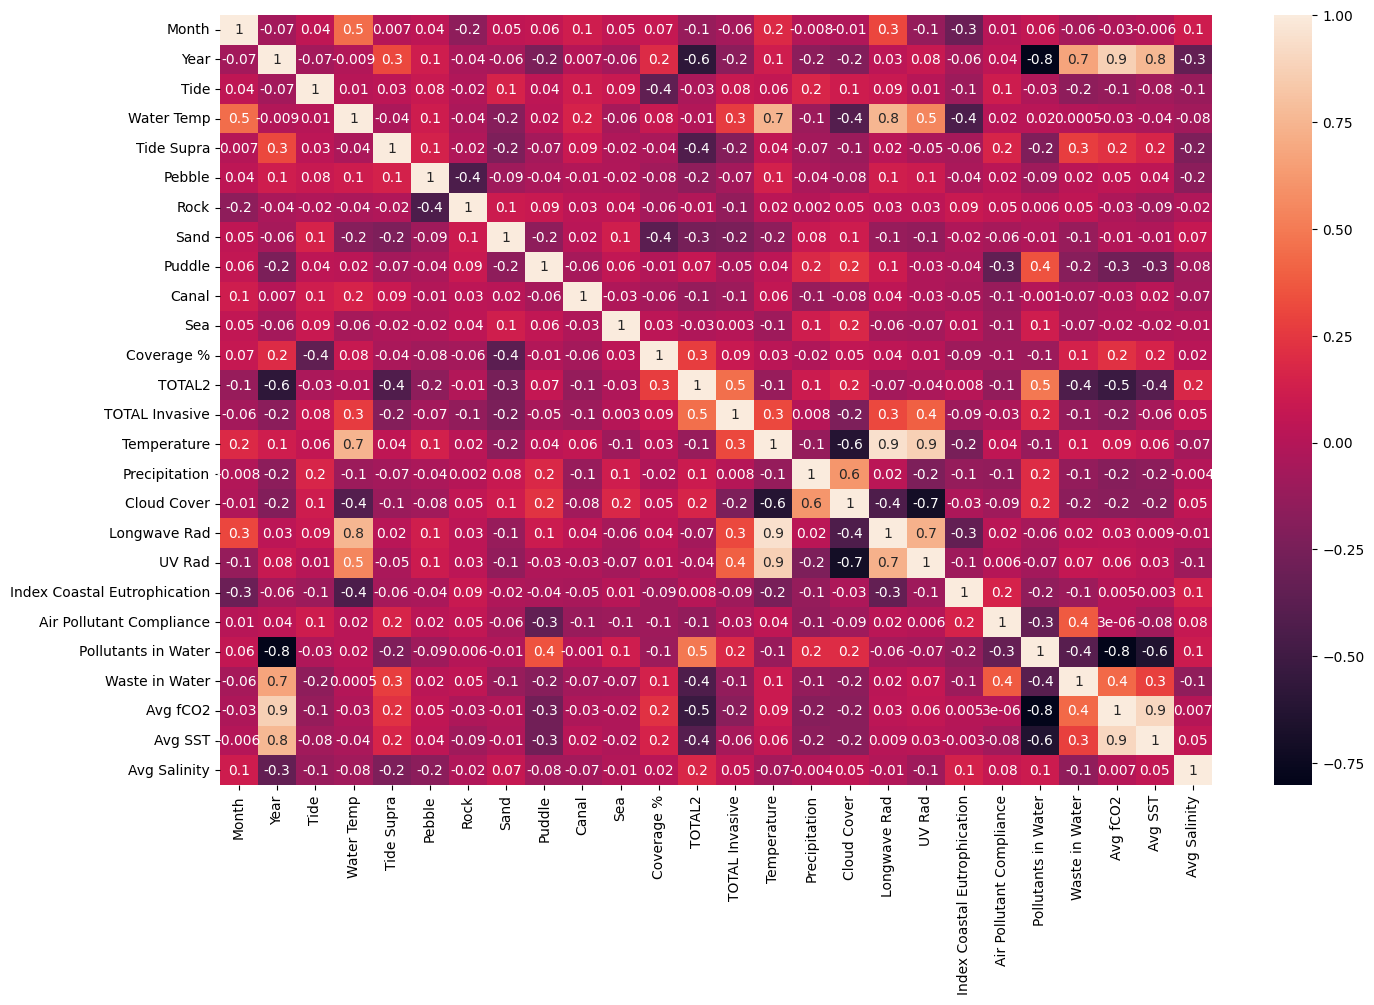

In [ ]:
sessil_sca_corr = sessil_sca.copy()
corr = sessil_sca_corr.corr()

figure = plt.figure(figsize=(16,10))
sns.heatmap(data = corr, annot=True, fmt = '.1g')

###3. Feature Selection

To optimize our model's performance, it is crucial to select the **most relevant features**, which helps mitigate potential overfitting and improves accuracy. Various techniques can be employed for feature selection:
- **Univariate Feature Selection**: evaluates the individual predictive power of each feature, considering their statistical significance and relevance to the target variable

- **Recursive Feature Elimination**: iteratively eliminates less important features by training the model on subsets of features and assessing their impact on model performance

- **Feature Importance using Trees**: provides a measure of feature importance based on the contribution of each feature to the predictive power of the modes, using tree-based algorithms

#### 3.1 Dataset "mobil_sca"

#####3.1.1 Univariate Feature Selection (ANOVA)

In [ ]:
# split the dataset into features (X) and target (y)
X = mobil_sca.drop('TOTAL', axis=1)
y = mobil_sca['TOTAL']

# select the k best features based on f_regression score
selector = SelectKBest(f_regression, k=9)  
X_new = selector.fit_transform(X, y)

# get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features_names = X.columns[selected_features_indices].tolist()

# print the selected feature names
print('Selected features: ', selected_features_names)

Selected features:  ['Year', 'Water Temp', 'TOTAL Endangered', 'Temperature', 'Longwave Rad', 'UV Rad', 'Pollutants in Water', 'Avg fCO2', 'Avg SST']


We identified the following variables as important features: ['Year', 'Water Temp', 'Temperature', 'Longwave Rad', 'UV Rad', 'Pollutants in Water', 'Avg fCO2', 'TOTAL Endangered']

#####3.1.2 Recursive Feature Elimination (RFE)

Optimal number of features: 24
Selected features by RFE:  ['Month', 'Year', 'Tide', 'Water Temp', 'Tide Supra', 'Pebble', 'Rock', 'Sand', 'Puddle', 'Canal', 'Sea', 'TOTAL Endangered', 'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad', 'Index Coastal Eutrophication', 'Air Pollutant Compliance', 'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST', 'Avg Salinity']
Selected features by importance:  ['Pollutants in Water', 'Temperature', 'Waste in Water', 'TOTAL Endangered', 'Longwave Rad', 'Avg SST', 'Avg Salinity', 'Water Temp', 'Avg fCO2', 'Index Coastal Eutrophication', 'Year', 'Air Pollutant Compliance', 'UV Rad', 'Puddle', 'Tide', 'Canal', 'Cloud Cover', 'Precipitation', 'Sand', 'Rock', 'Sea', 'Pebble', 'Month', 'Tide Supra']


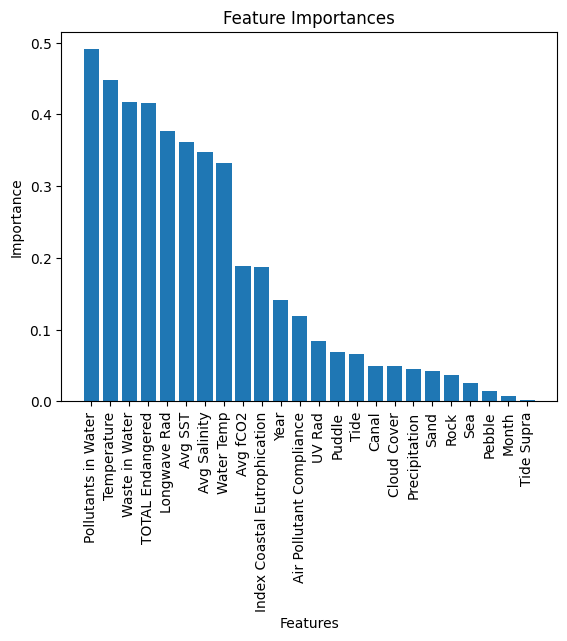

In [ ]:
# split the dataset into features (X) and target (y)
X = mobil_sca.drop('TOTAL', axis=1)
y = mobil_sca['TOTAL']

# create a linear regression model
lr = LinearRegression()

# use RFE to select the optimal number of features
final_score = 0
n_F = 0
for i in range(1, X.shape[1]+1):
    rfe = RFE(estimator=lr, n_features_to_select=i)
    X_rfe = rfe.fit_transform(X, y) 
    lr.fit(X_rfe, y)
    score = lr.score(X_rfe, y)
    if score > final_score:
        final_score = score
        n_F = i
        best_rfe = rfe

# get the selected feature indices
selected_features = best_rfe.support_

# get the feature importances
importances = abs(lr.coef_)

# get the indices of the top n_F features by importance
top_n_F = importances.argsort()[-n_F:][::-1]

# print the optimal number of features and their names
print("Optimal number of features: %d" % n_F)
print("Selected features by RFE: ", X.columns[selected_features].tolist())
print("Selected features by importance: ", X.columns[top_n_F].tolist())

# plot the feature importances
plt.bar(X.columns[top_n_F], importances[top_n_F])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

We identified the following variables as important features: ['Temperature', 'Longwave Rad', 'Waste in Water', 'Pollutants in Water', 'Avg SST', 'Water Temp', 'Avg Salinity', 'Avg fCO2', 'UV Rad', 'Index Coastal Eutrophication', 'Air Pollutant Compliance', 'Year', 'Canal', 'Tide Supra', 'Puddle', 'Sand', 'Tide', 'Cloud Cover', 'Precipitation', 'Month']

After some testing we decided to select only variables with a more meaningfull Importance in order to improve the model. Selecting only the variables:
['Waste in Water', 'Pollutants in Water', 'Avg Salinity', 'Avg SST', 'Temperature', 'Water Temp', 'Longwave Rad', 'Air Pollutant Compliance', 'Index Coastal Eutrophicationp', 'TOTAL Endangered','Year', 'Month']

##### 3.1.3 Decision Tree Regressor 

We created multiple decision trees with a limit in the number of features selected and without it in order to identify potential important features

In [ ]:
# create a decision tree regressor model
tree = DecisionTreeRegressor()

# fit the decision tree regressor model to the dataset
tree.fit(X, y)

# get the feature importances from the trained model
feature_importances = tree.feature_importances_

# set a cutoff for selecting the top 5 features based on their importance scores
cutoff = 0.05

# get the indices of the selected features based on their importance scores
selected_feature_indices = feature_importances >= cutoff

# get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices].tolist()

# print the selected feature names
print('Selected features: ', selected_feature_names)

Selected features:  ['Year', 'Water Temp', 'Temperature', 'Longwave Rad', 'Avg Salinity']


In [ ]:
# create a decision tree regressor model
tree = DecisionTreeRegressor()

# fit the decision tree regressor model to the dataset
tree.fit(X, y)

# get the feature importances from the trained model
feature_importances = tree.feature_importances_

# get the indices of the sorted feature importances in descending order
sorted_feature_indices = feature_importances.argsort()[::-1]

# get the names of the selected features based on their importance scores
selected_features_names = X.columns[sorted_feature_indices].tolist()

# print the selected feature names
print('Selected features: ', selected_features_names)

Selected features:  ['Year', 'Water Temp', 'Temperature', 'Longwave Rad', 'Avg Salinity', 'TOTAL Endangered', 'Waste in Water', 'Avg SST', 'Index Coastal Eutrophication', 'Month', 'UV Rad', 'Rock', 'Precipitation', 'Tide', 'Avg fCO2', 'Tide Supra', 'Cloud Cover', 'Canal', 'Air Pollutant Compliance', 'Sand', 'Pollutants in Water', 'Sea', 'Pebble', 'Puddle']


We identified the following variables as important features: ['Year', 'Month', 'Water Temp', 'Longwave Rad', 'Avg Salinity']

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


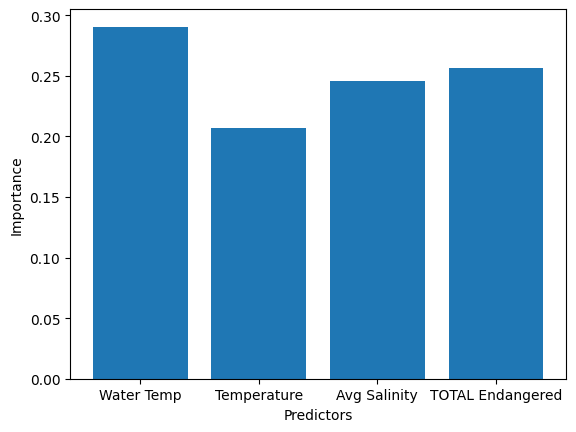

In [ ]:
# create a barplot with the selected variables
predictors = ['Water Temp', 'Temperature', 'Avg Salinity', 'TOTAL Endangered'] # we excluded year and month in this list, since they have to be in the model regardless
target = ['TOTAL']

# split the dataset into features (X) and target (y)
X = mobil_sca[predictors]
y = mobil_sca[target]

# create a random forest regressor model
model = RandomForestRegressor()

# fit model
model.fit(X, y)

# get feature importances
importances = model.feature_importances_

# create bar plot
fig, ax = plt.subplots()
ax.bar(predictors, importances)
ax.set_xlabel("Predictors")
ax.set_ylabel("Importance")
plt.show()

Evaluate the performance between the feature selection methods using the following methods:
* Score and accuracy
* Visualization

##### 3.1.4 Performance with ANOVA

In [ ]:
# load the original dataset
print(mobil_sca.head(3))

# load the feature selected dataset using ANOVA 
new_mobil_sca_fs1= mobil_sca.loc[:,['Year', 'Month', 'Water Temp','Temperature', 'UV Rad', 'Pollutants in Water', 'Avg SST', 'Longwave Rad','TOTAL Endangered','TOTAL']]
print(new_mobil_sca_fs1.head(3))

   Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1     11  2011  0.39         0.5         0.3     0.0   1.0   0.0     1.0   
2     12  2011  0.65         0.5         0.3     0.0   0.0   0.0     0.0   
3      1  2012  0.33         0.5         0.3     0.0   0.0   0.0     1.0   

   Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1    0.0  ...          0.4           0.4     0.1   
2    0.0  ...          1.0           0.5     0.0   
3    0.0  ...          0.9           0.4     0.0   

   Index Coastal Eutrophication  Air Pollutant Compliance  \
1                          0.01                      0.98   
2                          0.03                      0.98   
3                          0.02                      0.88   

   Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                 1.00            0.01      0.28     0.55          1.00  
2                 1.00            0.01      0.28     0.55          1.00  
3                 0

In [ ]:
# split our 2 datasets into train and test
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    mobil_sca.drop('TOTAL', axis=1), mobil_sca['TOTAL'], test_size=0.2, random_state=123)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(
    new_mobil_sca_fs1.drop('TOTAL', axis=1), new_mobil_sca_fs1['TOTAL'], test_size=0.2, random_state=123)

In [ ]:
# train random forest regressor on original dataset
rf_orig = RandomForestRegressor(n_estimators=100, random_state=123)
rf_orig.fit(X_orig_train, y_orig_train)

RandomForestRegressor(random_state=123)

In [ ]:
# train random forest regressor on reduced feature dataset
rf_fs = RandomForestRegressor(n_estimators=100, random_state=123)
rf_fs.fit(X_fs_train, y_fs_train)

RandomForestRegressor(random_state=123)

In [ ]:
# evaluate performance on test set
y_orig_pred = rf_orig.predict(X_orig_test)
y_fs_pred = rf_fs.predict(X_fs_test)

mae_orig = mean_absolute_error(y_orig_test, y_orig_pred)
mae_fs = mean_absolute_error(y_fs_test, y_fs_pred)

mse_orig = mean_squared_error(y_orig_test, y_orig_pred)
mse_fs = mean_squared_error(y_fs_test, y_fs_pred)

r2_orig = r2_score(y_orig_test, y_orig_pred)
r2_fs = r2_score(y_fs_test, y_fs_pred)

print("Original dataset performance:")
print("MAE:", mae_orig)
print("MSE:", mse_orig)
print("R-squared:", r2_orig)
print("--------------------------------------")
print("Reduced feature dataset performance:")
print("MAE:", mae_fs)
print("MSE:", mse_fs)
print("R-squared:", r2_fs)

Original dataset performance:
MAE: 0.08604545454545452
MSE: 0.013546569090909087
R-squared: 0.02982503366330791
--------------------------------------
Reduced feature dataset performance:
MAE: 0.047477272727272715
MSE: 0.004200914999999994
R-squared: 0.6991398677142988


#####3.1.5 Performance with RFE

In [ ]:
# load the original dataset
print(mobil_sca.head(3))

# load the feature selected dataset using RFE  
new_mobil_sca_fs2= mobil_sca.loc[:, ['Waste in Water', 'Pollutants in Water', 'Avg Salinity', 'Avg SST', 'Index Coastal Eutrophication' ,'Temperature', 'Water Temp', 'Air Pollutant Compliance', 'Year', 'Month', 'TOTAL Endangered','TOTAL']]
print(new_mobil_sca_fs2.head(3))

   Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1     11  2011  0.39         0.5         0.3     0.0   1.0   0.0     1.0   
2     12  2011  0.65         0.5         0.3     0.0   0.0   0.0     0.0   
3      1  2012  0.33         0.5         0.3     0.0   0.0   0.0     1.0   

   Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1    0.0  ...          0.4           0.4     0.1   
2    0.0  ...          1.0           0.5     0.0   
3    0.0  ...          0.9           0.4     0.0   

   Index Coastal Eutrophication  Air Pollutant Compliance  \
1                          0.01                      0.98   
2                          0.03                      0.98   
3                          0.02                      0.88   

   Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                 1.00            0.01      0.28     0.55          1.00  
2                 1.00            0.01      0.28     0.55          1.00  
3                 0

In [ ]:
# split our 2 datasets into train and test
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    mobil_sca.drop('TOTAL', axis=1), mobil_sca['TOTAL'], test_size=0.2, random_state=123)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(
    new_mobil_sca_fs2.drop('TOTAL', axis=1), new_mobil_sca_fs2['TOTAL'], test_size=0.2, random_state=123)

In [ ]:
# train random forest regressor on original dataset
rf_orig = RandomForestRegressor(n_estimators=100, random_state=123)
rf_orig.fit(X_orig_train, y_orig_train)

RandomForestRegressor(random_state=123)

In [ ]:
# train random forest regressor on reduced feature dataset
rf_fs = RandomForestRegressor(n_estimators=100, random_state=123)
rf_fs.fit(X_fs_train, y_fs_train)

RandomForestRegressor(random_state=123)

In [ ]:
# evaluate performance on test set
y_orig_pred = rf_orig.predict(X_orig_test)
y_fs_pred = rf_fs.predict(X_fs_test)

mae_orig = mean_absolute_error(y_orig_test, y_orig_pred)
mae_fs = mean_absolute_error(y_fs_test, y_fs_pred)

mse_orig = mean_squared_error(y_orig_test, y_orig_pred)
mse_fs = mean_squared_error(y_fs_test, y_fs_pred)

r2_orig = r2_score(y_orig_test, y_orig_pred)
r2_fs = r2_score(y_fs_test, y_fs_pred)

print("Original dataset performance:")
print("MAE:", mae_orig)
print("MSE:", mse_orig)
print("R-squared:", r2_orig)
print("--------------------------------------")
print("Reduced feature dataset performance:")
print("MAE:", mae_fs)
print("MSE:", mse_fs)
print("R-squared:", r2_fs)

Original dataset performance:
MAE: 0.08604545454545452
MSE: 0.013546569090909087
R-squared: 0.02982503366330791
--------------------------------------
Reduced feature dataset performance:
MAE: 0.05118636363636362
MSE: 0.004386392272727271
R-squared: 0.6858564004675871


##### 3.1.6 Performance of Decision Tree

In [ ]:
# load the original dataset
print(mobil_sca.head(3))

# load the feature selected dataset using Decision Tree
new_mobil_sca_fs3= mobil_sca.loc[:,['Year','Month', 'Water Temp', 'Temperature', 'Avg Salinity', 'TOTAL', 'TOTAL Endangered']]
print(new_mobil_sca_fs3.head(3))

   Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1     11  2011  0.39         0.5         0.3     0.0   1.0   0.0     1.0   
2     12  2011  0.65         0.5         0.3     0.0   0.0   0.0     0.0   
3      1  2012  0.33         0.5         0.3     0.0   0.0   0.0     1.0   

   Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1    0.0  ...          0.4           0.4     0.1   
2    0.0  ...          1.0           0.5     0.0   
3    0.0  ...          0.9           0.4     0.0   

   Index Coastal Eutrophication  Air Pollutant Compliance  \
1                          0.01                      0.98   
2                          0.03                      0.98   
3                          0.02                      0.88   

   Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                 1.00            0.01      0.28     0.55          1.00  
2                 1.00            0.01      0.28     0.55          1.00  
3                 0

In [ ]:
# split our 2 datasets into train and test
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(mobil_sca.drop('TOTAL', axis=1), mobil_sca['TOTAL'], test_size=0.2, random_state=123)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(new_mobil_sca_fs3.drop('TOTAL', axis=1), new_mobil_sca_fs3['TOTAL'], test_size=0.2, random_state=123)

In [ ]:
# train random forest regressor on original dataset
rf_orig = RandomForestRegressor(n_estimators=100, random_state=123)
rf_orig.fit(X_orig_train, y_orig_train)

RandomForestRegressor(random_state=123)

In [ ]:
# train random forest regressor on reduced feature dataset
rf_fs = RandomForestRegressor(n_estimators=100, random_state=123)
rf_fs.fit(X_fs_train, y_fs_train)

RandomForestRegressor(random_state=123)

In [ ]:
# evaluate performance on test set
y_orig_pred = rf_orig.predict(X_orig_test)
y_fs_pred = rf_fs.predict(X_fs_test)

mae_orig = mean_absolute_error(y_orig_test, y_orig_pred)
mae_fs = mean_absolute_error(y_fs_test, y_fs_pred)

mse_orig = mean_squared_error(y_orig_test, y_orig_pred)
mse_fs = mean_squared_error(y_fs_test, y_fs_pred)

r2_orig = r2_score(y_orig_test, y_orig_pred)
r2_fs = r2_score(y_fs_test, y_fs_pred)

print("Original dataset performance:")
print("MAE:", mae_orig)
print("MSE:", mse_orig)
print("R-squared:", r2_orig)
print("--------------------------------------")
print("Reduced feature dataset performance:")
print("MAE:", mae_fs)
print("MSE:", mse_fs)
print("R-squared:", r2_fs)

Original dataset performance:
MAE: 0.08604545454545452
MSE: 0.013546569090909087
R-squared: 0.02982503366330791
--------------------------------------
Reduced feature dataset performance:
MAE: 0.05120454545454544
MSE: 0.00485044136363636
R-squared: 0.6526222429381041


##### 3.1.7 Comparing feature selection methods

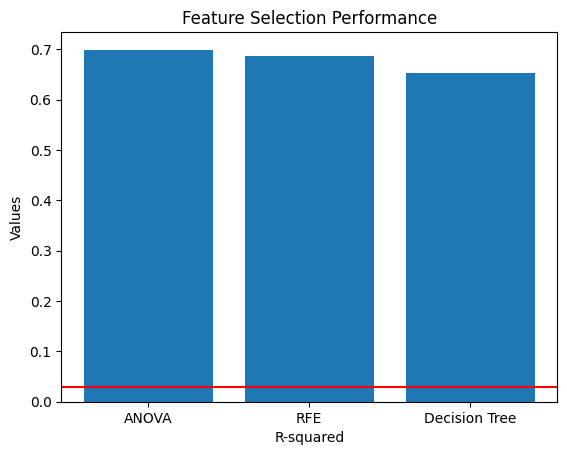

In [ ]:
# set the Y value for the horizontal bar
horizontal_bar_y = 0.02983

# create a list of metric values
metric_values = [0.6991398677142988, 0.6858564004675871, 0.6526222429381041]

# create a list of metric labels
metric_labels = ['ANOVA',"RFE","Decision Tree"]

# plot the metric values
plt.bar(metric_labels, metric_values)

# add the horizontal bar
plt.axhline(y=horizontal_bar_y, color='red')

# add labels and title
plt.xlabel('R-squared')
plt.ylabel('Values')
plt.title('Feature Selection Performance')

# display the plot
plt.show()

When comparing the metrics, a **lower** value for **MAE and MSE** indicates **better performance**, while a **higher** value for **R-squared** indicates **better fit** to the data. Based on these metrics, we can make the following observations:

- **MAE**: The Anova dataset has the lowest MAE (0.0475), followed by the Tree dataset (0.0511) and the RFE dataset (0.0512). The Original dataset has the highest MAE (0.0860).

- **MSE**: The Anova dataset has the lowest MSE (0.0042), followed by the RFE dataset (0.0043), the Decision Tree (0.0048), and the Original dataset (0.0135). Again, the Original dataset has the highest MSE.

- **R-squared**: The Anova dataset has the highest R-squared value (0.699), indicating the best fit to the data. The RFE dataset has the second-highest R-squared (0.686), followed by the Tree dataset (0.653), and the Original dataset has the lowest R-squared (0.0298).


> Based on these observations, it appears that the **Anova** dataset performs the best overall, as it has the lowest MAE and MAE and the highest R-squared value.

> The RFE dataset also performs well, with slightly higher MAE and MSE values but a strong R-squared value. The Tree dataset performs slightly worse than the RFE dataset, despite having the lowest MAE. Finally, the Original dataset performs the worst, with the highest MAE and MSE values and a negative R-squared value.


In order to use the datasets with the applied feature selection methods we created new copies of the datasets in order to work with them in the next chapter of this project.

In [ ]:
mobil_anova = new_mobil_sca_fs1
mobil_rfe = new_mobil_sca_fs2
mobil_dt = new_mobil_sca_fs3

#### 3.2 Dataset "sessil_sca"

##### 3.2.1 Univariate Feature Selection (ANOVA)


In [ ]:
# Split the dataset into features (X) and target (y)
X =  sessil_sca.drop('TOTAL2', axis=1)
y =  sessil_sca['TOTAL2']

# Select the k best features based on f_regression score
selector = SelectKBest(f_regression, k=8) 
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices].tolist()

# Print the selected feature names
print('Selected features: ', selected_features_names)

Selected features:  ['Year', 'Tide Supra', 'Coverage %', 'TOTAL Invasive', 'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST']


We identified the following variables as important features:   ['Year', 'Tide Supra', 'Coverage %', 'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST', 'TOTAL Invasive']

#####3.2.2 Recurse Feature Elimination (RFE)

Optimal number of features: 25
Selected features by RFE:  ['Month', 'Year', 'Tide', 'Water Temp', 'Tide Supra', 'Pebble', 'Rock', 'Sand', 'Puddle', 'Canal', 'Sea', 'Coverage %', 'TOTAL Invasive', 'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad', 'Index Coastal Eutrophication', 'Air Pollutant Compliance', 'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST', 'Avg Salinity']
Selected features by importance:  ['Waste in Water', 'Pollutants in Water', 'Avg Salinity', 'Air Pollutant Compliance', 'Avg SST', 'Coverage %', 'Tide Supra', 'TOTAL Invasive', 'Year', 'Canal', 'Temperature', 'UV Rad', 'Tide', 'Longwave Rad', 'Sand', 'Puddle', 'Index Coastal Eutrophication', 'Precipitation', 'Sea', 'Pebble', 'Cloud Cover', 'Rock', 'Water Temp', 'Month', 'Avg fCO2']


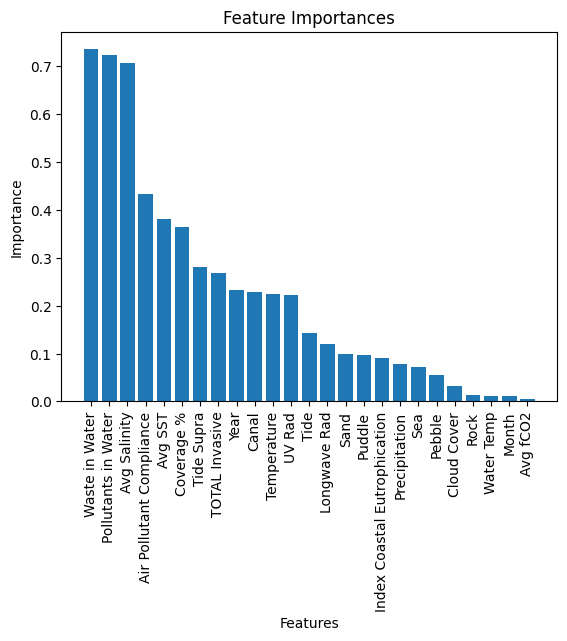

In [ ]:
# Split the dataset into features (X) and target (y)
X = sessil_sca.drop('TOTAL2', axis=1)
y = sessil_sca['TOTAL2']

# Create a linear regression model
lr = LinearRegression()

# Use RFE to select the optimal number of features
final_score = 0
n_F = 0
for i in range(1, X.shape[1]+1):
    rfe = RFE(estimator=lr, n_features_to_select=i)
    X_rfe = rfe.fit_transform(X, y) 
    lr.fit(X_rfe, y)
    score = lr.score(X_rfe, y)
    if score > final_score:
        final_score = score
        n_F = i
        best_rfe = rfe

# Get the selected feature indices
selected_features = best_rfe.support_

# Get the feature importances
importances = abs(lr.coef_)

# Get the indices of the top n_F features by importance
top_n_F = importances.argsort()[-n_F:][::-1]

# Print the optimal number of features and their names
print("Optimal number of features: %d" % n_F)
print("Selected features by RFE: ", X.columns[selected_features].tolist())
print("Selected features by importance: ", X.columns[top_n_F].tolist())

# Plot the feature importances
plt.bar(X.columns[top_n_F], importances[top_n_F])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

We identified the following variables as important features:['Pollutants in Water', 'Waste in Water', 'Avg Salinity', 'Avg SST', 'Coverage %', 'Air Pollutant Compliance', 'Tide Supra', 'TOTAL Invasive', 'Canal','Year', 'Month']

#####3.2.3 Decision Tree Regressor

In [ ]:
# Create a decision tree regressor model
tree = DecisionTreeRegressor()

# Fit the decision tree regressor model to the dataset
tree.fit(X, y)

# Get the feature importances from the trained model
feature_importances = tree.feature_importances_

# Set a cutoff for selecting the top 5 features based on their importance scores
cutoff = 0.05

# Get the indices of the selected features based on their importance scores
selected_feature_indices = feature_importances >= cutoff

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices].tolist()

# Print the selected feature names
print('Selected features: ', selected_feature_names)

Selected features:  ['Coverage %', 'TOTAL Invasive', 'Waste in Water', 'Avg Salinity']


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


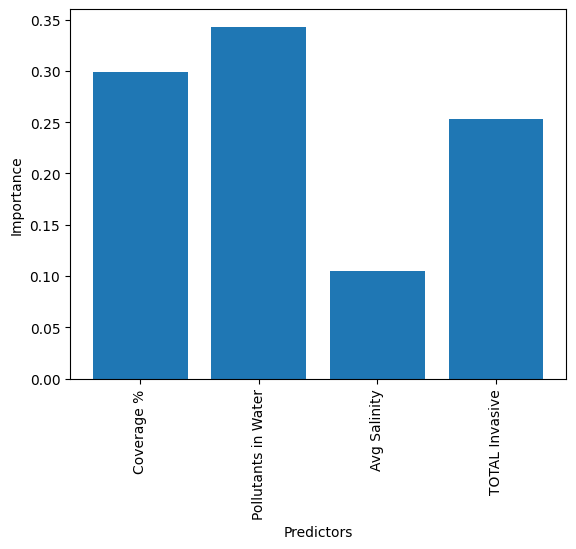

In [ ]:
# Create a barplot with the selected variables
predictors = ['Coverage %', 'Pollutants in Water', 'Avg Salinity', 'TOTAL Invasive'] # we removed 'Month', 'Year' from the graph
target = ['TOTAL2']

# Split the dataset into features (X) and target (y)
X = sessil[predictors]
y = sessil[target]

# Create a random forest regressor model
model = RandomForestRegressor()

# Fit model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create bar plot
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.bar(predictors, importances)
ax.set_xlabel("Predictors")
ax.set_ylabel("Importance")
plt.show()

Evaluate the performance beetween the feature selection methods using the following methods:

Score and accuracy Visualization

#####3.2.4 Performance with ANOVA

In [ ]:
# load the original dataset
print(sessil_sca.head(3))

# load the feature selected dataset using ANOVA 
sessil_sca_fs1= sessil_sca.loc[:,['Year','Month', 'Tide Supra', 'Coverage %', 'Pollutants in Water', 'Waste in Water', 'Avg fCO2','Avg SST', 'TOTAL2', 'TOTAL Invasive']]
print(sessil_sca_fs1.head(3))

   Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1     11  2011  0.35         0.5        0.23     0.0   1.0   0.0     0.0   
2     12  2011  0.58         0.5        0.23     0.0   0.0   0.0     0.0   
3      1  2012  0.29         0.5        0.23     0.0   1.0   0.0     0.0   

   Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1    0.0  ...          0.4           0.4     0.1   
2    0.0  ...          1.0           0.5     0.0   
3    0.0  ...          0.9           0.4     0.0   

   Index Coastal Eutrophication  Air Pollutant Compliance  \
1                          0.01                      0.98   
2                          0.03                      0.98   
3                          0.02                      0.88   

   Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                 1.00            0.01      0.28     0.55          1.00  
2                 1.00            0.01      0.28     0.55          1.00  
3                 0

In [ ]:
# split our 2 datasets into train and test
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    sessil_sca.drop('TOTAL2', axis=1),sessil_sca['TOTAL2'], test_size=0.2, random_state=123)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(
    sessil_sca_fs1.drop('TOTAL2', axis=1), sessil_sca_fs1['TOTAL2'], test_size=0.2, random_state=123)

In [ ]:
# train random forest regressor on original dataset
rf_orig = RandomForestRegressor(n_estimators=100, random_state=123)
rf_orig.fit(X_orig_train, y_orig_train)

RandomForestRegressor(random_state=123)

In [ ]:
# train random forest regressor on reduced feature dataset
rf_fs = RandomForestRegressor(n_estimators=100, random_state=123)
rf_fs.fit(X_fs_train, y_fs_train)

RandomForestRegressor(random_state=123)

In [ ]:
# evaluate performance on test set
y_orig_pred = rf_orig.predict(X_orig_test)
y_fs_pred = rf_fs.predict(X_fs_test)

mae_orig = mean_absolute_error(y_orig_test, y_orig_pred)
mae_fs = mean_absolute_error(y_fs_test, y_fs_pred)

mse_orig = mean_squared_error(y_orig_test, y_orig_pred)
mse_fs = mean_squared_error(y_fs_test, y_fs_pred)

r2_orig = r2_score(y_orig_test, y_orig_pred)
r2_fs = r2_score(y_fs_test, y_fs_pred)

print("Original dataset performance:")
print("MAE:", mae_orig)
print("MSE:", mse_orig)
print("R-squared:", r2_orig)
print("--------------------------------------")
print("Reduced feature dataset performance:")
print("MAE:", mae_fs)
print("MSE:", mse_fs)
print("R-squared:", r2_fs)

Original dataset performance:
MAE: 0.08896363636363626
MSE: 0.015371037272727239
R-squared: 0.7622901296933567
--------------------------------------
Reduced feature dataset performance:
MAE: 0.08089545454545444
MSE: 0.012975659545454515
R-squared: 0.7993341442762707


#####3.2.5 Performance with RFE

In [ ]:
# load the original dataset
print(sessil_sca.head(3))

# load the feature selected dataset using RFE 
sessil_sca_fs2= sessil_sca.loc[:,['Pollutants in Water', 'Waste in Water', 'Avg Salinity', 'Avg SST', 'Coverage %', 'Air Pollutant Compliance','Tide Supra', 'Canal','Year', 'Month','TOTAL2', 'TOTAL Invasive']]
print(sessil_sca_fs2.head(3))

   Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1     11  2011  0.35         0.5        0.23     0.0   1.0   0.0     0.0   
2     12  2011  0.58         0.5        0.23     0.0   0.0   0.0     0.0   
3      1  2012  0.29         0.5        0.23     0.0   1.0   0.0     0.0   

   Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1    0.0  ...          0.4           0.4     0.1   
2    0.0  ...          1.0           0.5     0.0   
3    0.0  ...          0.9           0.4     0.0   

   Index Coastal Eutrophication  Air Pollutant Compliance  \
1                          0.01                      0.98   
2                          0.03                      0.98   
3                          0.02                      0.88   

   Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                 1.00            0.01      0.28     0.55          1.00  
2                 1.00            0.01      0.28     0.55          1.00  
3                 0

In [ ]:
# split our 2 datasets into train and test
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    sessil_sca.drop('TOTAL2', axis=1), sessil_sca['TOTAL2'], test_size=0.2, random_state=123)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(
    sessil_sca_fs2.drop('TOTAL2', axis=1), sessil_sca_fs2['TOTAL2'], test_size=0.2, random_state=123)

In [ ]:
# train random forest regressor on original dataset
rf_orig = RandomForestRegressor(n_estimators=100, random_state=123)
rf_orig.fit(X_orig_train, y_orig_train)

RandomForestRegressor(random_state=123)

In [ ]:
# train random forest regressor on reduced feature dataset
rf_fs = RandomForestRegressor(n_estimators=100, random_state=123)
rf_fs.fit(X_fs_train, y_fs_train)

RandomForestRegressor(random_state=123)

In [ ]:
# evaluate performance on test set
y_orig_pred = rf_orig.predict(X_orig_test)
y_fs_pred = rf_fs.predict(X_fs_test)

mae_orig = mean_absolute_error(y_orig_test, y_orig_pred)
mae_fs = mean_absolute_error(y_fs_test, y_fs_pred)

mse_orig = mean_squared_error(y_orig_test, y_orig_pred)
mse_fs = mean_squared_error(y_fs_test, y_fs_pred)

r2_orig = r2_score(y_orig_test, y_orig_pred)
r2_fs = r2_score(y_fs_test, y_fs_pred)

print("Original dataset performance:")
print("MAE:", mae_orig)
print("MSE:", mse_orig)
print("R-squared:", r2_orig)
print("--------------------------------------")
print("Reduced feature dataset performance:")
print("MAE:", mae_fs)
print("MSE:", mse_fs)
print("R-squared:", r2_fs)

Original dataset performance:
MAE: 0.08896363636363626
MSE: 0.015371037272727239
R-squared: 0.7622901296933567
--------------------------------------
Reduced feature dataset performance:
MAE: 0.08257272727272714
MSE: 0.013120082727272697
R-squared: 0.7971006700344128


#####3.2.6 Performance of Decision Tree

In [ ]:
# load the original dataset
print(sessil_sca.head(3))

# load the feature selected dataset using Decision Tree 
sessil_sca_fs3= sessil_sca.loc[:,['Coverage %', 'Pollutants in Water', 'Avg Salinity', 'Year', 'Month','TOTAL2', 'TOTAL Invasive']]
print(sessil_sca_fs3.head(3))

   Month  Year  Tide  Water Temp  Tide Supra  Pebble  Rock  Sand  Puddle  \
1     11  2011  0.35         0.5        0.23     0.0   1.0   0.0     0.0   
2     12  2011  0.58         0.5        0.23     0.0   0.0   0.0     0.0   
3      1  2012  0.29         0.5        0.23     0.0   1.0   0.0     0.0   

   Canal  ...  Cloud Cover  Longwave Rad  UV Rad  \
1    0.0  ...          0.4           0.4     0.1   
2    0.0  ...          1.0           0.5     0.0   
3    0.0  ...          0.9           0.4     0.0   

   Index Coastal Eutrophication  Air Pollutant Compliance  \
1                          0.01                      0.98   
2                          0.03                      0.98   
3                          0.02                      0.88   

   Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
1                 1.00            0.01      0.28     0.55          1.00  
2                 1.00            0.01      0.28     0.55          1.00  
3                 0

In [ ]:
# split our 2 datasets into train and test
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    sessil_sca.drop('TOTAL2', axis=1), sessil_sca['TOTAL2'], test_size=0.2, random_state=123)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(
    sessil_sca_fs3.drop('TOTAL2', axis=1), sessil_sca_fs3['TOTAL2'], test_size=0.2, random_state=123)

In [ ]:
# train random forest regressor on original dataset
rf_orig = RandomForestRegressor(n_estimators=100, random_state=123)
rf_orig.fit(X_orig_train, y_orig_train)

RandomForestRegressor(random_state=123)

In [ ]:
# train random forest regressor on reduced feature dataset
rf_fs = RandomForestRegressor(n_estimators=100, random_state=123)
rf_fs.fit(X_fs_train, y_fs_train)

RandomForestRegressor(random_state=123)

In [ ]:
# evaluate performance on test set
y_orig_pred = rf_orig.predict(X_orig_test)
y_fs_pred = rf_fs.predict(X_fs_test)

mae_orig = mean_absolute_error(y_orig_test, y_orig_pred)
mae_fs = mean_absolute_error(y_fs_test, y_fs_pred)

mse_orig = mean_squared_error(y_orig_test, y_orig_pred)
mse_fs = mean_squared_error(y_fs_test, y_fs_pred)

r2_orig = r2_score(y_orig_test, y_orig_pred)
r2_fs = r2_score(y_fs_test, y_fs_pred)

print("Original dataset performance:")
print("MAE:", mae_orig)
print("MSE:", mse_orig)
print("R-squared:", r2_orig)
print("--------------------------------------")
print("Reduced feature dataset performance:")
print("MAE:", mae_fs)
print("MSE:", mse_fs)
print("R-squared:", r2_fs)

Original dataset performance:
MAE: 0.08896363636363626
MSE: 0.015371037272727239
R-squared: 0.7622901296933567
--------------------------------------
Reduced feature dataset performance:
MAE: 0.08704999999999984
MSE: 0.013341331363636338
R-squared: 0.7936791062373594


##### 3.2.7 Comparing feature selection methods

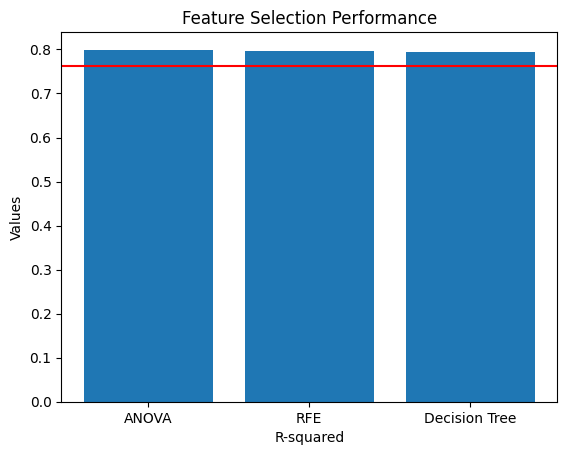

In [ ]:
# set the Y value for the horizontal bar
horizontal_bar_y = 0.7622901296933567

# create a list of metric values
metric_values = [0.7993341442762707, 0.7971006700344128, 0.7936791062373594]
 
#[0.7704552438100902,0.7572980812796162,0.7768767028044314]

# create a list of metric labels
metric_labels = ['ANOVA',"RFE","Decision Tree"]

# plot the metric values
plt.bar(metric_labels, metric_values)

# add the horizontal bar
plt.axhline(y=horizontal_bar_y, color='red')

# add labels and title
plt.xlabel('R-squared')
plt.ylabel('Values')
plt.title('Feature Selection Performance')

# display the plot
plt.show()

Based on these metrics, we can make the following observations:

- **MAE**: The Anova dataset has the lowest MAE (0.0809), then the RFE dataset (0.0826), the Tree dataset has (0.0870), and the Original dataset has the highest MAE (0.0890).

- **MSE**: The Anova dataset also has the lowest MSE (0.0129), followed by the  RFE dataset (0.0131), the Tree dataset (0.0133), and the Original dataset (0.0154). Again, the Original dataset has the highest MSE.

- **R-squared**: The Anova dataset has the highest R-squared value (0.799), indicating the best fit to the data. The RFE dataset has the second-highest R-squared (0.797), followed by Tree dataset (0.793), and the Original dataset has the lowest R-squared (0.762).

> Based on these observations, it appears that the **Anova** dataset performs the best overall, as it has the lowest MAE and MSE values and the highest R-squared value.

> The RFE dataset also performs well, with slightly higher MAE and MSE values but a strong R-squared value. The Decision dataset performs slightly worse than the RFE dataset but still very close. Finally, the Original dataset performs the worst, with the highest MAE and MSE values and a negative R-squared value.



In [ ]:
sessil_anova = sessil_sca_fs1
sessil_rfe = sessil_sca_fs2
sessil_dt = sessil_sca_fs3

###4. Model Training

For the model training part, we will select the best features for each dataset, which are the follwowing:
- **mobil_sca**, we chose the Anova feature selection, so the df is now **mobil_anova**
- **sessil_sca**, we chose the Anova feature selection, so the df is now **sessil_anova**

####4.1 Dataset "mobil_sca"

##### Splitting into train and test data

In [ ]:
# creating the date columns
mobil_anova['Year'] = mobil_anova['Year'].astype(str)
mobil_anova['Month'] = mobil_anova['Month'].astype(str)

# create a timestamp column by combining the 'year' and 'month' columns
mobil_anova['Date'] = mobil_anova['Year'] + '-' + mobil_anova['Month']

# convert the 'date' column to datetime type
mobil_anova['Date'] = pd.to_datetime(mobil_anova['Date'], format='%Y-%m')

# set the 'date' column as the DataFrame index
mobil_anova = mobil_anova.set_index('Date').asfreq('MS')

# and set the year and month back to in
mobil_anova['Year'] = mobil_anova['Year'].astype(int)
mobil_anova['Month'] = mobil_anova['Month'].astype(int)

In [ ]:
# split train and test datasets
data = mobil_anova.loc[:, mobil_anova.columns != 'TOTAL']
target = mobil_anova['TOTAL']

X_train = data.loc['2011':'2019']
X_test = data.loc['2020']
y_train = target.loc['2011':'2019']
y_test = target.loc['2020']

##### ARIMA model

In [ ]:
# ARIMA model
arima_model = ARIMA(y_train, order=(1, 1, 1), freq='MS').fit()
arima_preds = arima_model.forecast(len(y_test))
arima_mae = mean_absolute_error(y_test, arima_preds)
arima_mse = mean_squared_error(y_test, arima_preds)
arima_rmse = np.sqrt(arima_mse)

In [ ]:
# train set
print('ARIMA MAE:', arima_mae)
print('ARIMA MSE:', arima_mse)
print('ARIMA RMSE:', arima_rmse)

ARIMA MAE: 0.06375308340306511
ARIMA MSE: 0.012624006932608805
ARIMA RMSE: 0.11235660609242701


##### SARIMAX model

In [ ]:
# in order to know what is the most adequate order and seasonal order
# we performed an automated model selection
model = auto_arima(y_train, exogenous=X_train, seasonal=True, m=12, trace=True)

# to then get the best model's parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-14.096, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-30.346, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-16.093, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-28.057, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-30.036, Time=0.98 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-29.536, Time=0.34 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-29.266, Time=0.18 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-28.067, Time=1.14 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-21.520, Time=0.26 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-41.337, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-43.184, Time=0.07 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=-41.278, Time=0.27 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AI

In [ ]:
# SARIMAX model
sarimax_model = SARIMAX(y_train, exog=X_train, order=best_order, seasonal_order=best_seasonal_order).fit(maxiter=1000)

# adjust the forecast to match the length of the test set
sarimax_preds = sarimax_model.forecast(steps=len(y_test), exog=X_test)

# calculate evaluation metrics
sarimax_mae = mean_absolute_error(y_test, sarimax_preds)
sarimax_mse = mean_squared_error(y_test, sarimax_preds)
sarimax_rmse = np.sqrt(mean_squared_error(y_test, sarimax_preds))

In [ ]:
# train set
print('SARIMAX MAE:', sarimax_mae)
print('SARIMAX MSE:', sarimax_mse)
print('SARIMAX RMSE:', sarimax_rmse)

SARIMAX MAE: 0.08063661887489838
SARIMAX MSE: 0.01137039449467085
SARIMAX RMSE: 0.10663205191062793


##### LSTM model

In [ ]:
# LSTM model
X_train_LSTM = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_LSTM = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# defining the model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# training the model 
lstm_model.fit(X_train_LSTM, y_train, epochs=100, batch_size=64, verbose=1)
lstm_preds = lstm_model.predict(X_test_LSTM)
lstm_preds = np.squeeze(lstm_preds)
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_rmse = mean_squared_error(y_test, lstm_preds, squared=False)

Epoch 1/100
2/2 [==============================] - 2s 14ms/step - loss: 0.0756
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0417
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0457
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0479
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0421
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0386
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0399
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0410
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0404
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0394
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0379
Epoch 12/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0374
Epoch 13/100
2/2 [==============================]

1/1 [==============================] - 0s 437ms/step


In [ ]:
'''X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
lstm_test_preds = lstm_model.predict(X_test)
lstm_test_preds = np.squeeze(lstm_test_preds)
lstm_test_mae = mean_absolute_error(y_test, lstm_test_preds)
lstm_test_mse = mean_squared_error(y_test, lstm_test_preds)
lstm_test_rmse = mean_squared_error(y_test, lstm_test_preds, squared=False)'''

'X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))\nlstm_test_preds = lstm_model.predict(X_test)\nlstm_test_preds = np.squeeze(lstm_test_preds)\nlstm_test_mae = mean_absolute_error(y_test, lstm_test_preds)\nlstm_test_mse = mean_squared_error(y_test, lstm_test_preds)\nlstm_test_rmse = mean_squared_error(y_test, lstm_test_preds, squared=False)'

In [ ]:
# train set
print('LSTM MAE:', lstm_mae)
print('LSTM MSE:', lstm_mse)
print('LSTM RMSE:', lstm_rmse)

LSTM MAE: 0.1016339185986329
LSTM MSE: 0.013854364398765978
LSTM RMSE: 0.11770456405240189


##### XGBoost

In [ ]:
# define the XGBoost model
model_XGB = xgb.XGBRegressor()

# fit the model to the training data
model_XGB.fit(X_train, y_train)

# make predictions on the test data
y_pred = model_XGB.predict(X_test)

# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print("XGBoost MAE:", mae)
print("XGBoost MSE:", mse)
print("XGBoost RMSE:", rmse)

XGBoost MAE: 0.03704912291395224
XGBoost MSE: 0.004171537840463945
XGBoost RMSE: 0.06458744336528537


####4.2 Dataset "sessil_sca"

##### Splitting into train and test data

In [ ]:
# creating the date columns
sessil_anova['Year'] = sessil_anova['Year'].astype(str)
sessil_anova['Month'] = sessil_anova['Month'].astype(str)

# create a timestamp column by combining the 'year' and 'month' columns
sessil_anova['Date'] = sessil_anova['Year'] + '-' + sessil_anova['Month']

# convert the 'date' column to datetime type
sessil_anova['Date'] = pd.to_datetime(sessil_anova['Date'], format='%Y-%m')

# set the 'date' column as the DataFrame index
sessil_anova = sessil_anova.set_index('Date').asfreq('MS')

# and set the year and month back to in
sessil_anova['Year'] = sessil_anova['Year'].astype(int)
sessil_anova['Month'] = sessil_anova['Month'].astype(int)

In [ ]:
# split train and test datasets
data = sessil_anova.loc[:, sessil_anova.columns != 'TOTAL2']
target = sessil_anova['TOTAL2']

X_train = data.loc['2011':'2019']
X_test = data.loc['2020']
y_train = target.loc['2011':'2019']
y_test = target.loc['2020']

##### ARIMA model

In [ ]:
# ARIMA model
arima_model = ARIMA(y_train, order=(1, 1, 1), freq='MS').fit()
arima_preds = arima_model.forecast(len(y_test))
arima_mae = mean_absolute_error(y_test, arima_preds)
arima_mse = mean_squared_error(y_test, arima_preds)
arima_rmse = np.sqrt(arima_mse)

In [ ]:
# train set
print('ARIMA MAE:', arima_mae)
print('ARIMA MSE:', arima_mse)
print('ARIMA RMSE:', arima_rmse)

ARIMA MAE: 0.12181916223687211
ARIMA MSE: 0.019061297344379766
ARIMA RMSE: 0.13806265731319156


##### SARIMAX model

In [ ]:
# in order to know what is the most adequate order and seasonal order
# we performed an automated model selection
model = auto_arima(y_train, exogenous=X_train, seasonal=True, m=12, trace=True)

# to then get the best model's parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-47.333, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-11.145, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-38.576, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-53.242, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-13.080, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-53.211, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-51.246, Time=1.35 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-51.261, Time=1.45 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-53.005, Time=0.44 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-50.585, Time=1.50 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-12.956, Time=0.12 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-51.250, Time=0.41 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-51.249, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-39.282, Time=0.20 sec
 ARIMA(1,1,2)(0,0,1)[12] intercep

In [ ]:
# SARIMAX model
sarimax_model = SARIMAX(y_train, exog=X_train, order=best_order, seasonal_order=best_seasonal_order).fit(maxiter=1000)

# adjust the forecast to match the length of the test set
sarimax_preds = sarimax_model.forecast(steps=len(y_test), exog=X_test)

# calculate evaluation metrics
sarimax_mae = mean_absolute_error(y_test, sarimax_preds)
sarimax_mse = mean_squared_error(y_test, sarimax_preds)
sarimax_rmse = np.sqrt(mean_squared_error(y_test, sarimax_preds))

In [ ]:
# train set
print('SARIMAX MAE:', sarimax_mae)
print('SARIMAX MSE:', sarimax_mse)
print('SARIMAX RMSE:', sarimax_rmse)

SARIMAX MAE: 0.26745770031788296
SARIMAX MSE: 0.07903960530378087
SARIMAX RMSE: 0.28113983229663647


##### LSTM model

In [ ]:
# LSTM model
X_train_LSTM = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_LSTM = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# defining the model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# training the model 
lstm_model.fit(X_train_LSTM, y_train, epochs=100, batch_size=64, verbose=1)
lstm_preds = lstm_model.predict(X_test_LSTM)
lstm_preds = np.squeeze(lstm_preds)
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_rmse = mean_squared_error(y_test, lstm_preds, squared=False)

Epoch 1/100
2/2 [==============================] - 4s 21ms/step - loss: 0.1727
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0930
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0542
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0613
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0711
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0695
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0611
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0541
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0516
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0524
Epoch 11/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0541
Epoch 12/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0550
Epoch 13/100
2/2 [==============================]

1/1 [==============================] - 0s 478ms/step


In [ ]:
'''X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
lstm_test_preds = lstm_model.predict(X_test)
lstm_test_preds = np.squeeze(lstm_test_preds)
lstm_test_mae = mean_absolute_error(y_test, lstm_test_preds)
lstm_test_mse = mean_squared_error(y_test, lstm_test_preds)
lstm_test_rmse = mean_squared_error(y_test, lstm_test_preds, squared=False)'''

'X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))\nlstm_test_preds = lstm_model.predict(X_test)\nlstm_test_preds = np.squeeze(lstm_test_preds)\nlstm_test_mae = mean_absolute_error(y_test, lstm_test_preds)\nlstm_test_mse = mean_squared_error(y_test, lstm_test_preds)\nlstm_test_rmse = mean_squared_error(y_test, lstm_test_preds, squared=False)'

In [ ]:
# train set
print('LSTM MAE:', lstm_mae)
print('LSTM MSE:', lstm_mse)
print('LSTM RMSE:', lstm_rmse)

LSTM MAE: 0.1439719513871453
LSTM MSE: 0.031970778648085084
LSTM RMSE: 0.1788037433838707


##### XGBoost

In [ ]:
# define the XGBoost model
model_XGB = xgb.XGBRegressor()

# fit the model to the training data
model_XGB.fit(X_train, y_train)

# make predictions on the test data
y_pred = model_XGB.predict(X_test)

# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print("XGBoost MAE:", mae)
print("XGBoost MSE:", mse)
print("XGBoost RMSE:", rmse)

XGBoost MAE: 0.06849485782885247
XGBoost MSE: 0.007317788063239109
XGBoost RMSE: 0.08554407088301975


### Conclusion and Next steps

#####Conclusions Mobil

###### **MAE**
The scores printed are the MAE (Mean Absolute Error).

The MAE is expressed in the same units as the target variable. In this case, the target variable is the total number of species, which can vary from 10 to 200. Therefore, an MAE of 0.15 means that the average absolute difference between the predicted and actual number of species is around 15% of the range of the target variable.

Whether this is a good score or not depends on the specific problem and the domain. For example, if you're trying to predict the total number of species in an ecosystem, an MAE of 0.15 might be considered a good score, especially if it outperforms other baseline models. On the other hand, if you're trying to predict the total number of products sold by a company, an MAE of 0.15 might not be considered a good score, as it would correspond to a relatively large absolute error in dollar terms.

###### **MSE**
The mean squared error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance. In this case, since the MSE is around 0.06, it suggests that the models are doing a good job at predicting the total number of species in this ecosystem.

###### **RMSE**
The root mean squared error (RMSE) is the square root of the MSE and measures the average magnitude of the error in our predictions in the same units as the target variable. In this case, since the RMSE is around 0.24, it means that these predictions have an average error of about 0.24 in predicting the total number of species in the ecosystem.

#####Conclusions Sessil

###### **MAE**
The scores printed are the MAE (Mean Absolute Error).

The MAE is expressed in the same units as the target variable. In this case, the target variable is the total number of species, which can vary from 10 to 200. Therefore, an MAE of 0.15 means that the average absolute difference between the predicted and actual number of species is around 15% of the range of the target variable.

Whether this is a good score or not depends on the specific problem and the domain. For example, if you're trying to predict the total number of species in an ecosystem, an MAE of 0.15 might be considered a good score, especially if it outperforms other baseline models. On the other hand, if you're trying to predict the total number of products sold by a company, an MAE of 0.15 might not be considered a good score, as it would correspond to a relatively large absolute error in dollar terms.

###### **MSE**
The mean squared error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance. In this case, since the MSE is around 0.06, it suggests that the models are doing a good job at predicting the total number of species in this ecosystem.

###### **RMSE**
The root mean squared error (RMSE) is the square root of the MSE and measures the average magnitude of the error in our predictions in the same units as the target variable. In this case, since the RMSE is around 0.24, it means that these predictions have an average error of about 0.24 in predicting the total number of species in the ecosystem.

## 🖼️ Visualisations
Copy here the most important visualizations (graphs, charts, maps, images, etc). You can refer to them in the Executive Summary.

Technical note: If not all the visualisations are visible, you can still include them as an image or link - in this case please upload them to your own repository.

###Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

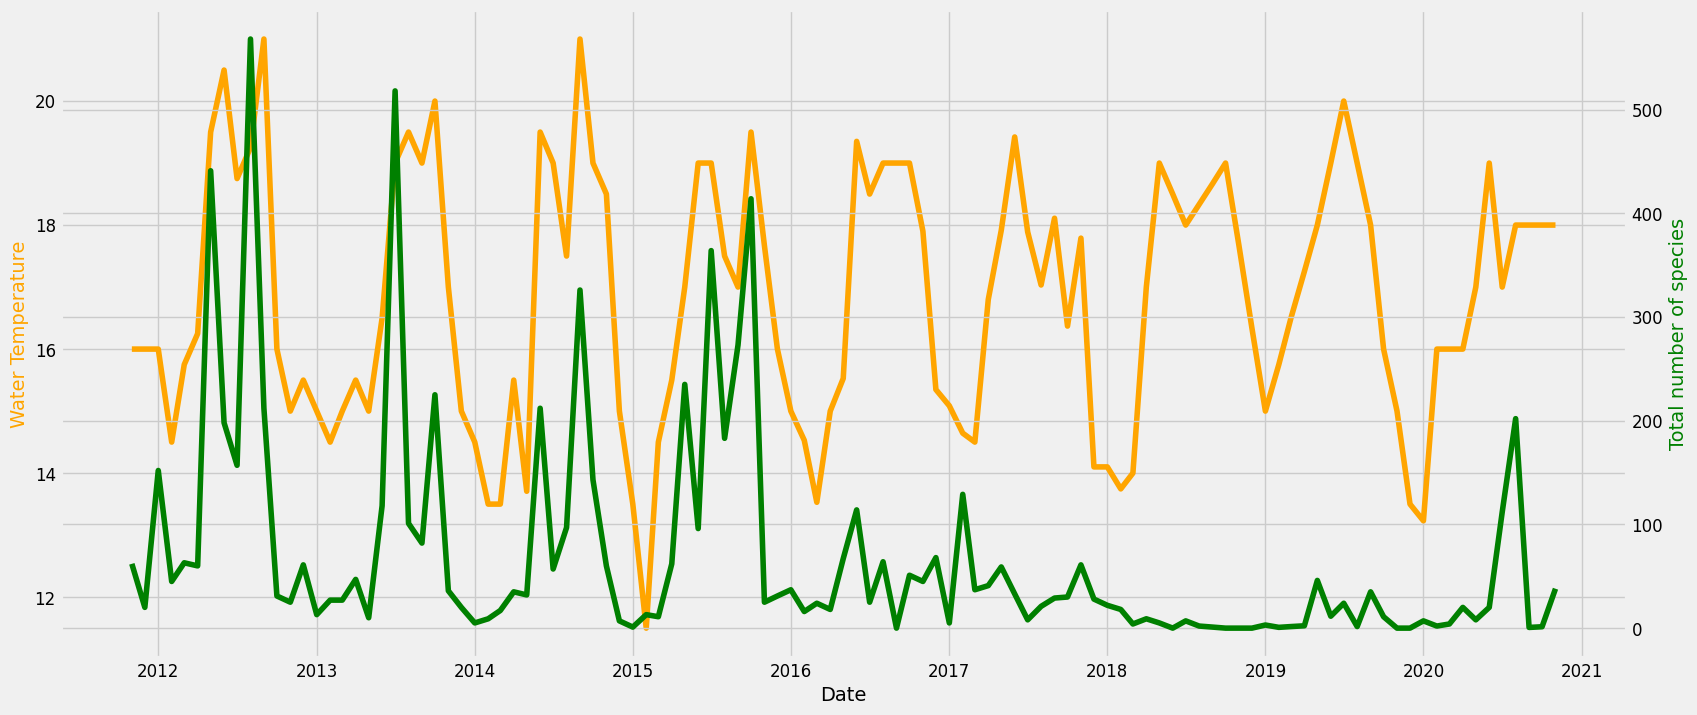

In [ ]:
mobil_grouped_visual = mobil.copy()
mobil_grouped_visual['date'] = pd.to_datetime(mobil_grouped_visual[['Year', 'Month']].assign(Day=1))

# Sort the data by date
mobil_grouped_visual = mobil_grouped_visual.sort_values('date')

# Create a line plot with date on the x-axis and Water Temp on the left y-axis
fig, ax1 = plt.subplots()
ax1.plot(mobil_grouped_visual['date'], mobil_grouped_visual['Water Temp'], color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Water Temperature', color='orange')

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the TOTA column on the right y-axis
ax2.plot(mobil_grouped_visual['date'], mobil_grouped_visual['TOTAL'], color='green')
ax2.set_ylabel('Total number of species', color='green')

# Show the plot
plt.show

In [ ]:
sessil_visual = sessil_sca.copy()
sessil_visual.columns

Index(['Month', 'Year', 'Tide', 'Water Temp', 'Tide Supra', 'Pebble', 'Rock',
       'Sand', 'Puddle', 'Canal', 'Sea', 'Coverage %', 'TOTAL2',
       'TOTAL Invasive', 'Temperature', 'Precipitation', 'Cloud Cover',
       'Longwave Rad', 'UV Rad', 'Index Coastal Eutrophication',
       'Air Pollutant Compliance', 'Pollutants in Water', 'Waste in Water',
       'Avg fCO2', 'Avg SST', 'Avg Salinity'],
      dtype='object')

In [ ]:
mobil_visual = mobil_sca.copy()
mobil_visual.columns

Index(['Month', 'Year', 'Tide', 'Water Temp', 'Tide Supra', 'Pebble', 'Rock',
       'Sand', 'Puddle', 'Canal', 'Sea', 'TOTAL', 'TOTAL Endangered',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity'],
      dtype='object')

In [ ]:
mobil_visual = mobil_visual.drop('UV Rad', axis=1)
mobil_visual = mobil_visual.drop('Longwave Rad', axis=1)
mobil_visual = mobil_visual.drop('Cloud Cover', axis=1)
mobil_visual = mobil_visual.drop('Precipitation', axis=1)
mobil_visual = mobil_visual.drop('Temperature', axis=1)
mobil_visual = mobil_visual.drop('Sea', axis=1)
mobil_visual = mobil_visual.drop('Canal', axis=1)
mobil_visual = mobil_visual.drop('Puddle', axis=1)
mobil_visual = mobil_visual.drop('Sand', axis=1)
mobil_visual = mobil_visual.drop('Rock', axis=1)
mobil_visual = mobil_visual.drop('Pebble', axis=1)
mobil_visual = mobil_visual.drop('Tide Supra', axis=1)
mobil_visual = mobil_visual.drop('Tide', axis=1)
mobil_visual = mobil_visual.drop('Air Pollutant Compliance', axis=1)
mobil_visual = mobil_visual.drop('Index Coastal Eutrophication', axis=1)
mobil_visual = mobil_visual.drop('Pollutants in Water', axis=1)
mobil_visual = mobil_visual.drop('Waste in Water', axis=1)
mobil_visual = mobil_visual.drop('Avg fCO2', axis=1)
mobil_visual = mobil_visual.drop('Avg SST', axis=1)
mobil_visual = mobil_visual.drop('Avg Salinity', axis=1)
mobil_visual = mobil_visual.drop('Water Temp', axis=1)

sessil_visual = sessil_visual.drop('Sea', axis=1)
sessil_visual = sessil_visual.drop('Canal', axis=1)
sessil_visual = sessil_visual.drop('Puddle', axis=1)
sessil_visual = sessil_visual.drop('Sand', axis=1)
sessil_visual = sessil_visual.drop('Rock', axis=1)
sessil_visual = sessil_visual.drop('Pebble', axis=1)
sessil_visual = sessil_visual.drop('Tide Supra', axis=1)

#mobil_visual = mobil_visual.rename(columns={'Water Temp': 'Water Temp Mobil'})

mobil_sessil = pd.merge(mobil_visual, sessil_visual, on=['Year', 'Month'])
mobil_sessil.columns

Index(['Month', 'Year', 'TOTAL', 'TOTAL Endangered', 'Tide', 'Water Temp',
       'Coverage %', 'TOTAL2', 'TOTAL Invasive', 'Temperature',
       'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity'],
      dtype='object')

In [ ]:
#mobil_sessil['Waste in Water'] /= 100000

In [ ]:
pd.set_option('display.max_columns', None)
mobil_sessil.head(3)

Month  Year  TOTAL  TOTAL Endangered  Tide  Water Temp  Coverage %  TOTAL2  \
0     11  2011   0.11              0.00  0.35         0.5        0.75    0.57   
1     12  2011   0.04              0.02  0.58         0.5        0.52    0.42   
2      1  2012   0.27              0.01  0.29         0.5        0.63    0.98   

   TOTAL Invasive  Temperature  Precipitation  Cloud Cover  Longwave Rad  \
0            0.46          0.3            0.0          0.4           0.4   
1            0.49          0.3            1.0          1.0           0.5   
2            0.62          0.2            0.5          0.9           0.4   

   UV Rad  Index Coastal Eutrophication  Air Pollutant Compliance  \
0     0.1                          0.01                      0.98   
1     0.0                          0.03                      0.98   
2     0.0                          0.02                      0.88   

   Pollutants in Water  Waste in Water  Avg fCO2  Avg SST  Avg Salinity  
0                 1.00            0.01      0.28     0.55          1.00  
1                 1.00            0.01      0.28     0.55          1.00  
2                 0.88            0.03      0.00     0.01          0.18

<function matplotlib.pyplot.show(close=None, block=None)>

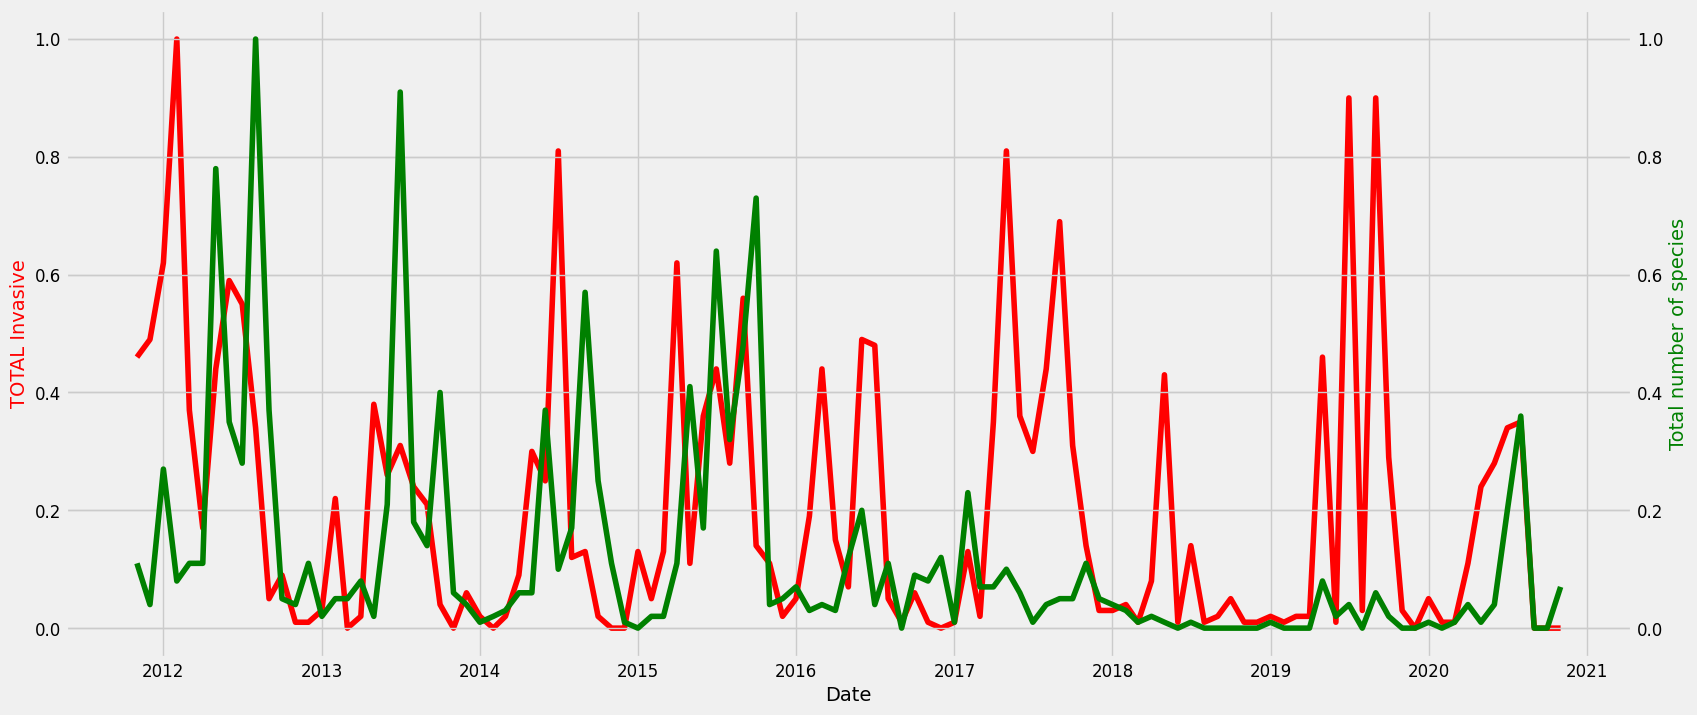

In [ ]:
mobil_sessil['date'] = pd.to_datetime(mobil_sessil[['Year', 'Month']].assign(Day=1))

# Sort the data by date
mobil_sessil = mobil_sessil.sort_values('date')

# Create a line plot with date on the x-axis and Water Temp on the left y-axis
fig, ax1 = plt.subplots()
ax1.plot(mobil_sessil['date'], mobil_sessil['TOTAL Invasive'], color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('TOTAL Invasive', color='red')

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the TOTA column on the right y-axis
ax2.plot(mobil_sessil['date'], mobil_sessil['TOTAL'], color='green')
ax2.set_ylabel('Total number of species', color='green')

# Show the plot
plt.show

Podemos concluir  que o que afastou as especies mobil de cascais nao foram as especies evasivas mas as especies evasivas nao foram afetadas pelo que afetou as mobil

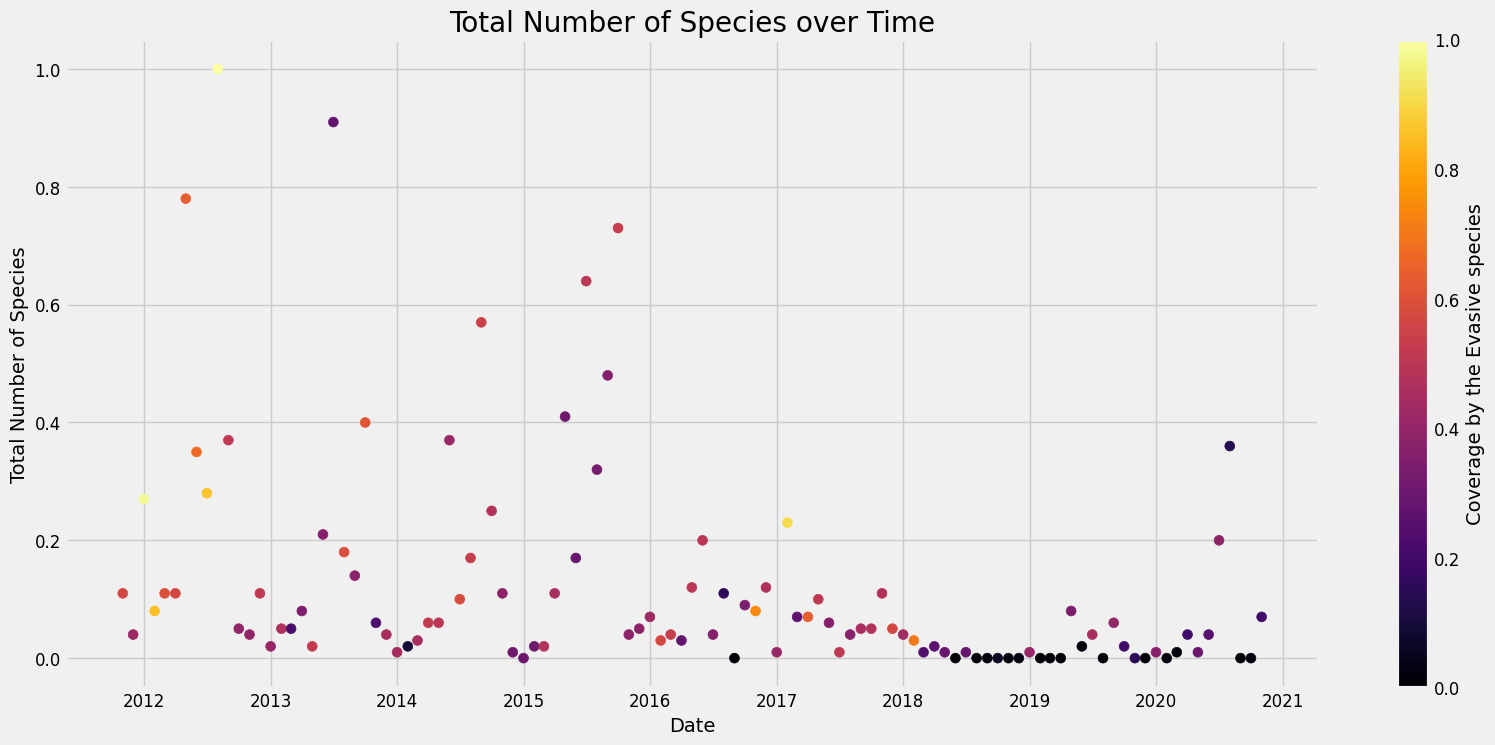

In [ ]:
# Create a scatter plot with date on the x-axis and TOTA on the y-axis
plt.scatter(mobil_sessil['date'], mobil_sessil['TOTAL'], c=mobil_sessil['TOTAL2'], cmap='inferno', s=50)
plt.xlabel('Date')
plt.ylabel('Total Number of Species')
plt.title('Total Number of Species over Time')

# Add a colorbar to show the mapping between TOTA values and colors
cbar = plt.colorbar()
cbar.set_label('Coverage by the Evasive species')

# Show the plot
plt.show()

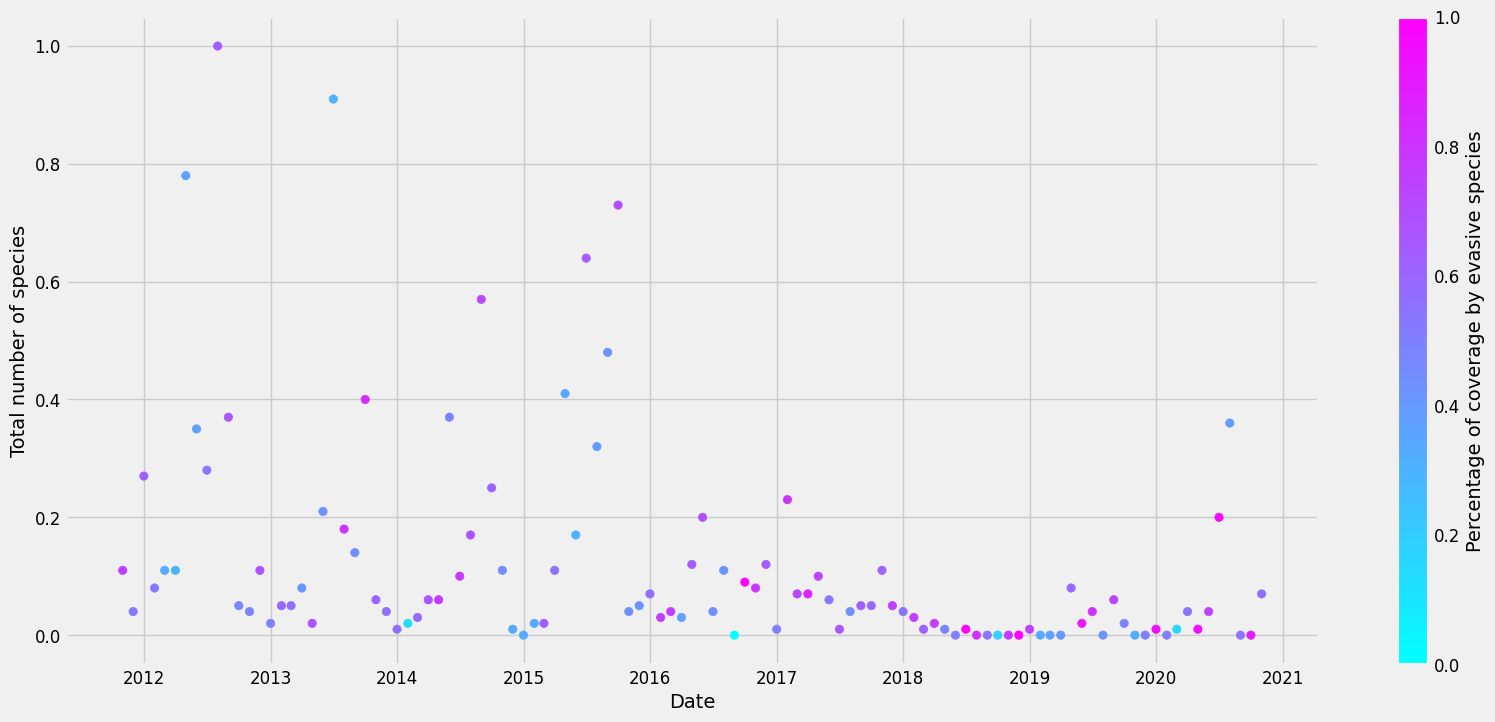

In [ ]:
plt.scatter(mobil_sessil['date'], mobil_sessil['TOTAL'], c=mobil_sessil['Coverage %'], cmap='cool')

# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Percentage of coverage by evasive species')

# Set the x-axis and y-axis labels
plt.ylabel('Total number of species')
plt.xlabel('Date')

# Display the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

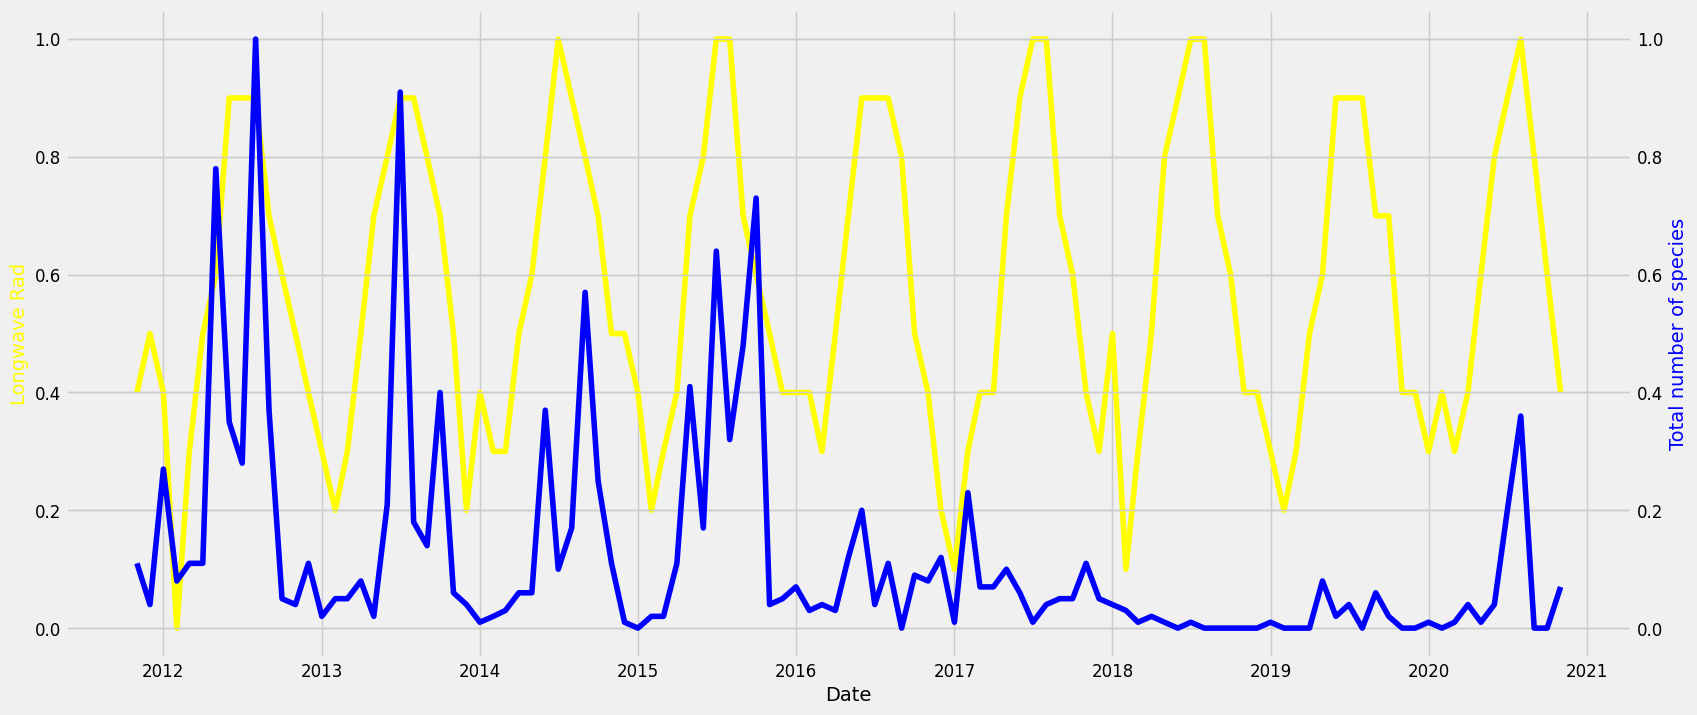

In [ ]:
# Create a line plot with date on the x-axis and Water Temp on the left y-axis
fig, ax1 = plt.subplots()
ax1.plot(mobil_sessil['date'], mobil_sessil['Longwave Rad'], color='yellow')
ax1.set_xlabel('Date')
ax1.set_ylabel('Longwave Rad', color='yellow')

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the TOTA column on the right y-axis
ax2.plot(mobil_sessil['date'], mobil_sessil['TOTAL'], color='blue')
ax2.set_ylabel('Total number of species', color='blue')

# Show the plot
plt.show

In [ ]:
mobil_sessil['TOTAL2'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0.57
1      0.42
2      0.98
3      0.85
4      0.60
       ... 
104    0.38
105    0.14
106    0.01
107    0.02
108    0.20
Name: TOTAL2, Length: 109, dtype: float64>

In [ ]:
['Year', 'Month', 'Water Temp Mobil', 'TOTAL', 'TOTAL Endangered',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL2', 'TOTAL Invasive',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad',
       'UV Rad']

['Year',
 'Month',
 'Water Temp Mobil',
 'TOTAL',
 'TOTAL Endangered',
 'Tide',
 'Water Temp',
 'Coverage %',
 'TOTAL2',
 'TOTAL Invasive',
 'Temperature',
 'Precipitation',
 'Cloud Cover',
 'Longwave Rad',
 'UV Rad']

In [ ]:
mobil_sessil.columns

Index(['Month', 'Year', 'TOTAL', 'TOTAL Endangered', 'Tide', 'Water Temp',
       'Coverage %', 'TOTAL2', 'TOTAL Invasive', 'Temperature',
       'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity', 'date'],
      dtype='object')

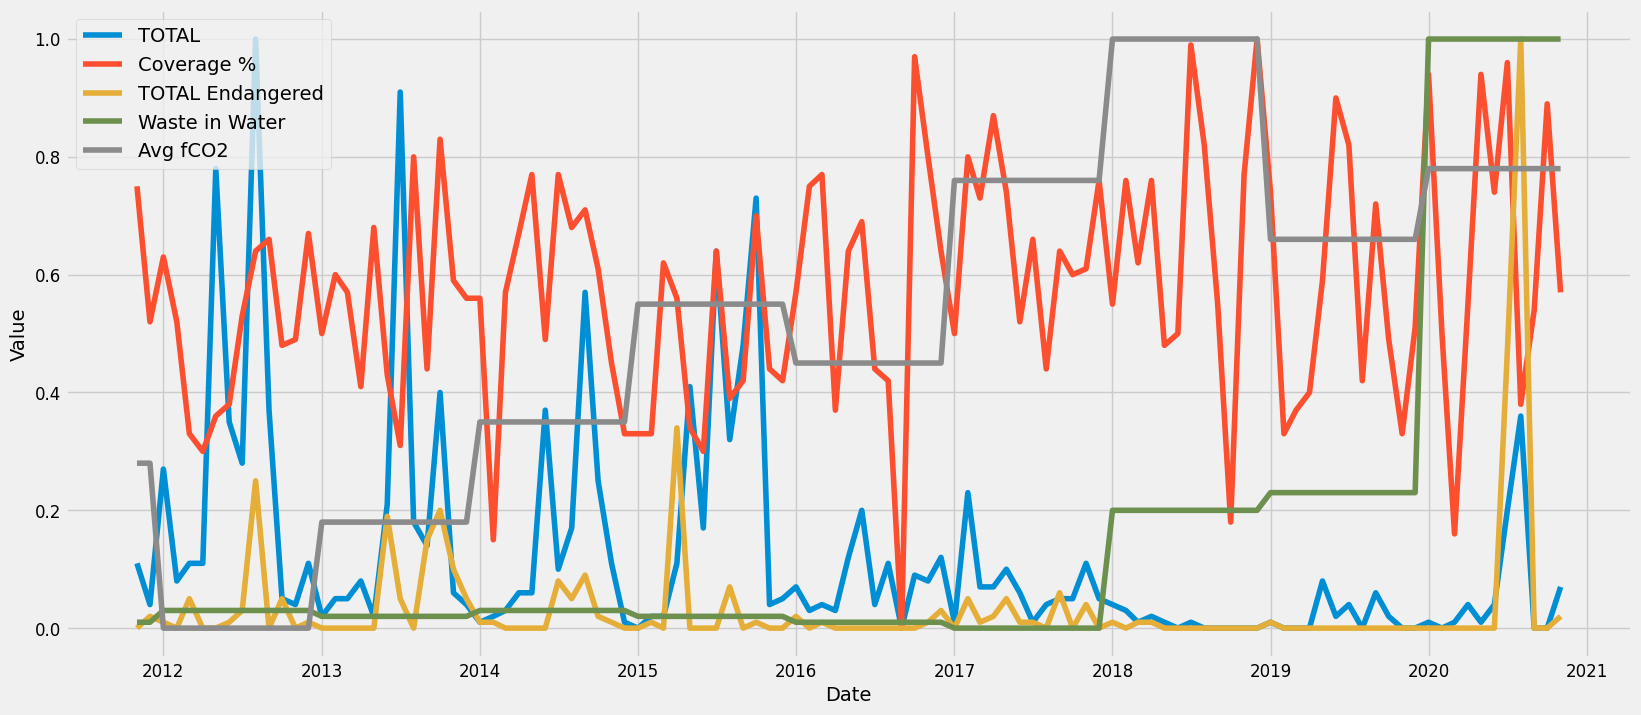

In [ ]:
mobil_sessil['date'] = pd.to_datetime(mobil_sessil['date'])

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate over each column you want to plot and plot the line
for column in ['TOTAL', 'Coverage %', 'TOTAL Endangered', 'Waste in Water', 'Avg fCO2']:
    ax.plot(mobil_sessil['date'], mobil_sessil[column], label=column)

# Set the x-axis and y-axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

### Shapely Values




In [ ]:
# creating the date columns
mobil_sessil['Year'] = mobil_sessil['Year'].astype(str)
mobil_sessil['Month'] = mobil_sessil['Month'].astype(str)

# create a timestamp column by combining the 'year' and 'month' columns
mobil_sessil['Date'] = mobil_sessil['Year'] + '-' + mobil_sessil['Month']

# convert the 'date' column to datetime type
mobil_sessil['Date'] = pd.to_datetime(mobil_sessil['Date'], format='%Y-%m')

# set the 'date' column as the DataFrame index
mobil_sessil = mobil_sessil.set_index('Date').asfreq('MS')

# and set the year and month back to in
mobil_sessil['Year'] = mobil_sessil['Year'].astype(int)
mobil_sessil['Month'] = mobil_sessil['Month'].astype(int)

In [ ]:
mobil_sessil.columns

Index(['Month', 'Year', 'TOTAL', 'TOTAL Endangered', 'Tide', 'Water Temp',
       'Coverage %', 'TOTAL2', 'TOTAL Invasive', 'Temperature',
       'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity', 'date'],
      dtype='object')

In [ ]:
# X_train
import scipy as sp
import xgboost

data = mobil_sessil.loc[:, mobil_sessil.columns != 'TOTAL Invasive']
target = mobil_sessil['TOTAL Invasive']

X_train = data.loc['2011':'2019']
X_test = data.loc['2020']
y_train = target.loc['2011':'2019']
y_test = target.loc['2020']

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

model_depth1 = xgboost.XGBRegressor(max_depth=1, learning_rate=0.01, subsample=0.5, n_estimators=10000, base_score=y_train.mean())
model_depth1.fit(X_train, y_train, eval_set=[(X_test,y_test)], eval_metric="logloss", verbose=1000, early_stopping_rounds=20)

[0]	validation_0-logloss:0.40354
[347]	validation_0-logloss:0.32119


XGBRegressor(base_score=0.21214285714285716, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
model_depth3 = xgboost.XGBRegressor(learning_rate=0.02, subsample=0.2, colsample_bytree=0.5, n_estimators=5000, base_score=y_train.mean())
model_depth3.fit(X_train, y_train, eval_set=[(X_test,y_test)], eval_metric="logloss", verbose=500, early_stopping_rounds=20)

[0]	validation_0-logloss:0.40566
[159]	validation_0-logloss:0.31784


XGBRegressor(base_score=0.21214285714285716, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

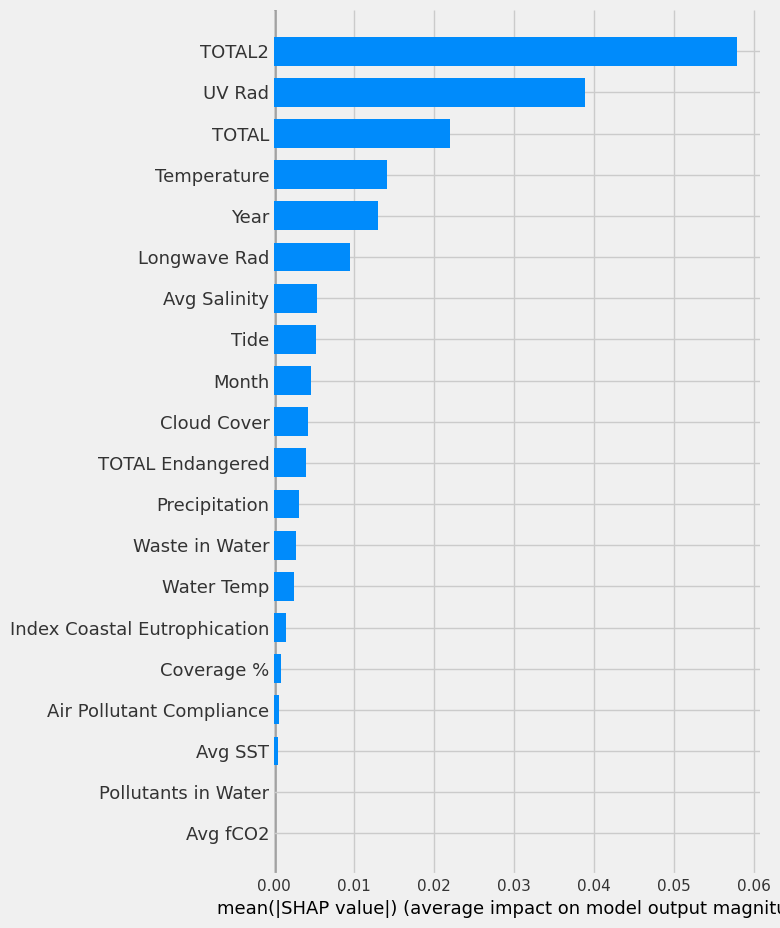

In [ ]:
shap_values = shap.TreeExplainer(model_depth1).shap_values(X_test)
shap_interaction_values = shap.TreeExplainer(model_depth1).shap_interaction_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

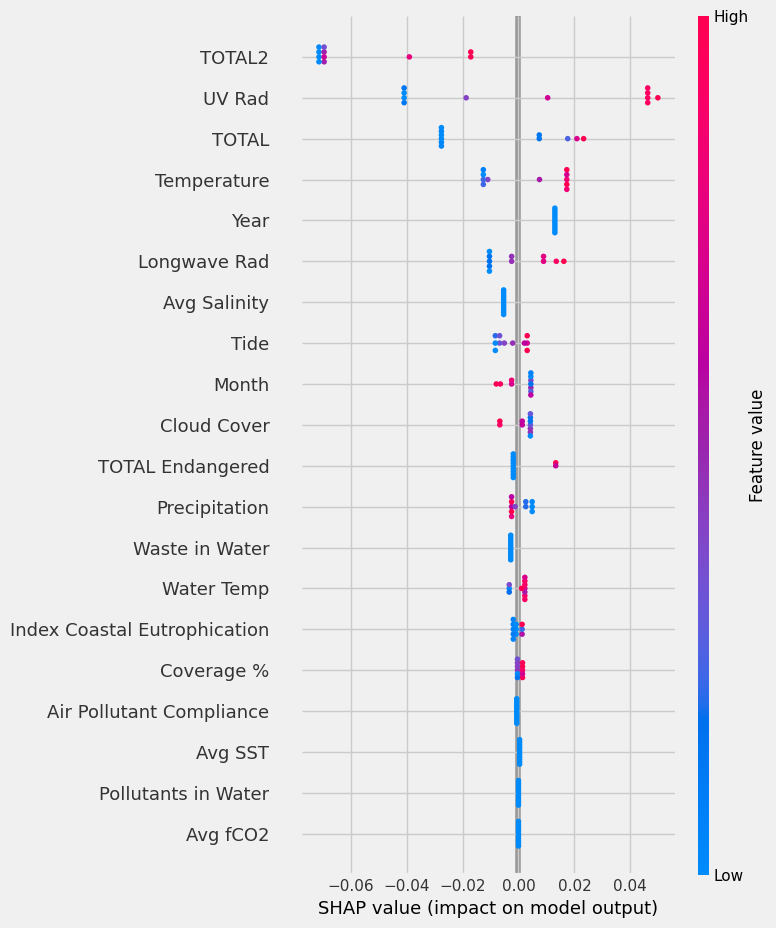

In [ ]:
shap.summary_plot(shap_values, X_test)

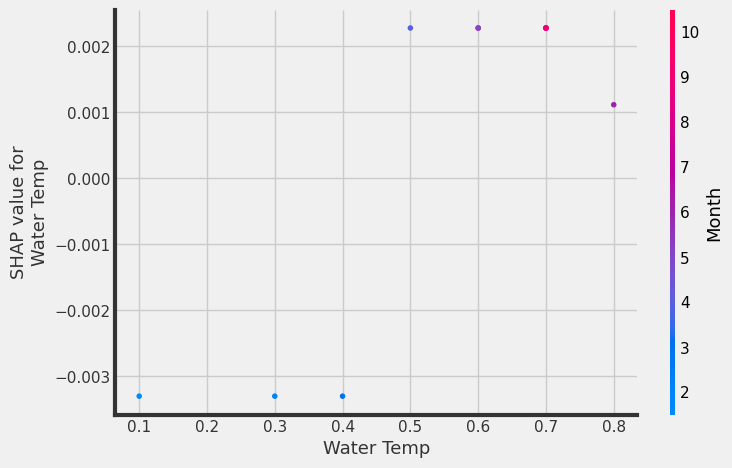

In [ ]:
shap.dependence_plot(5, shap_values, X_test)

In [ ]:
X_test.columns

Index(['Month', 'Year', 'TOTAL', 'TOTAL Endangered', 'Tide', 'Water Temp',
       'Coverage %', 'TOTAL2', 'Temperature', 'Precipitation', 'Cloud Cover',
       'Longwave Rad', 'UV Rad', 'Index Coastal Eutrophication',
       'Air Pollutant Compliance', 'Pollutants in Water', 'Waste in Water',
       'Avg fCO2', 'Avg SST', 'Avg Salinity'],
      dtype='object')

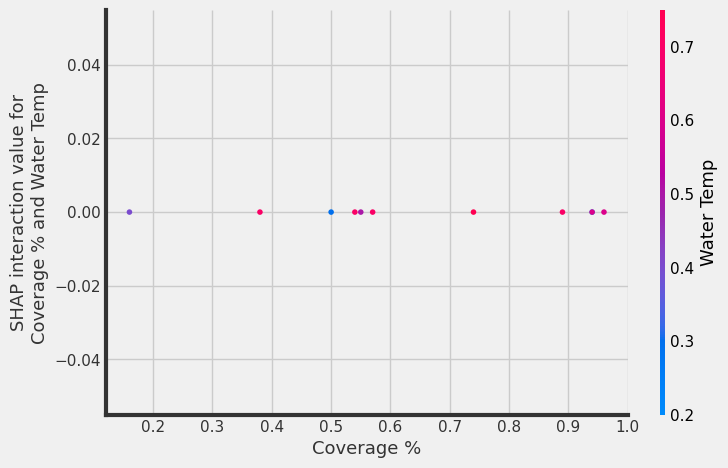

In [ ]:
shap.dependence_plot((6, 5), shap_interaction_values, X_test)

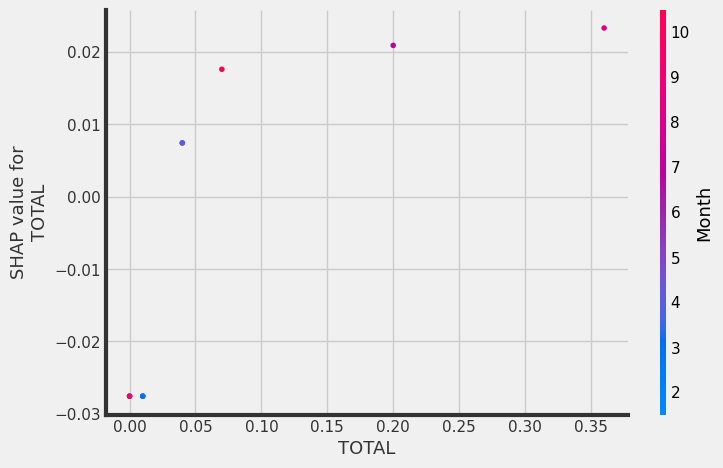

In [ ]:
# total mobil species by month
shap.dependence_plot(2 , shap_values, X_test)

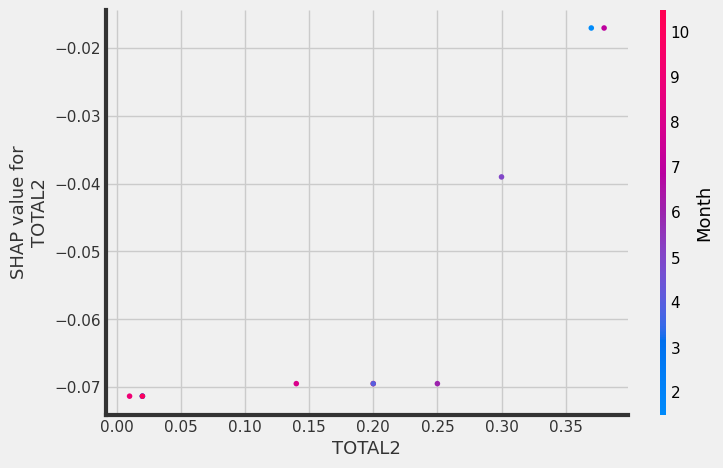

In [ ]:
# total sessil species by month
shap.dependence_plot((7, shap_values, X_test)

In [ ]:
X_test['Year'].value_counts

<bound method IndexOpsMixin.value_counts of 0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
Name: Year, dtype: int64>

###Time series analysis and forecasting




####Analysis

In [ ]:
mobil_sessil.columns

Index(['Month', 'Year', 'TOTAL', 'TOTAL Endangered', 'Tide', 'Water Temp',
       'Coverage %', 'TOTAL2', 'TOTAL Invasive', 'Temperature',
       'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity', 'date'],
      dtype='object')

In [ ]:
import warnings
import itertools

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
mobil_sessil.columns

Index(['Month', 'Year', 'TOTAL', 'TOTAL Endangered', 'Tide', 'Water Temp',
       'Coverage %', 'TOTAL2', 'TOTAL Invasive', 'Temperature',
       'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity', 'date'],
      dtype='object')

In [ ]:
Endangered = mobil_sessil.copy()
cols = ['Year', 'Month', 'Water Temp Mobil', 'TOTAL',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL2', 'TOTAL Invasive',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad']

cols2 = ['Year', 'Month', 'TOTAL',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL2', 'TOTAL Invasive',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity']
Endangered = Endangered.drop(cols2, axis=1)

Endangered = Endangered.groupby('date')['TOTAL Endangered'].sum().reset_index()
Endangered = Endangered.set_index('date')

y = Endangered['TOTAL Endangered'].resample('MS').mean()
#y['2016':'2016']

In [ ]:
#y.plot(figsize=(15, 6))
#plt.show()

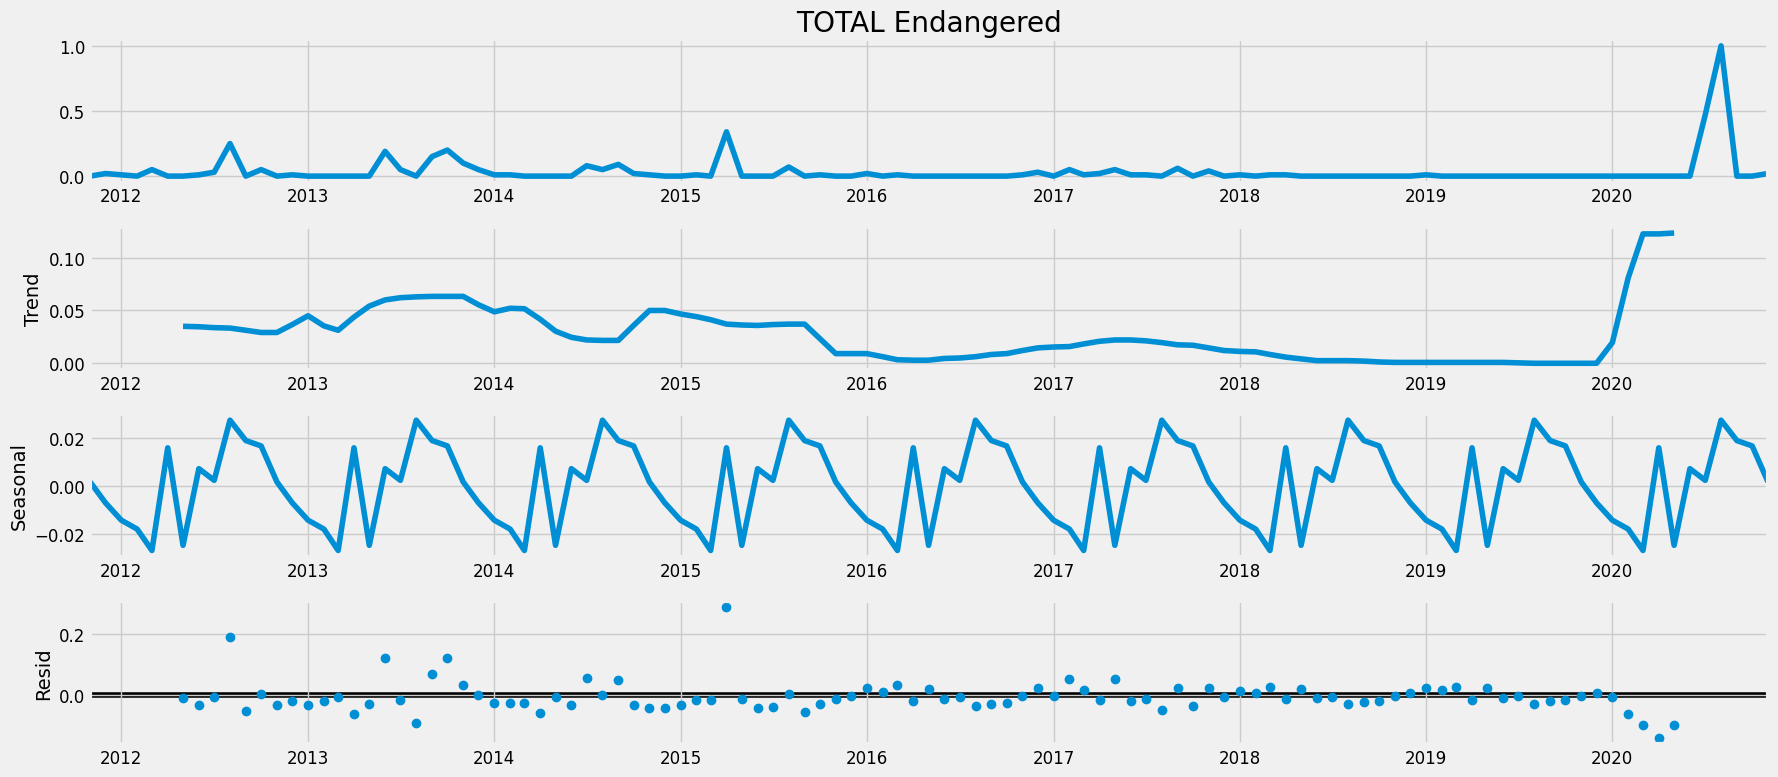

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

here we decompose our time series into three distinct components: trend, seasonality, and noise.
We can also see an obvious seasonality along with the overall regularity of the total
endangered species over the years with exceptions in some months.

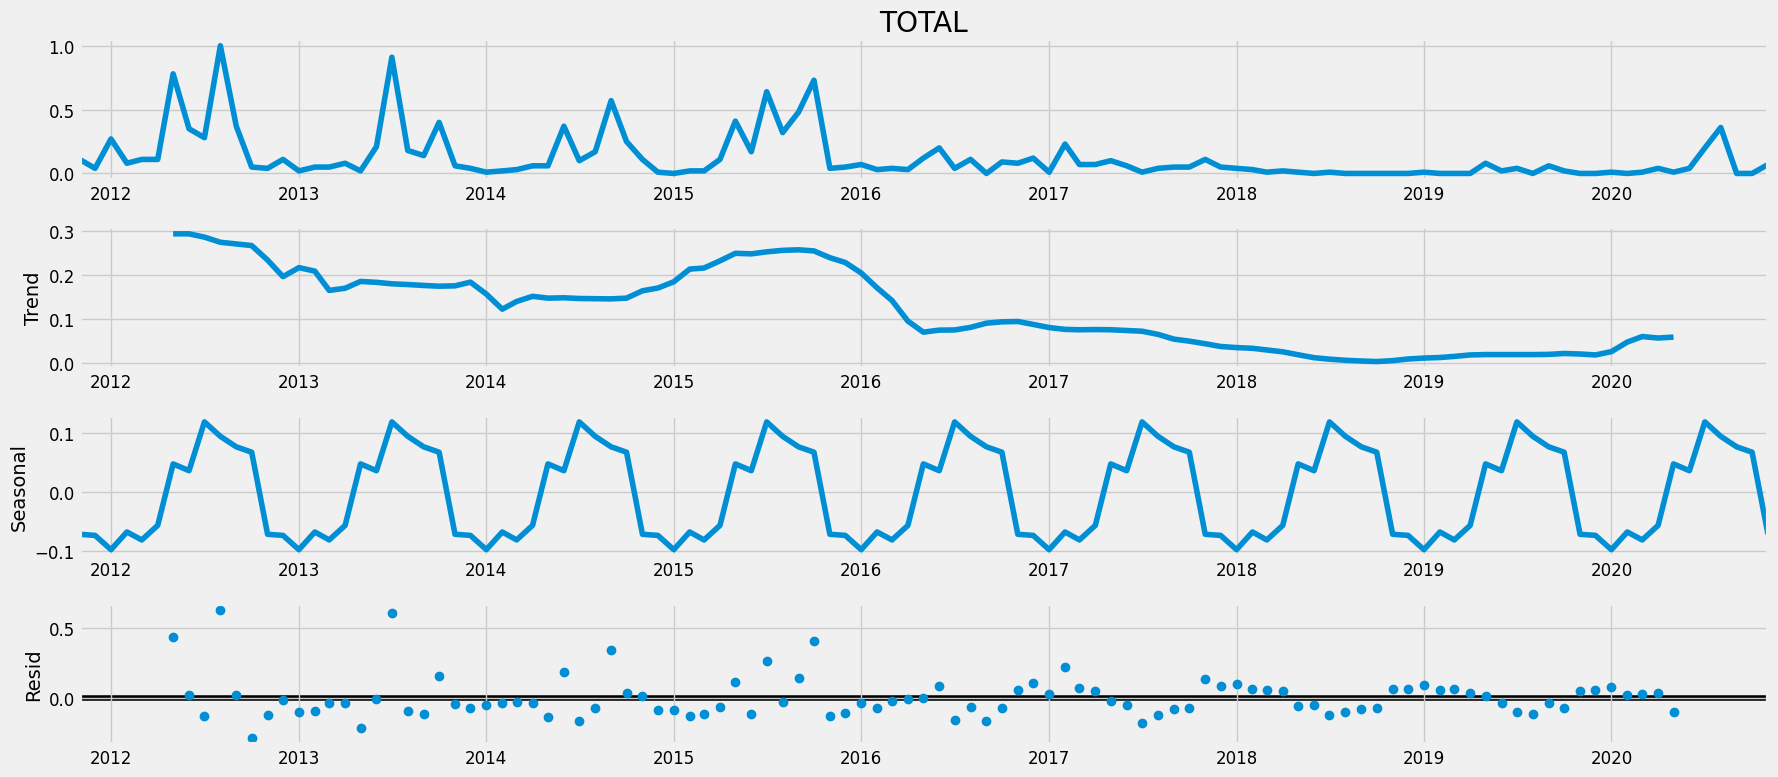

In [ ]:
TOTAL = mobil_sessil.copy()
cols = ['Year', 'Month', 'Water Temp Mobil', 'TOTAL Endangered',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL2', 'TOTAL Invasive',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad']

cols2 = ['Year', 'Month', 'TOTAL Endangered',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL2', 'TOTAL Invasive',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity']

TOTAL = TOTAL.drop(cols2, axis=1)

TOTAL = TOTAL.groupby('date')['TOTAL'].sum().reset_index()
TOTAL = TOTAL.set_index('date')

y = TOTAL['TOTAL'].resample('MS').mean()
#y['2016':'2016']

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Here we do the same process but with a different target, TOTAL of mobil.
We can also see an obvious seasonality and we can also confirm that since 2016 something happened because of the abrupte change in values, It went from having some peakes over the year to being more or less stable all the time.  

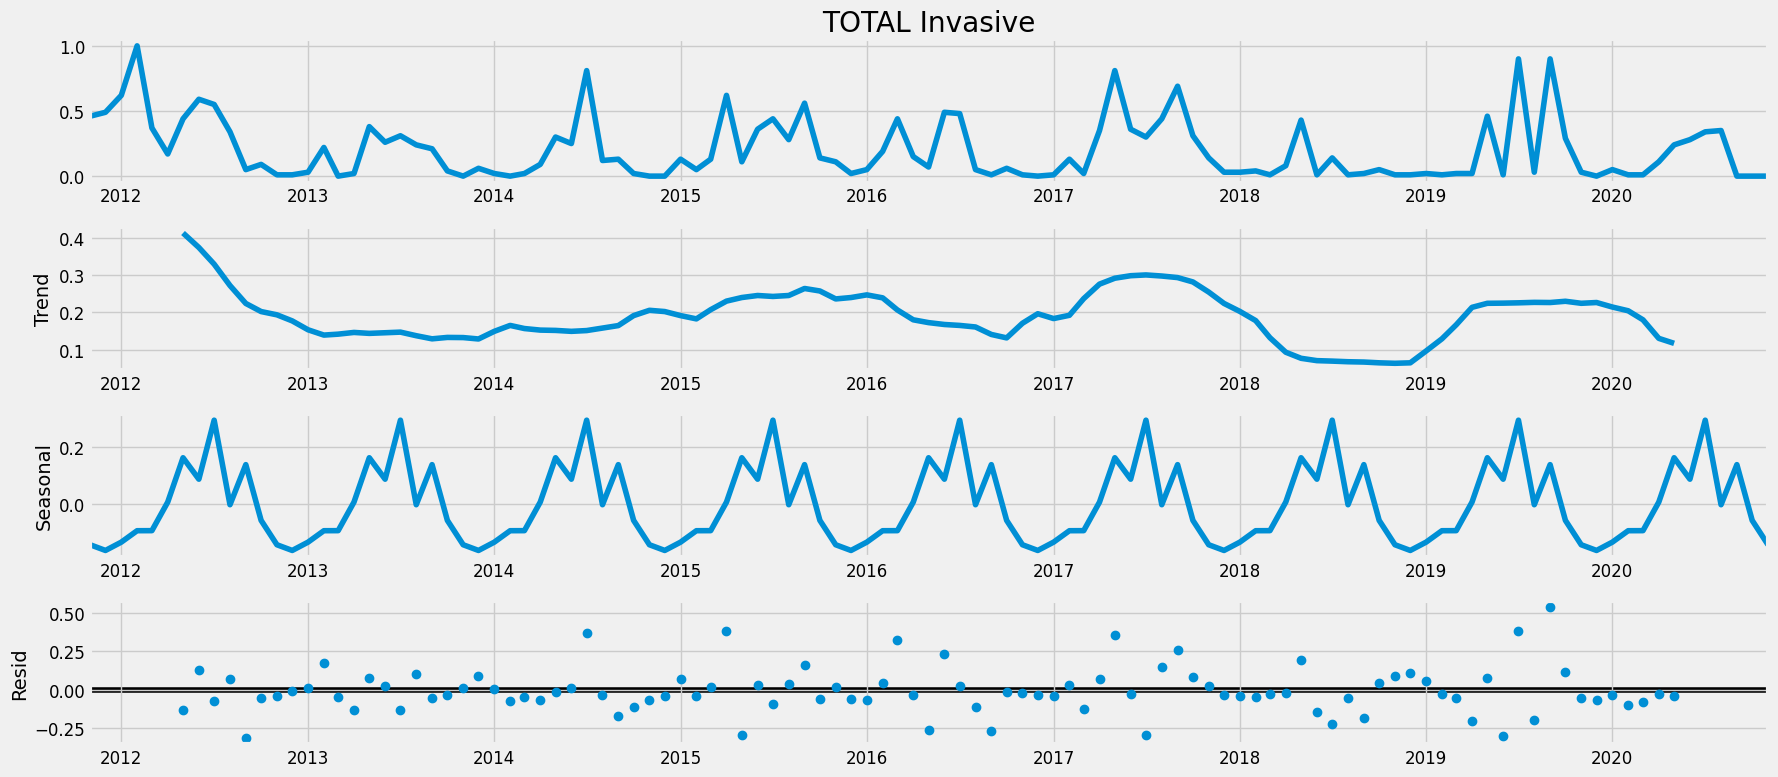

In [ ]:
Invasive = mobil_sessil.copy()
cols = ['Year', 'Month', 'Water Temp Mobil', 'TOTAL Endangered',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL2', 'TOTAL',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad']

cols2 = ['Year', 'Month', 'TOTAL Endangered',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL2', 'TOTAL',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity']

Invasive = Invasive.drop(cols2, axis=1)

Invasive = Invasive.groupby('date')['TOTAL Invasive'].sum().reset_index()
Invasive = Invasive.set_index('date')

y = Invasive['TOTAL Invasive'].resample('MS').mean()
#y['2016':'2016']

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Here we do the same process but with a different target, Invasive species.
We can also see an obvious seasonality and we also realised that they appear more or less at random over the year.

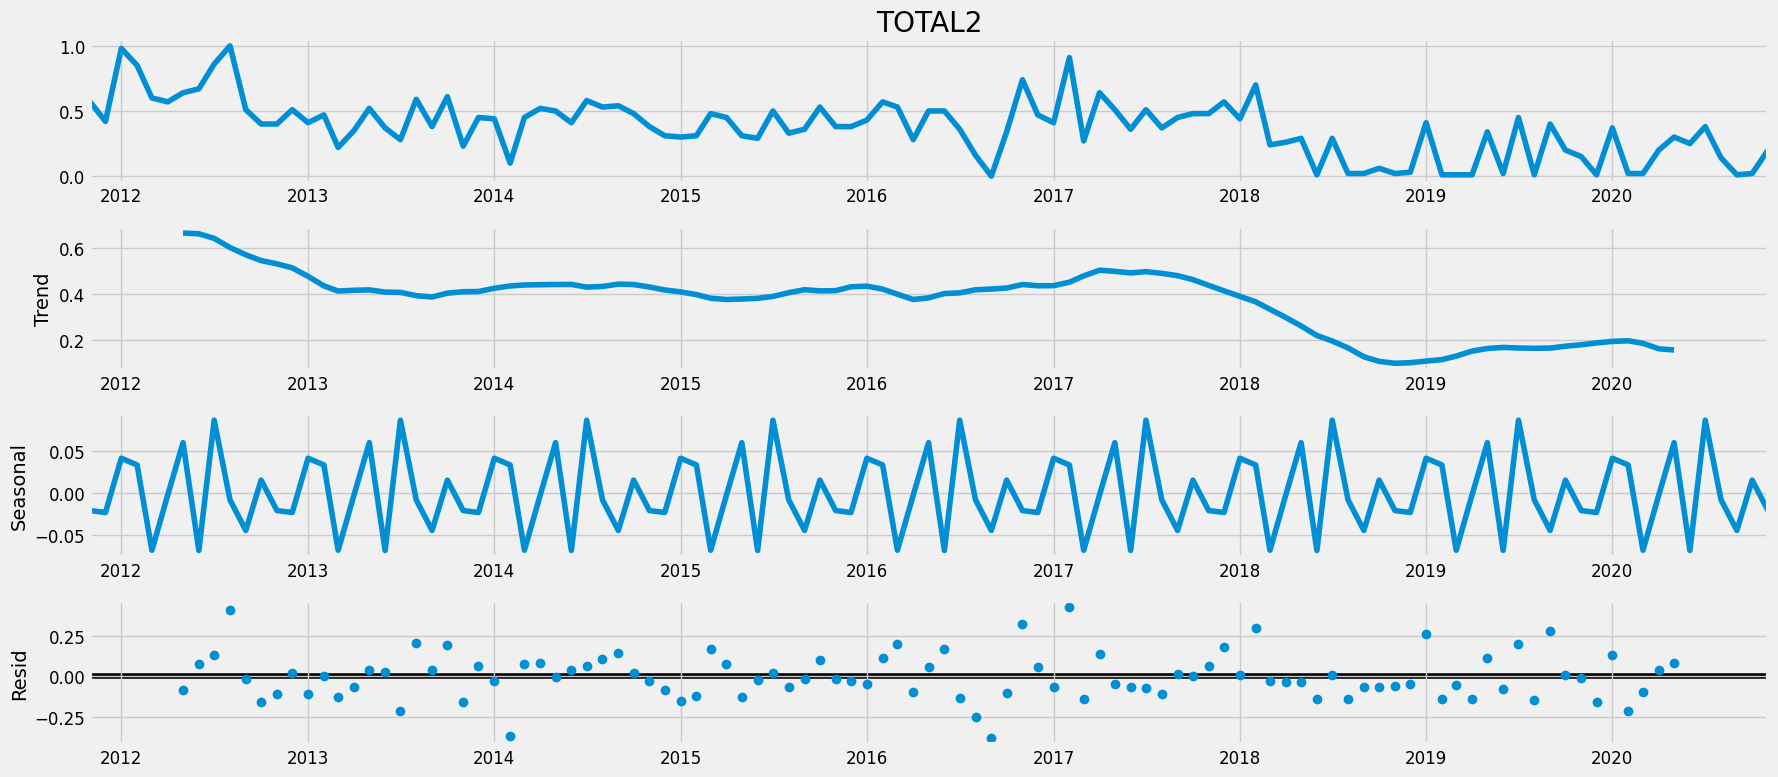

In [ ]:
TOTAL2 = mobil_sessil.copy()
cols = ['Year', 'Month', 'Water Temp Mobil', 'TOTAL Endangered',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL Invasive', 'TOTAL',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad']

cols2 = ['Year', 'Month', 'TOTAL Endangered',
       'Tide', 'Water Temp', 'Coverage %', 'TOTAL Invasive', 'TOTAL',
       'Temperature', 'Precipitation', 'Cloud Cover', 'Longwave Rad', 'UV Rad',
       'Index Coastal Eutrophication', 'Air Pollutant Compliance',
       'Pollutants in Water', 'Waste in Water', 'Avg fCO2', 'Avg SST',
       'Avg Salinity']

TOTAL2 = TOTAL2.drop(cols2, axis=1)

TOTAL2 = TOTAL2.groupby('date')['TOTAL2'].sum().reset_index()
TOTAL2 = TOTAL2.set_index('date')

y = TOTAL2['TOTAL2'].resample('MS').mean()
#y['2016':'2016']

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Here we do the same process but with a different target, total of sessil.
We can also see an obvious seasonality and we also realised that they appear more or less at random over the year but had a slight decrease in the past few years.

####Forecasting

In [ ]:
grafico = mobil_sessil.copy()
grafico = grafico.drop('date', axis=1)
endog = grafico['TOTAL']

In [ ]:
mod = sm.tsa.statespace.SARIMAX(endog,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

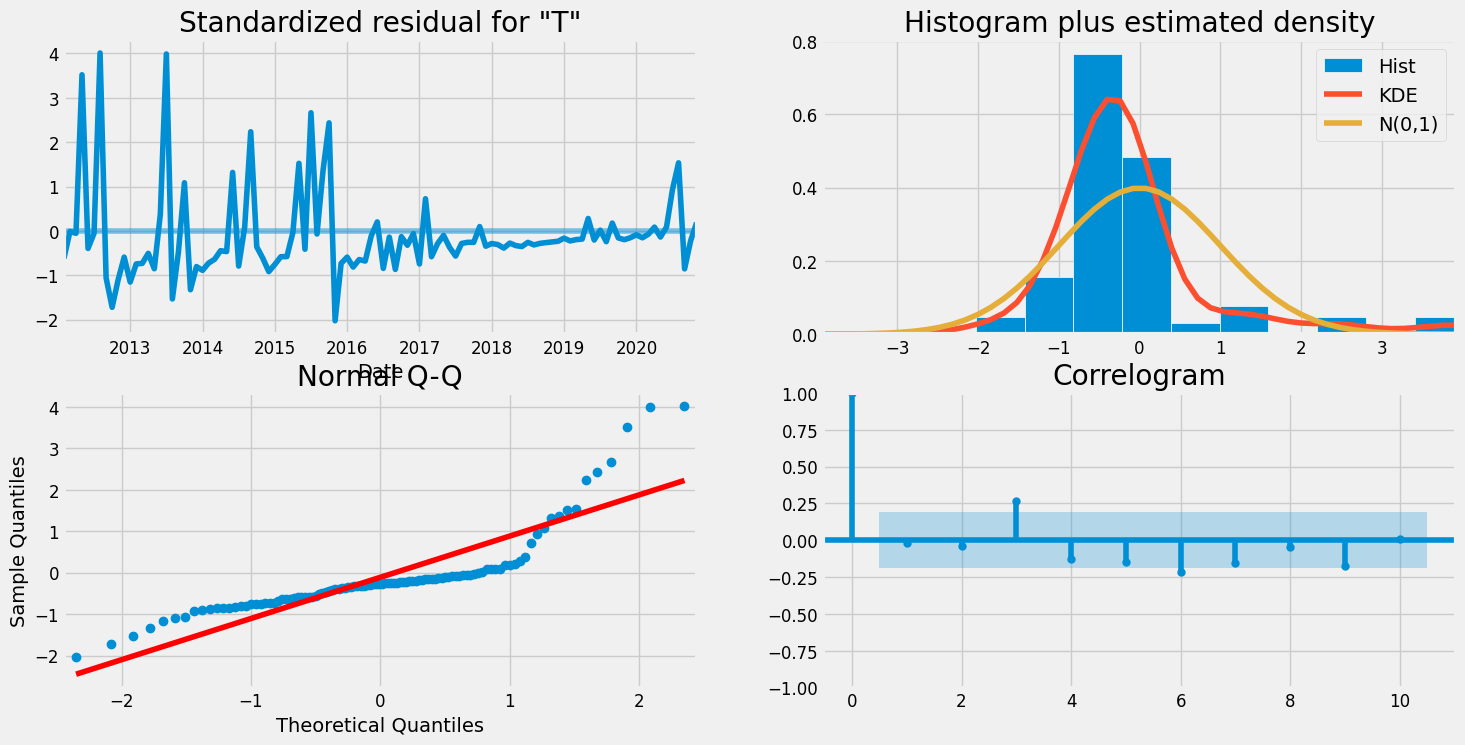

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

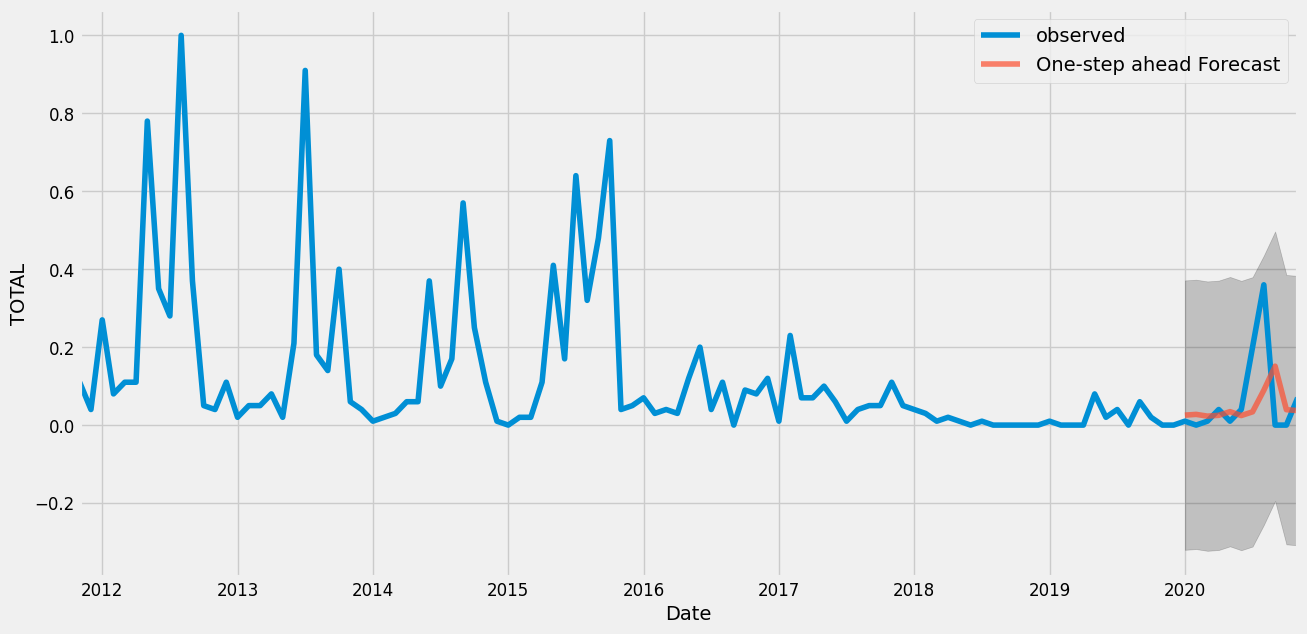

In [ ]:
y = grafico['TOTAL'].resample('MS').mean()

pred = results.get_prediction(start=pd.to_datetime('2020-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('TOTAL')
plt.legend()
plt.show()

## 👓 References
List all of the external links (even if they are already linked above), such as external datasets, papers, blog posts, code repositories and any other materials.

* [Fishing dataset](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOESpub_boui=506923022&PUBLICACOEStema=00&PUBLICACOESmodo=2)
* [Endangered Species Info](https://www.iucnredlist.org/)
* [Weather Conditions](https://www.meteoblue.com/en/weather/archive/export?daterange=2011-11-01%20-%202020-11-30&locations%5B%5D=basel_switzerland_2661604&domain=ERA5T&min=2011-10-31&max=2020-11-30&params%5B%5D=&params%5B%5D=temp2m&params%5B%5D=&params%5B%5D=&params%5B%5D=&params%5B%5D=&params%5B%5D=&params%5B%5D=&params%5B%5D=&utc_offset=0&timeResolution=daily&temperatureunit=CELSIUS&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric&degree_day_type=10%3B30&gddBase=10&gddLimit=30)
*[Index of Coastal Eutrophication](https://www.arcgis.com/apps/dashboards/9f3bca0205f74a31aa2133fbb818fd10)
*[Ecological Marine Unit Explorer](https://livingatlas.arcgis.com/emu/#viewpoint=357,2742691,102100,-1225933.940,4482461.349,-1420.233&camera=3,48,102100,-1271954.052,3635923.173,589707.407&query=-9.375,38.625,8&showChange=true)
*[Biodiversity in Portugal](https://biodiversity.europa.eu/countries/portugal)
*[Industrial Water Pollution](https://www.eea.europa.eu/data-and-maps/data/industrial-reporting-under-the-industrial-7)

## ⏭️ Appendix
Add here any code, images or text that you still find relevant, but that was too long to include in the main report. This section is optional.
